In [2]:
import tensorflow as tf 
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers

if tf.config.list_physical_devices('GPU'):
    print("gpu detectada")
else:
    print('no hay gpu')

gpu detectada


In [3]:
(X_train, y_train),(_, _) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')

X_train = (X_train - 127.5) / 127.5

X_train.shape

(60000, 28, 28, 1)

In [4]:
buffer_size = 60000
batch_size = 256

dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [5]:
def build_discriminator():
    # inputs = tf.keras.layers.Input(shape = (28, 28, 1))
    # x = tf.keras.layers.Conv2D(64, kernel_size = 5, strides = 2, padding = 'same', activation = tf.keras.layers.LeakyReLU())(inputs)
    # x = tf.keras.layers.Dropout(0.3)(x)
    # x = tf.keras.layers.Conv2D(128, kernel_size = 5, strides = 2, padding = 'same', activation = tf.keras.layers.LeakyReLU())(x)
    # x = tf.keras.layers.Dropout(0.3)(x)

    # x = tf.keras.layers.Flatten()(x)
    # outputs = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Sequential()
    
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

    

In [6]:
def build_generator(coding_size = 100):
    # inputs = tf.keras.layers.Input(shape = [coding_size])
    # x = tf.keras.layers.Dense(7*7*128)(inputs)
    # x = tf.keras.layers.BatchNormalization()(x)
    # x = tf.keras.layers.LeakyReLU()(x)
    # x  = tf.keras.layers.Reshape([7, 7, 128])(x)
    # print(x.shape)
    # x = tf.keras.layers.Conv2DTranspose(64, kernel_size = 5, strides = 2, padding = 'same', activation = tf.keras.layers.LeakyReLU())(x)
    # x = tf.keras.layers.BatchNormalization()(x)
    # print(x.shape)

    # outputs = tf.keras.layers.Conv2DTranspose(1, kernel_size = 5, strides = 2, padding = 'same', activation = 'tanh')(x)

    # generator = tf.keras.models.Model(inputs, outputs)

    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)

    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

    

In [27]:
discriminator = build_discriminator()
generator = build_generator()



In [8]:
def plot_losses(history):
    plt.figure()
    epochs = range(1, len(history['d_loss']) + 1)
    plt.plot(epochs, history['d_loss'][-1], label = 'discriminator loss')
    plt.plot(epochs, history['g_loss'][-1], label = 'generator loss')

In [28]:
d_optimizer = tf.keras.optimizers.RMSprop(lr = 0.0008, clipvalue = 1.0, decay = 1e-8)
g_optimizer = tf.keras.optimizers.RMSprop(lr = 0.0004, clipvalue = 1.0, decay = 1e-8)


c:\Users\gugu1\Documents\WGANvsDCGAN\.conda\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

def discriminator_loss(realimgs, generated):
    real_loss = cross_entropy(tf.ones_like(realimgs), realimgs)
    fake_loss = cross_entropy(tf.zeros_like(generated), generated)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(generated):
    return cross_entropy(tf.ones_like(generated), generated)

Epoch 1/5, Batch 0, Discriminator Loss: 0.5950014591217041, Generator Loss: 0.8052125573158264
Epoch 1/5, Batch 1, Discriminator Loss: 0.5038751363754272, Generator Loss: 0.9821386933326721
Epoch 1/5, Batch 2, Discriminator Loss: 0.2067740112543106, Generator Loss: 1.7568531036376953
Epoch 1/5, Batch 3, Discriminator Loss: 0.16123181581497192, Generator Loss: 1.9291151762008667
Epoch 1/5, Batch 4, Discriminator Loss: 0.24395768344402313, Generator Loss: 1.536594271659851


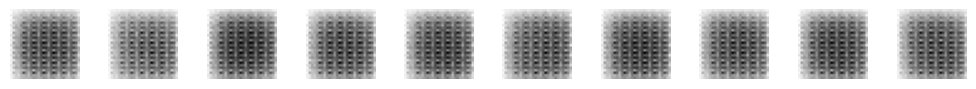

Epoch 1/5, Batch 5, Discriminator Loss: 0.10737769305706024, Generator Loss: 2.6767115592956543
Epoch 1/5, Batch 6, Discriminator Loss: 0.11815698444843292, Generator Loss: 3.3040108680725098
Epoch 1/5, Batch 7, Discriminator Loss: 0.05937182530760765, Generator Loss: 3.193530321121216
Epoch 1/5, Batch 8, Discriminator Loss: 0.05679624527692795, Generator Loss: 3.7103371620178223
Epoch 1/5, Batch 9, Discriminator Loss: 0.054673708975315094, Generator Loss: 3.2536470890045166


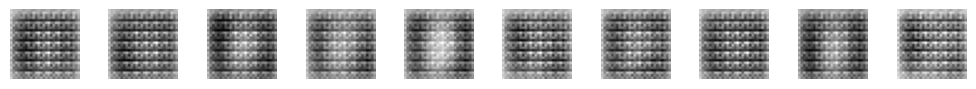

Epoch 1/5, Batch 10, Discriminator Loss: 0.08282182365655899, Generator Loss: 2.914047956466675
Epoch 1/5, Batch 11, Discriminator Loss: 0.14979827404022217, Generator Loss: 3.4864399433135986
Epoch 1/5, Batch 12, Discriminator Loss: 0.3453899919986725, Generator Loss: 1.6022263765335083
Epoch 1/5, Batch 13, Discriminator Loss: 0.314390629529953, Generator Loss: 3.1505208015441895
Epoch 1/5, Batch 14, Discriminator Loss: 0.3259364068508148, Generator Loss: 1.5986058712005615


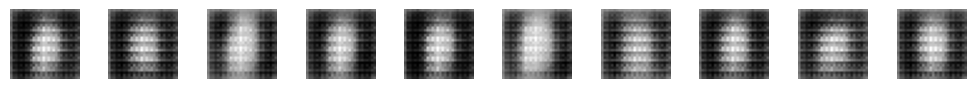

Epoch 1/5, Batch 15, Discriminator Loss: 0.270956814289093, Generator Loss: 2.5033648014068604
Epoch 1/5, Batch 16, Discriminator Loss: 0.2163989543914795, Generator Loss: 1.9358515739440918
Epoch 1/5, Batch 17, Discriminator Loss: 0.24031397700309753, Generator Loss: 2.6432242393493652
Epoch 1/5, Batch 18, Discriminator Loss: 0.24855324625968933, Generator Loss: 1.9355075359344482
Epoch 1/5, Batch 19, Discriminator Loss: 0.591458261013031, Generator Loss: 3.1067299842834473


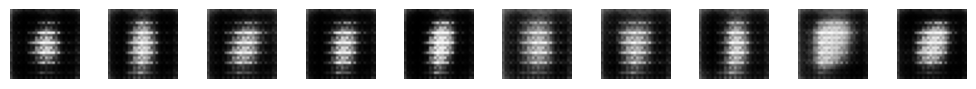

Epoch 1/5, Batch 20, Discriminator Loss: 0.5197328329086304, Generator Loss: 1.0473476648330688
Epoch 1/5, Batch 21, Discriminator Loss: 0.433559387922287, Generator Loss: 2.8263423442840576
Epoch 1/5, Batch 22, Discriminator Loss: 0.4311193823814392, Generator Loss: 1.2786115407943726
Epoch 1/5, Batch 23, Discriminator Loss: 0.5448507070541382, Generator Loss: 3.401071786880493
Epoch 1/5, Batch 24, Discriminator Loss: 0.4676405191421509, Generator Loss: 1.4685347080230713


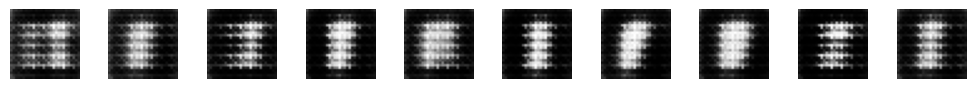

Epoch 1/5, Batch 25, Discriminator Loss: 0.6456723213195801, Generator Loss: 2.2347280979156494
Epoch 1/5, Batch 26, Discriminator Loss: 0.39041489362716675, Generator Loss: 1.7125649452209473
Epoch 1/5, Batch 27, Discriminator Loss: 0.47653529047966003, Generator Loss: 3.4039316177368164
Epoch 1/5, Batch 28, Discriminator Loss: 0.3800080716609955, Generator Loss: 1.480750560760498
Epoch 1/5, Batch 29, Discriminator Loss: 0.41542088985443115, Generator Loss: 2.524583101272583


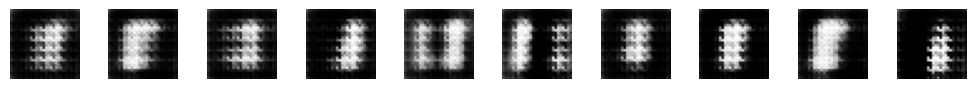

Epoch 1/5, Batch 30, Discriminator Loss: 0.4254988431930542, Generator Loss: 1.8956427574157715
Epoch 1/5, Batch 31, Discriminator Loss: 0.7189980745315552, Generator Loss: 2.6336863040924072
Epoch 1/5, Batch 32, Discriminator Loss: 0.5445223450660706, Generator Loss: 1.2627713680267334
Epoch 1/5, Batch 33, Discriminator Loss: 0.4837005138397217, Generator Loss: 2.235374689102173
Epoch 1/5, Batch 34, Discriminator Loss: 0.3223719298839569, Generator Loss: 2.135958194732666


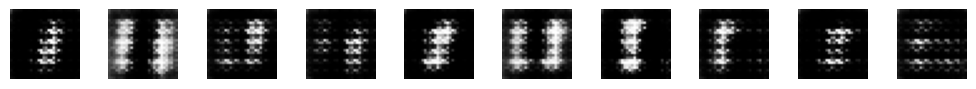

Epoch 1/5, Batch 35, Discriminator Loss: 0.3041464388370514, Generator Loss: 2.9532127380371094
Epoch 1/5, Batch 36, Discriminator Loss: 0.21717099845409393, Generator Loss: 2.237844228744507
Epoch 1/5, Batch 37, Discriminator Loss: 0.326974093914032, Generator Loss: 4.0877685546875
Epoch 1/5, Batch 38, Discriminator Loss: 0.3077889680862427, Generator Loss: 2.193643093109131
Epoch 1/5, Batch 39, Discriminator Loss: 0.5629914402961731, Generator Loss: 2.883129358291626


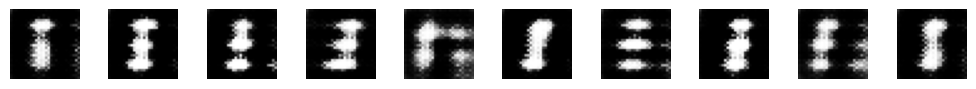

Epoch 1/5, Batch 40, Discriminator Loss: 0.4128924012184143, Generator Loss: 2.3560848236083984
Epoch 1/5, Batch 41, Discriminator Loss: 0.6535061597824097, Generator Loss: 3.4622466564178467
Epoch 1/5, Batch 42, Discriminator Loss: 0.5870102643966675, Generator Loss: 1.128893494606018
Epoch 1/5, Batch 43, Discriminator Loss: 0.4248332381248474, Generator Loss: 2.5727603435516357
Epoch 1/5, Batch 44, Discriminator Loss: 0.3522864580154419, Generator Loss: 1.9400157928466797


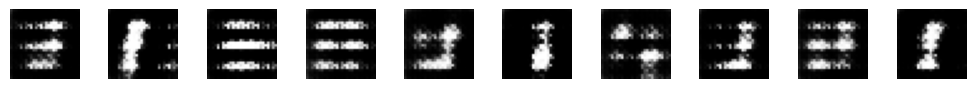

Epoch 1/5, Batch 45, Discriminator Loss: 0.3800361752510071, Generator Loss: 3.217320203781128
Epoch 1/5, Batch 46, Discriminator Loss: 0.49134451150894165, Generator Loss: 1.1709380149841309
Epoch 1/5, Batch 47, Discriminator Loss: 0.2441091537475586, Generator Loss: 2.8887250423431396
Epoch 1/5, Batch 48, Discriminator Loss: 0.22691839933395386, Generator Loss: 2.446830987930298
Epoch 1/5, Batch 49, Discriminator Loss: 0.364425390958786, Generator Loss: 3.4973175525665283


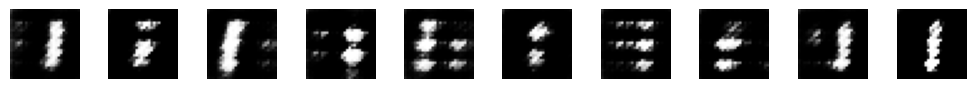

Epoch 1/5, Batch 50, Discriminator Loss: 0.5587773323059082, Generator Loss: 1.0831302404403687
Epoch 1/5, Batch 51, Discriminator Loss: 0.3769608438014984, Generator Loss: 2.960324764251709
Epoch 1/5, Batch 52, Discriminator Loss: 0.3090454339981079, Generator Loss: 2.2696919441223145
Epoch 1/5, Batch 53, Discriminator Loss: 0.3470023274421692, Generator Loss: 3.5929503440856934
Epoch 1/5, Batch 54, Discriminator Loss: 0.1994253695011139, Generator Loss: 3.348902702331543


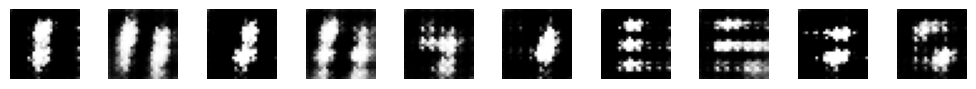

Epoch 1/5, Batch 55, Discriminator Loss: 0.19817277789115906, Generator Loss: 3.7752773761749268
Epoch 1/5, Batch 56, Discriminator Loss: 0.36732515692710876, Generator Loss: 4.586126804351807
Epoch 1/5, Batch 57, Discriminator Loss: 0.217056542634964, Generator Loss: 2.5212478637695312
Epoch 1/5, Batch 58, Discriminator Loss: 0.42698273062705994, Generator Loss: 4.07689905166626
Epoch 1/5, Batch 59, Discriminator Loss: 0.2841432988643646, Generator Loss: 2.0844883918762207


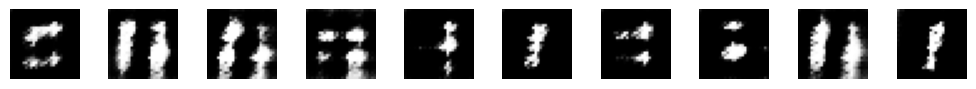

Epoch 1/5, Batch 60, Discriminator Loss: 0.33350035548210144, Generator Loss: 3.9493370056152344
Epoch 1/5, Batch 61, Discriminator Loss: 0.3731590211391449, Generator Loss: 1.7086849212646484
Epoch 1/5, Batch 62, Discriminator Loss: 0.33882012963294983, Generator Loss: 3.6149137020111084
Epoch 1/5, Batch 63, Discriminator Loss: 0.2961336076259613, Generator Loss: 2.133390188217163
Epoch 1/5, Batch 64, Discriminator Loss: 0.623037576675415, Generator Loss: 4.445206642150879


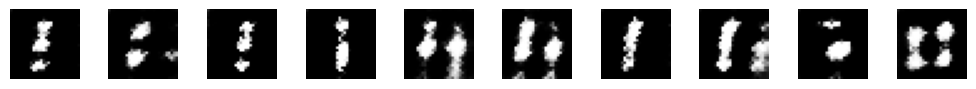

Epoch 1/5, Batch 65, Discriminator Loss: 0.33778291940689087, Generator Loss: 1.9723365306854248
Epoch 1/5, Batch 66, Discriminator Loss: 0.26272711157798767, Generator Loss: 3.6238322257995605
Epoch 1/5, Batch 67, Discriminator Loss: 0.25176262855529785, Generator Loss: 3.490168809890747
Epoch 1/5, Batch 68, Discriminator Loss: 0.24607345461845398, Generator Loss: 4.458081245422363
Epoch 1/5, Batch 69, Discriminator Loss: 0.13211952149868011, Generator Loss: 3.9760162830352783


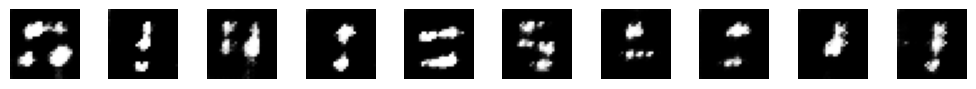

Epoch 1/5, Batch 70, Discriminator Loss: 0.28768038749694824, Generator Loss: 4.417288780212402
Epoch 1/5, Batch 71, Discriminator Loss: 0.5824012756347656, Generator Loss: 1.1791599988937378
Epoch 1/5, Batch 72, Discriminator Loss: 0.20927968621253967, Generator Loss: 3.3531126976013184
Epoch 1/5, Batch 73, Discriminator Loss: 0.2529434561729431, Generator Loss: 2.7474546432495117
Epoch 1/5, Batch 74, Discriminator Loss: 0.5284988880157471, Generator Loss: 4.538693428039551


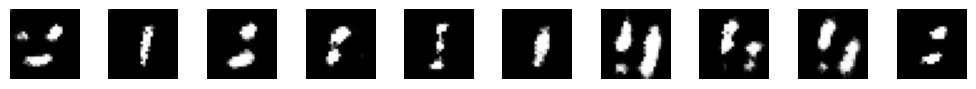

Epoch 1/5, Batch 75, Discriminator Loss: 0.42096108198165894, Generator Loss: 1.4803144931793213
Epoch 1/5, Batch 76, Discriminator Loss: 0.3141847252845764, Generator Loss: 3.368621587753296
Epoch 1/5, Batch 77, Discriminator Loss: 0.24074003100395203, Generator Loss: 2.52295184135437
Epoch 1/5, Batch 78, Discriminator Loss: 0.27746886014938354, Generator Loss: 3.2335963249206543
Epoch 1/5, Batch 79, Discriminator Loss: 0.2618963122367859, Generator Loss: 2.470008611679077


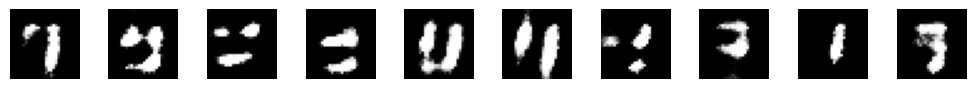

Epoch 1/5, Batch 80, Discriminator Loss: 1.2093441486358643, Generator Loss: 6.031000137329102
Epoch 1/5, Batch 81, Discriminator Loss: 0.24140457808971405, Generator Loss: 3.0040929317474365
Epoch 1/5, Batch 82, Discriminator Loss: 0.26461470127105713, Generator Loss: 2.9973485469818115
Epoch 1/5, Batch 83, Discriminator Loss: 0.29490938782691956, Generator Loss: 3.4686803817749023
Epoch 1/5, Batch 84, Discriminator Loss: 0.29892078042030334, Generator Loss: 2.251856565475464


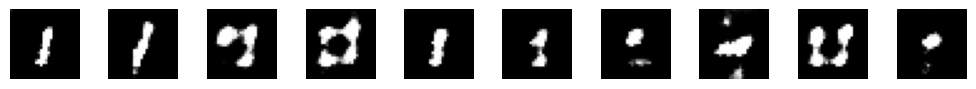

Epoch 1/5, Batch 85, Discriminator Loss: 0.49669936299324036, Generator Loss: 4.455418586730957
Epoch 1/5, Batch 86, Discriminator Loss: 0.4599934220314026, Generator Loss: 1.6886569261550903
Epoch 1/5, Batch 87, Discriminator Loss: 0.3590618968009949, Generator Loss: 3.3931572437286377
Epoch 1/5, Batch 88, Discriminator Loss: 0.34344345331192017, Generator Loss: 2.2409627437591553
Epoch 1/5, Batch 89, Discriminator Loss: 0.610305666923523, Generator Loss: 4.61340856552124


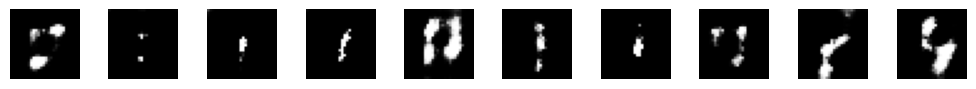

Epoch 1/5, Batch 90, Discriminator Loss: 0.2600160241127014, Generator Loss: 2.6214358806610107
Epoch 1/5, Batch 91, Discriminator Loss: 0.2529011070728302, Generator Loss: 3.5976247787475586
Epoch 1/5, Batch 92, Discriminator Loss: 0.37684184312820435, Generator Loss: 2.8590760231018066
Epoch 1/5, Batch 93, Discriminator Loss: 0.3036295771598816, Generator Loss: 2.9775145053863525
Epoch 1/5, Batch 94, Discriminator Loss: 0.3461732864379883, Generator Loss: 2.510831594467163


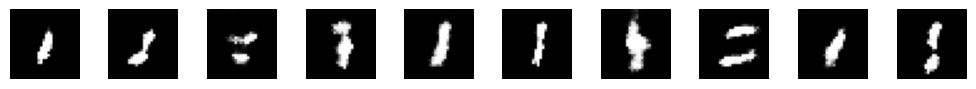

Epoch 1/5, Batch 95, Discriminator Loss: 0.35598570108413696, Generator Loss: 3.708219528198242
Epoch 1/5, Batch 96, Discriminator Loss: 0.5332632660865784, Generator Loss: 1.3679018020629883
Epoch 1/5, Batch 97, Discriminator Loss: 0.3298109173774719, Generator Loss: 3.0839080810546875
Epoch 1/5, Batch 98, Discriminator Loss: 0.34541791677474976, Generator Loss: 2.972446918487549
Epoch 1/5, Batch 99, Discriminator Loss: 0.38340485095977783, Generator Loss: 3.797084331512451


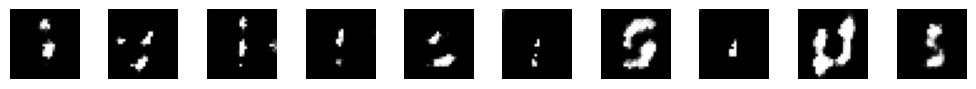

Epoch 1/5, Batch 100, Discriminator Loss: 0.5734426379203796, Generator Loss: 1.385391116142273
Epoch 1/5, Batch 101, Discriminator Loss: 0.3644048571586609, Generator Loss: 3.699120283126831
Epoch 1/5, Batch 102, Discriminator Loss: 0.2831578254699707, Generator Loss: 2.7440884113311768
Epoch 1/5, Batch 103, Discriminator Loss: 0.548351526260376, Generator Loss: 4.324012279510498
Epoch 1/5, Batch 104, Discriminator Loss: 0.5151445865631104, Generator Loss: 1.6617287397384644


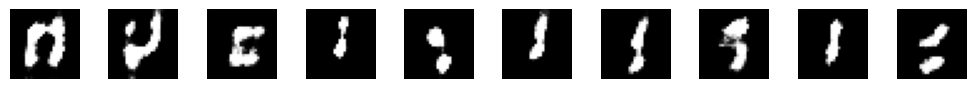

Epoch 1/5, Batch 105, Discriminator Loss: 0.4534977674484253, Generator Loss: 3.8160548210144043
Epoch 1/5, Batch 106, Discriminator Loss: 0.32198095321655273, Generator Loss: 2.61446475982666
Epoch 1/5, Batch 107, Discriminator Loss: 0.29009491205215454, Generator Loss: 3.287961483001709
Epoch 1/5, Batch 108, Discriminator Loss: 0.3101305067539215, Generator Loss: 3.707209348678589
Epoch 1/5, Batch 109, Discriminator Loss: 0.33295291662216187, Generator Loss: 2.4932363033294678


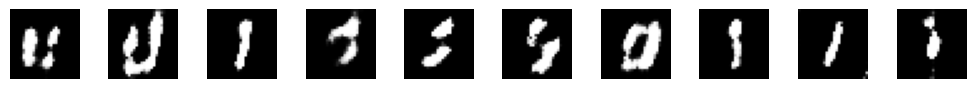

Epoch 1/5, Batch 110, Discriminator Loss: 0.7924849987030029, Generator Loss: 5.317612648010254
Epoch 1/5, Batch 111, Discriminator Loss: 0.376025915145874, Generator Loss: 2.350912570953369
Epoch 1/5, Batch 112, Discriminator Loss: 0.4033684730529785, Generator Loss: 2.7325098514556885
Epoch 1/5, Batch 113, Discriminator Loss: 0.5969581604003906, Generator Loss: 1.5070807933807373
Epoch 1/5, Batch 114, Discriminator Loss: 0.551323652267456, Generator Loss: 3.9535601139068604


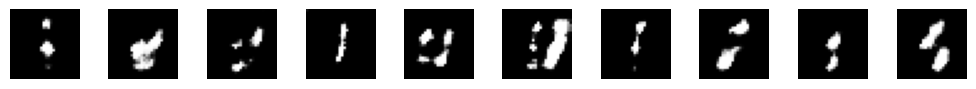

Epoch 1/5, Batch 115, Discriminator Loss: 0.34793180227279663, Generator Loss: 2.6960549354553223
Epoch 1/5, Batch 116, Discriminator Loss: 0.3943157494068146, Generator Loss: 4.034425735473633
Epoch 1/5, Batch 117, Discriminator Loss: 0.35363882780075073, Generator Loss: 3.2965664863586426
Epoch 1/5, Batch 118, Discriminator Loss: 0.6015047430992126, Generator Loss: 1.3398107290267944
Epoch 1/5, Batch 119, Discriminator Loss: 0.5071732997894287, Generator Loss: 3.3313045501708984


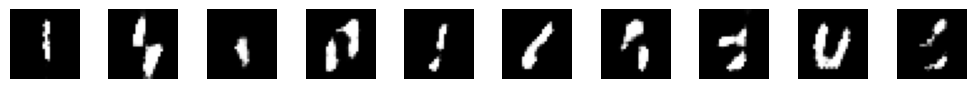

Epoch 1/5, Batch 120, Discriminator Loss: 0.4034808278083801, Generator Loss: 2.2647159099578857
Epoch 1/5, Batch 121, Discriminator Loss: 0.6145413517951965, Generator Loss: 4.2937331199646
Epoch 1/5, Batch 122, Discriminator Loss: 0.28003427386283875, Generator Loss: 2.64086651802063
Epoch 1/5, Batch 123, Discriminator Loss: 0.33922162652015686, Generator Loss: 3.7799811363220215
Epoch 1/5, Batch 124, Discriminator Loss: 0.42239466309547424, Generator Loss: 3.2205355167388916


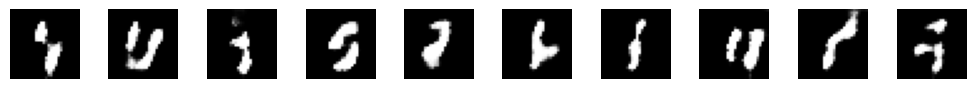

Epoch 1/5, Batch 125, Discriminator Loss: 0.5685722827911377, Generator Loss: 1.5779749155044556
Epoch 1/5, Batch 126, Discriminator Loss: 0.6728084683418274, Generator Loss: 3.7358152866363525
Epoch 1/5, Batch 127, Discriminator Loss: 0.5060744285583496, Generator Loss: 1.951958179473877
Epoch 1/5, Batch 128, Discriminator Loss: 0.5810573101043701, Generator Loss: 3.5915720462799072
Epoch 1/5, Batch 129, Discriminator Loss: 0.553281307220459, Generator Loss: 1.5669132471084595


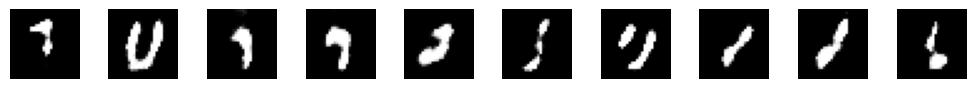

Epoch 1/5, Batch 130, Discriminator Loss: 0.7525325417518616, Generator Loss: 3.6929447650909424
Epoch 1/5, Batch 131, Discriminator Loss: 0.40000227093696594, Generator Loss: 1.920696496963501
Epoch 1/5, Batch 132, Discriminator Loss: 0.6624284386634827, Generator Loss: 3.8702244758605957
Epoch 1/5, Batch 133, Discriminator Loss: 0.43754327297210693, Generator Loss: 1.9883694648742676
Epoch 1/5, Batch 134, Discriminator Loss: 0.6242737174034119, Generator Loss: 3.6806466579437256


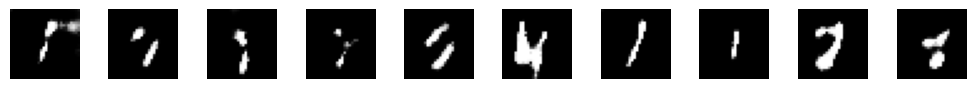

Epoch 1/5, Batch 135, Discriminator Loss: 0.4209427237510681, Generator Loss: 1.761857032775879
Epoch 1/5, Batch 136, Discriminator Loss: 0.6546005010604858, Generator Loss: 3.9724321365356445
Epoch 1/5, Batch 137, Discriminator Loss: 0.5171329975128174, Generator Loss: 1.7413069009780884
Epoch 1/5, Batch 138, Discriminator Loss: 0.5206286311149597, Generator Loss: 3.0739548206329346
Epoch 1/5, Batch 139, Discriminator Loss: 0.427033394575119, Generator Loss: 1.9247254133224487


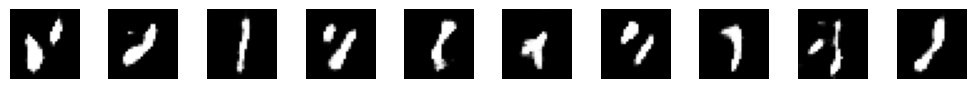

Epoch 1/5, Batch 140, Discriminator Loss: 0.5616874694824219, Generator Loss: 3.655311346054077
Epoch 1/5, Batch 141, Discriminator Loss: 0.5105258226394653, Generator Loss: 1.5444631576538086
Epoch 1/5, Batch 142, Discriminator Loss: 0.5655384063720703, Generator Loss: 3.148149251937866
Epoch 1/5, Batch 143, Discriminator Loss: 0.42878150939941406, Generator Loss: 2.186422824859619
Epoch 1/5, Batch 144, Discriminator Loss: 0.4483122229576111, Generator Loss: 2.3905816078186035


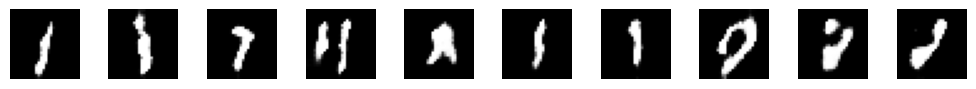

Epoch 1/5, Batch 145, Discriminator Loss: 0.481906920671463, Generator Loss: 2.279684066772461
Epoch 1/5, Batch 146, Discriminator Loss: 0.6260516047477722, Generator Loss: 4.194817543029785
Epoch 1/5, Batch 147, Discriminator Loss: 0.5576813817024231, Generator Loss: 1.8603885173797607
Epoch 1/5, Batch 148, Discriminator Loss: 0.4235783815383911, Generator Loss: 2.3304834365844727
Epoch 1/5, Batch 149, Discriminator Loss: 0.42818260192871094, Generator Loss: 2.3466696739196777


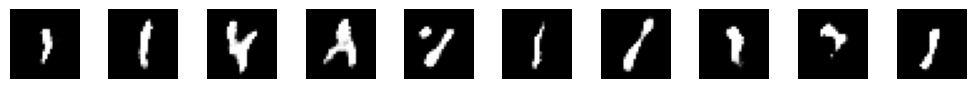

Epoch 1/5, Batch 150, Discriminator Loss: 0.4695361852645874, Generator Loss: 2.2536728382110596
Epoch 1/5, Batch 151, Discriminator Loss: 0.5330134630203247, Generator Loss: 1.8946895599365234
Epoch 1/5, Batch 152, Discriminator Loss: 1.1265051364898682, Generator Loss: 5.072286605834961
Epoch 1/5, Batch 153, Discriminator Loss: 0.36259961128234863, Generator Loss: 2.2628836631774902
Epoch 1/5, Batch 154, Discriminator Loss: 0.47867709398269653, Generator Loss: 2.8585171699523926


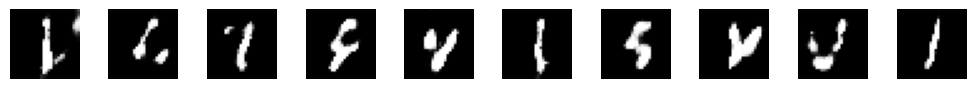

Epoch 1/5, Batch 155, Discriminator Loss: 0.38686609268188477, Generator Loss: 2.5626678466796875
Epoch 1/5, Batch 156, Discriminator Loss: 0.45336490869522095, Generator Loss: 2.1904664039611816
Epoch 1/5, Batch 157, Discriminator Loss: 0.7895768880844116, Generator Loss: 4.352427005767822
Epoch 1/5, Batch 158, Discriminator Loss: 0.5357428193092346, Generator Loss: 1.6942481994628906
Epoch 1/5, Batch 159, Discriminator Loss: 0.5558831095695496, Generator Loss: 2.6264686584472656


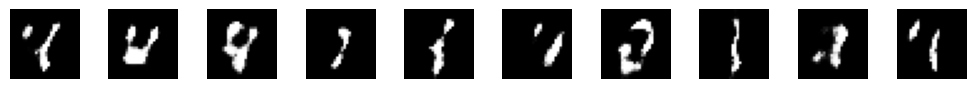

Epoch 1/5, Batch 160, Discriminator Loss: 0.4679907560348511, Generator Loss: 2.1194252967834473
Epoch 1/5, Batch 161, Discriminator Loss: 0.52350914478302, Generator Loss: 1.9313509464263916
Epoch 1/5, Batch 162, Discriminator Loss: 0.6567981243133545, Generator Loss: 3.9265027046203613
Epoch 1/5, Batch 163, Discriminator Loss: 0.4369998574256897, Generator Loss: 1.8519195318222046
Epoch 1/5, Batch 164, Discriminator Loss: 0.37258267402648926, Generator Loss: 3.280421257019043


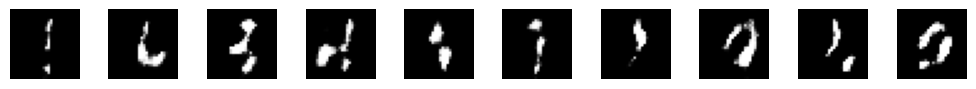

Epoch 1/5, Batch 165, Discriminator Loss: 0.4284331798553467, Generator Loss: 2.20855450630188
Epoch 1/5, Batch 166, Discriminator Loss: 0.6886664628982544, Generator Loss: 4.001789093017578
Epoch 1/5, Batch 167, Discriminator Loss: 0.5012396574020386, Generator Loss: 1.6560466289520264
Epoch 1/5, Batch 168, Discriminator Loss: 0.5596399307250977, Generator Loss: 2.447246789932251
Epoch 1/5, Batch 169, Discriminator Loss: 0.6671447157859802, Generator Loss: 1.1081888675689697


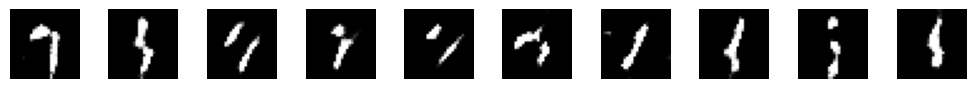

Epoch 1/5, Batch 170, Discriminator Loss: 0.4762519598007202, Generator Loss: 3.0928854942321777
Epoch 1/5, Batch 171, Discriminator Loss: 0.3710278272628784, Generator Loss: 2.2038285732269287
Epoch 1/5, Batch 172, Discriminator Loss: 0.5685627460479736, Generator Loss: 3.6731178760528564
Epoch 1/5, Batch 173, Discriminator Loss: 0.5584288239479065, Generator Loss: 1.3077044486999512
Epoch 1/5, Batch 174, Discriminator Loss: 0.543936550617218, Generator Loss: 3.0469443798065186


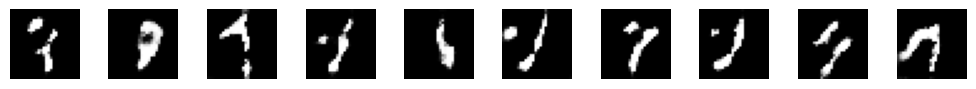

Epoch 1/5, Batch 175, Discriminator Loss: 0.5191575288772583, Generator Loss: 1.5520424842834473
Epoch 1/5, Batch 176, Discriminator Loss: 0.8353742361068726, Generator Loss: 3.7526051998138428
Epoch 1/5, Batch 177, Discriminator Loss: 0.37147873640060425, Generator Loss: 2.038114547729492
Epoch 1/5, Batch 178, Discriminator Loss: 0.6347959041595459, Generator Loss: 3.5555739402770996
Epoch 1/5, Batch 179, Discriminator Loss: 0.48865050077438354, Generator Loss: 1.6220710277557373


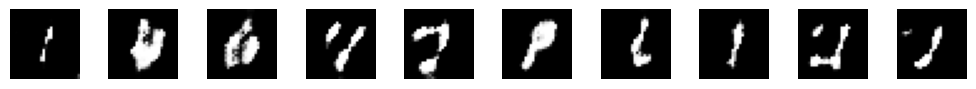

Epoch 1/5, Batch 180, Discriminator Loss: 0.48100733757019043, Generator Loss: 2.5446393489837646
Epoch 1/5, Batch 181, Discriminator Loss: 0.5400958061218262, Generator Loss: 1.4681062698364258
Epoch 1/5, Batch 182, Discriminator Loss: 0.667508602142334, Generator Loss: 3.2540855407714844
Epoch 1/5, Batch 183, Discriminator Loss: 0.3832882046699524, Generator Loss: 2.00420880317688
Epoch 1/5, Batch 184, Discriminator Loss: 0.4209951162338257, Generator Loss: 3.244647741317749


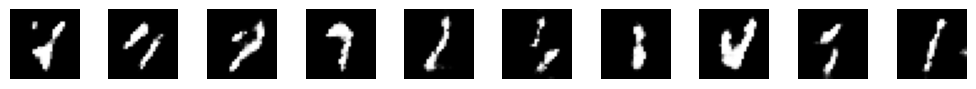

Epoch 1/5, Batch 185, Discriminator Loss: 0.4112175703048706, Generator Loss: 1.7294434309005737
Epoch 1/5, Batch 186, Discriminator Loss: 0.6313673257827759, Generator Loss: 3.795290470123291
Epoch 1/5, Batch 187, Discriminator Loss: 0.49919718503952026, Generator Loss: 1.5299468040466309
Epoch 1/5, Batch 188, Discriminator Loss: 0.5055145025253296, Generator Loss: 2.8942019939422607
Epoch 1/5, Batch 189, Discriminator Loss: 0.33780449628829956, Generator Loss: 2.9633126258850098


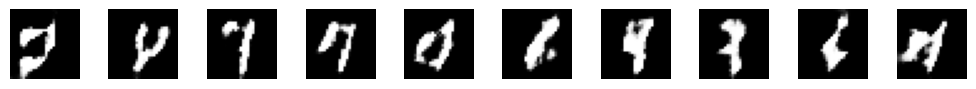

Epoch 1/5, Batch 190, Discriminator Loss: 0.6975637674331665, Generator Loss: 4.249090194702148
Epoch 1/5, Batch 191, Discriminator Loss: 0.5433492064476013, Generator Loss: 1.2628450393676758
Epoch 1/5, Batch 192, Discriminator Loss: 0.4808539152145386, Generator Loss: 2.901264190673828
Epoch 1/5, Batch 193, Discriminator Loss: 0.4449947774410248, Generator Loss: 1.639317512512207
Epoch 1/5, Batch 194, Discriminator Loss: 0.5823391079902649, Generator Loss: 3.1132771968841553


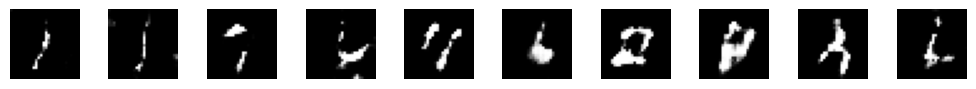

Epoch 1/5, Batch 195, Discriminator Loss: 0.4703640639781952, Generator Loss: 1.6278362274169922
Epoch 1/5, Batch 196, Discriminator Loss: 0.6678522229194641, Generator Loss: 3.754878520965576
Epoch 1/5, Batch 197, Discriminator Loss: 0.5360139608383179, Generator Loss: 1.5031107664108276
Epoch 1/5, Batch 198, Discriminator Loss: 0.6205063462257385, Generator Loss: 3.024315118789673
Epoch 1/5, Batch 199, Discriminator Loss: 0.3884197175502777, Generator Loss: 3.0512328147888184


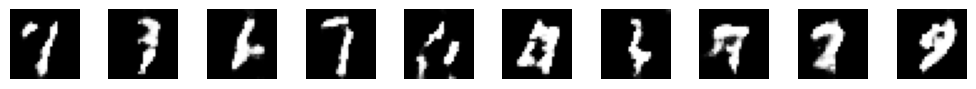

Epoch 1/5, Batch 200, Discriminator Loss: 0.5472844243049622, Generator Loss: 3.3703460693359375
Epoch 1/5, Batch 201, Discriminator Loss: 0.4041734039783478, Generator Loss: 2.1237034797668457
Epoch 1/5, Batch 202, Discriminator Loss: 0.461733341217041, Generator Loss: 2.43851637840271
Epoch 1/5, Batch 203, Discriminator Loss: 0.7384180426597595, Generator Loss: 0.9297703504562378
Epoch 1/5, Batch 204, Discriminator Loss: 0.4735655188560486, Generator Loss: 2.6108808517456055


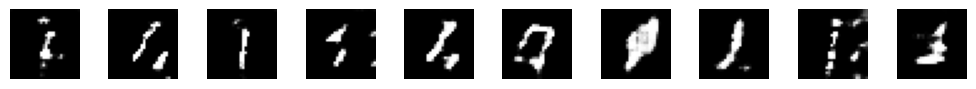

Epoch 1/5, Batch 205, Discriminator Loss: 0.5207997560501099, Generator Loss: 1.7135080099105835
Epoch 1/5, Batch 206, Discriminator Loss: 0.5021167397499084, Generator Loss: 3.02987003326416
Epoch 1/5, Batch 207, Discriminator Loss: 0.5876615643501282, Generator Loss: 1.1932543516159058
Epoch 1/5, Batch 208, Discriminator Loss: 0.6015534400939941, Generator Loss: 3.1466927528381348
Epoch 1/5, Batch 209, Discriminator Loss: 0.4525747299194336, Generator Loss: 1.7748255729675293


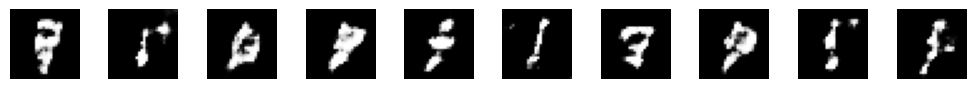

Epoch 1/5, Batch 210, Discriminator Loss: 0.6104239225387573, Generator Loss: 3.3358848094940186
Epoch 1/5, Batch 211, Discriminator Loss: 0.5780988335609436, Generator Loss: 1.3372551202774048
Epoch 1/5, Batch 212, Discriminator Loss: 0.4973370134830475, Generator Loss: 2.8905699253082275
Epoch 1/5, Batch 213, Discriminator Loss: 0.40878742933273315, Generator Loss: 2.1367099285125732
Epoch 1/5, Batch 214, Discriminator Loss: 0.6952247023582458, Generator Loss: 3.8962154388427734


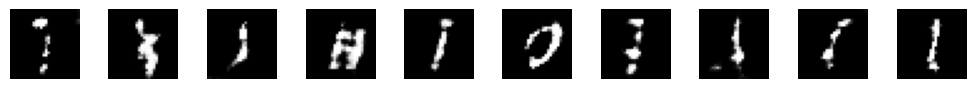

Epoch 1/5, Batch 215, Discriminator Loss: 0.6235932111740112, Generator Loss: 1.2948652505874634
Epoch 1/5, Batch 216, Discriminator Loss: 0.4947126805782318, Generator Loss: 2.3830907344818115
Epoch 1/5, Batch 217, Discriminator Loss: 0.5196763277053833, Generator Loss: 1.6900759935379028
Epoch 1/5, Batch 218, Discriminator Loss: 0.5492644309997559, Generator Loss: 2.738420248031616
Epoch 1/5, Batch 219, Discriminator Loss: 0.8900026679039001, Generator Loss: 0.9801946878433228


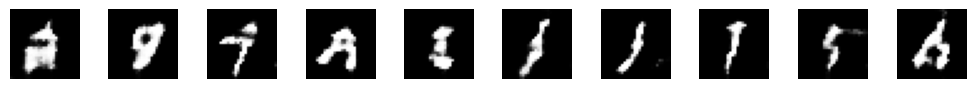

Epoch 1/5, Batch 220, Discriminator Loss: 0.6111374497413635, Generator Loss: 2.90740704536438
Epoch 1/5, Batch 221, Discriminator Loss: 0.5038872957229614, Generator Loss: 1.6621707677841187
Epoch 1/5, Batch 222, Discriminator Loss: 0.6462364196777344, Generator Loss: 3.1946473121643066
Epoch 1/5, Batch 223, Discriminator Loss: 0.688395082950592, Generator Loss: 1.230011224746704
Epoch 1/5, Batch 224, Discriminator Loss: 0.6292831301689148, Generator Loss: 3.068509101867676


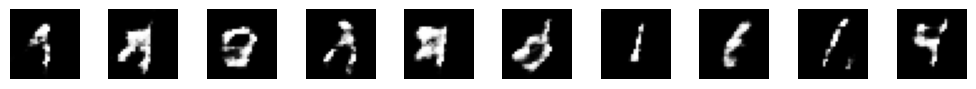

Epoch 1/5, Batch 225, Discriminator Loss: 0.3919435739517212, Generator Loss: 2.646685838699341
Epoch 1/5, Batch 226, Discriminator Loss: 0.5881772637367249, Generator Loss: 3.197157621383667
Epoch 1/5, Batch 227, Discriminator Loss: 0.7440025806427002, Generator Loss: 0.9082423448562622
Epoch 1/5, Batch 228, Discriminator Loss: 0.6598808765411377, Generator Loss: 2.779101610183716
Epoch 1/5, Batch 229, Discriminator Loss: 0.6034263372421265, Generator Loss: 1.4992256164550781


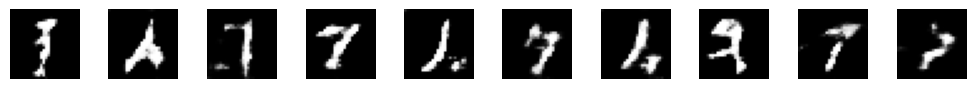

Epoch 1/5, Batch 230, Discriminator Loss: 0.5968389511108398, Generator Loss: 3.1846203804016113
Epoch 1/5, Batch 231, Discriminator Loss: 0.4744979739189148, Generator Loss: 1.675940990447998
Epoch 1/5, Batch 232, Discriminator Loss: 0.6333208084106445, Generator Loss: 2.9764819145202637
Epoch 1/5, Batch 233, Discriminator Loss: 0.6731252670288086, Generator Loss: 1.2056279182434082
Epoch 1/5, Batch 234, Discriminator Loss: 0.4665225148200989, Generator Loss: 2.7730908393859863


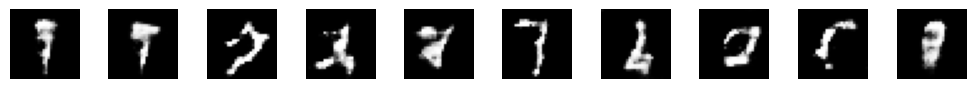

End of epoch 1, Discriminator Loss: 0.4665225148200989, Generator Loss: 2.7730908393859863
Epoch 2/5, Batch 0, Discriminator Loss: 0.5119518041610718, Generator Loss: 1.480196475982666
Epoch 2/5, Batch 1, Discriminator Loss: 0.9164594411849976, Generator Loss: 3.1304683685302734
Epoch 2/5, Batch 2, Discriminator Loss: 0.6437354683876038, Generator Loss: 1.2327842712402344
Epoch 2/5, Batch 3, Discriminator Loss: 0.5934029221534729, Generator Loss: 2.327845573425293
Epoch 2/5, Batch 4, Discriminator Loss: 0.6441836953163147, Generator Loss: 1.2084746360778809


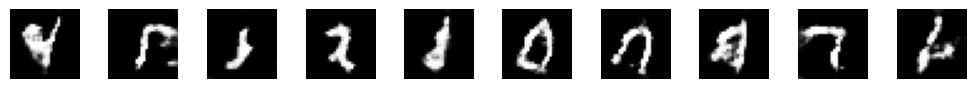

Epoch 2/5, Batch 5, Discriminator Loss: 0.8386087417602539, Generator Loss: 2.886744499206543
Epoch 2/5, Batch 6, Discriminator Loss: 0.6533629298210144, Generator Loss: 1.2858664989471436
Epoch 2/5, Batch 7, Discriminator Loss: 0.5629422068595886, Generator Loss: 2.5536646842956543
Epoch 2/5, Batch 8, Discriminator Loss: 0.6431422233581543, Generator Loss: 1.1818335056304932
Epoch 2/5, Batch 9, Discriminator Loss: 0.8089339137077332, Generator Loss: 2.892789602279663


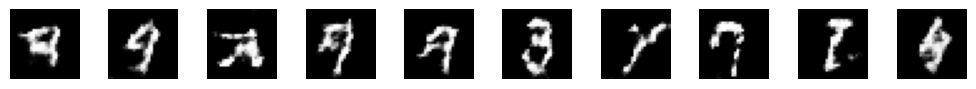

Epoch 2/5, Batch 10, Discriminator Loss: 0.6178942918777466, Generator Loss: 1.1716312170028687
Epoch 2/5, Batch 11, Discriminator Loss: 0.6312311887741089, Generator Loss: 2.8159797191619873
Epoch 2/5, Batch 12, Discriminator Loss: 0.4262421131134033, Generator Loss: 3.241576671600342
Epoch 2/5, Batch 13, Discriminator Loss: 0.5313252210617065, Generator Loss: 2.895440101623535
Epoch 2/5, Batch 14, Discriminator Loss: 0.610811173915863, Generator Loss: 2.3580539226531982


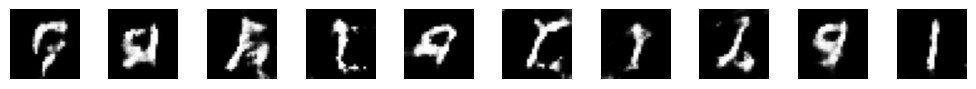

Epoch 2/5, Batch 15, Discriminator Loss: 0.7507659792900085, Generator Loss: 1.0253337621688843
Epoch 2/5, Batch 16, Discriminator Loss: 0.7075978517532349, Generator Loss: 2.4838032722473145
Epoch 2/5, Batch 17, Discriminator Loss: 0.6970047950744629, Generator Loss: 1.1765832901000977
Epoch 2/5, Batch 18, Discriminator Loss: 0.7663893103599548, Generator Loss: 2.9664340019226074
Epoch 2/5, Batch 19, Discriminator Loss: 0.5875945091247559, Generator Loss: 1.2917485237121582


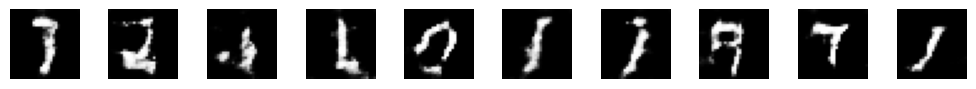

Epoch 2/5, Batch 20, Discriminator Loss: 0.7499919533729553, Generator Loss: 2.6431539058685303
Epoch 2/5, Batch 21, Discriminator Loss: 0.6117891669273376, Generator Loss: 1.3823347091674805
Epoch 2/5, Batch 22, Discriminator Loss: 0.780037522315979, Generator Loss: 2.6246514320373535
Epoch 2/5, Batch 23, Discriminator Loss: 0.7278866767883301, Generator Loss: 1.026812195777893
Epoch 2/5, Batch 24, Discriminator Loss: 0.6996414661407471, Generator Loss: 2.178989887237549


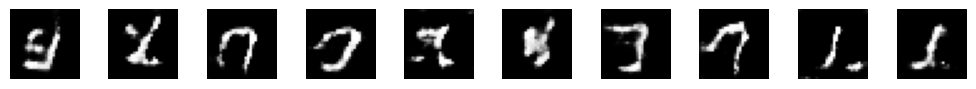

Epoch 2/5, Batch 25, Discriminator Loss: 0.6202700138092041, Generator Loss: 1.3056128025054932
Epoch 2/5, Batch 26, Discriminator Loss: 0.9826123714447021, Generator Loss: 3.0479931831359863
Epoch 2/5, Batch 27, Discriminator Loss: 0.7178502678871155, Generator Loss: 1.0110007524490356
Epoch 2/5, Batch 28, Discriminator Loss: 0.6923107504844666, Generator Loss: 2.1161952018737793
Epoch 2/5, Batch 29, Discriminator Loss: 0.7465865612030029, Generator Loss: 1.1600807905197144


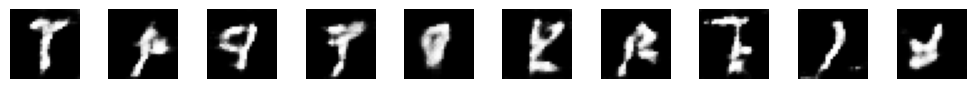

Epoch 2/5, Batch 30, Discriminator Loss: 0.7553659677505493, Generator Loss: 2.6468005180358887
Epoch 2/5, Batch 31, Discriminator Loss: 0.6310095191001892, Generator Loss: 1.2651965618133545
Epoch 2/5, Batch 32, Discriminator Loss: 1.0054038763046265, Generator Loss: 2.716282367706299
Epoch 2/5, Batch 33, Discriminator Loss: 0.7438989281654358, Generator Loss: 1.0928425788879395
Epoch 2/5, Batch 34, Discriminator Loss: 0.8555742502212524, Generator Loss: 2.355508804321289


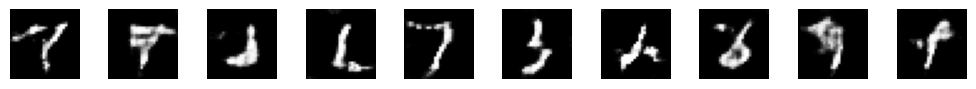

Epoch 2/5, Batch 35, Discriminator Loss: 0.6068786978721619, Generator Loss: 1.3614470958709717
Epoch 2/5, Batch 36, Discriminator Loss: 0.9014770984649658, Generator Loss: 2.669867992401123
Epoch 2/5, Batch 37, Discriminator Loss: 0.7798904180526733, Generator Loss: 1.0283335447311401
Epoch 2/5, Batch 38, Discriminator Loss: 0.8469104766845703, Generator Loss: 2.5023672580718994
Epoch 2/5, Batch 39, Discriminator Loss: 0.8548388481140137, Generator Loss: 0.9582750201225281


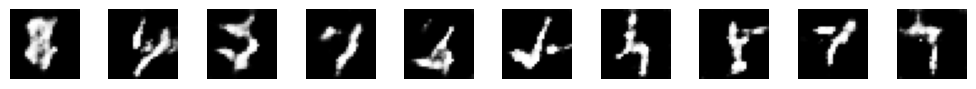

Epoch 2/5, Batch 40, Discriminator Loss: 0.8223366141319275, Generator Loss: 2.4251551628112793
Epoch 2/5, Batch 41, Discriminator Loss: 0.6586844325065613, Generator Loss: 1.238793969154358
Epoch 2/5, Batch 42, Discriminator Loss: 0.9475814700126648, Generator Loss: 2.6503636837005615
Epoch 2/5, Batch 43, Discriminator Loss: 0.5660916566848755, Generator Loss: 2.82028865814209
Epoch 2/5, Batch 44, Discriminator Loss: 0.8486752510070801, Generator Loss: 3.0125646591186523


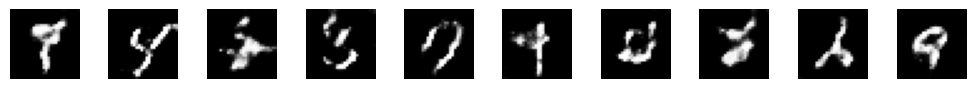

Epoch 2/5, Batch 45, Discriminator Loss: 0.8670583367347717, Generator Loss: 0.8468533754348755
Epoch 2/5, Batch 46, Discriminator Loss: 0.8151275515556335, Generator Loss: 2.1795825958251953
Epoch 2/5, Batch 47, Discriminator Loss: 0.8865626454353333, Generator Loss: 0.8761845827102661
Epoch 2/5, Batch 48, Discriminator Loss: 0.8844165802001953, Generator Loss: 2.304070234298706
Epoch 2/5, Batch 49, Discriminator Loss: 0.8897804021835327, Generator Loss: 0.8839176893234253


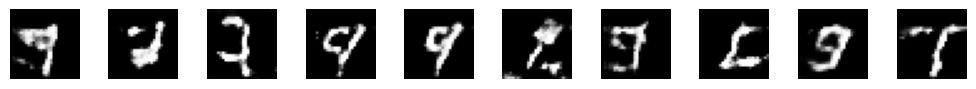

Epoch 2/5, Batch 50, Discriminator Loss: 0.7741342782974243, Generator Loss: 1.9792265892028809
Epoch 2/5, Batch 51, Discriminator Loss: 0.6995769739151001, Generator Loss: 1.2835921049118042
Epoch 2/5, Batch 52, Discriminator Loss: 1.0914931297302246, Generator Loss: 2.723813772201538
Epoch 2/5, Batch 53, Discriminator Loss: 0.8207411766052246, Generator Loss: 0.9577726721763611
Epoch 2/5, Batch 54, Discriminator Loss: 0.8373066782951355, Generator Loss: 2.0452404022216797


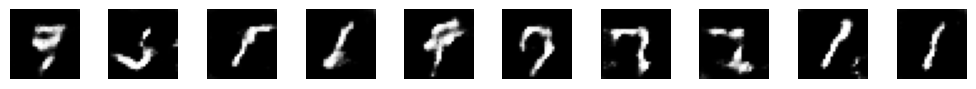

Epoch 2/5, Batch 55, Discriminator Loss: 0.7519217133522034, Generator Loss: 1.043817162513733
Epoch 2/5, Batch 56, Discriminator Loss: 0.977554440498352, Generator Loss: 2.3178606033325195
Epoch 2/5, Batch 57, Discriminator Loss: 0.799151599407196, Generator Loss: 0.9319190979003906
Epoch 2/5, Batch 58, Discriminator Loss: 0.87479567527771, Generator Loss: 2.2142269611358643
Epoch 2/5, Batch 59, Discriminator Loss: 0.6763753294944763, Generator Loss: 1.1800817251205444


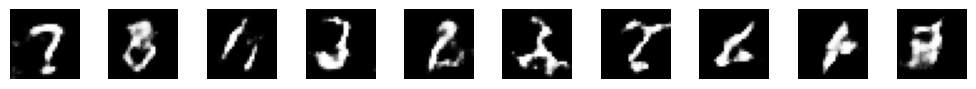

Epoch 2/5, Batch 60, Discriminator Loss: 0.989295482635498, Generator Loss: 2.4392285346984863
Epoch 2/5, Batch 61, Discriminator Loss: 0.7707774639129639, Generator Loss: 0.949232816696167
Epoch 2/5, Batch 62, Discriminator Loss: 0.8195928335189819, Generator Loss: 2.25374436378479
Epoch 2/5, Batch 63, Discriminator Loss: 0.7071075439453125, Generator Loss: 1.1206823587417603
Epoch 2/5, Batch 64, Discriminator Loss: 0.8370328545570374, Generator Loss: 2.4674174785614014


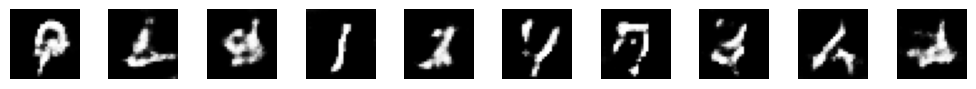

Epoch 2/5, Batch 65, Discriminator Loss: 0.7494001388549805, Generator Loss: 1.0120117664337158
Epoch 2/5, Batch 66, Discriminator Loss: 0.8470265865325928, Generator Loss: 2.1516222953796387
Epoch 2/5, Batch 67, Discriminator Loss: 0.866450309753418, Generator Loss: 0.9053661823272705
Epoch 2/5, Batch 68, Discriminator Loss: 0.9227992296218872, Generator Loss: 2.414260149002075
Epoch 2/5, Batch 69, Discriminator Loss: 0.7730337381362915, Generator Loss: 1.0221635103225708


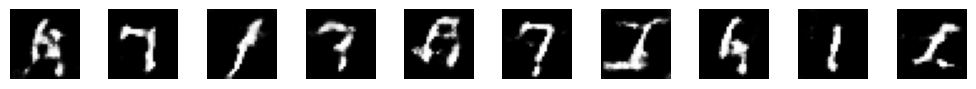

Epoch 2/5, Batch 70, Discriminator Loss: 0.8809127807617188, Generator Loss: 2.1781039237976074
Epoch 2/5, Batch 71, Discriminator Loss: 1.0060352087020874, Generator Loss: 0.8025511503219604
Epoch 2/5, Batch 72, Discriminator Loss: 0.9750962853431702, Generator Loss: 2.3453407287597656
Epoch 2/5, Batch 73, Discriminator Loss: 0.7930206656455994, Generator Loss: 0.9821192026138306
Epoch 2/5, Batch 74, Discriminator Loss: 0.8229996562004089, Generator Loss: 2.0497636795043945


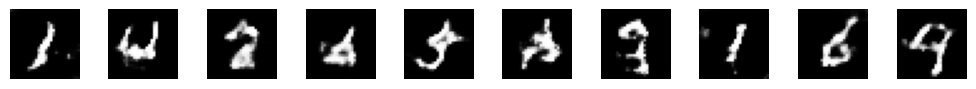

Epoch 2/5, Batch 75, Discriminator Loss: 0.7511272430419922, Generator Loss: 1.2009923458099365
Epoch 2/5, Batch 76, Discriminator Loss: 1.0593565702438354, Generator Loss: 2.3872170448303223
Epoch 2/5, Batch 77, Discriminator Loss: 0.7286048531532288, Generator Loss: 2.690600872039795
Epoch 2/5, Batch 78, Discriminator Loss: 0.8962495923042297, Generator Loss: 2.491266965866089
Epoch 2/5, Batch 79, Discriminator Loss: 0.8771966099739075, Generator Loss: 0.9118309020996094


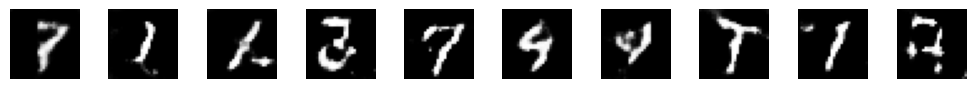

Epoch 2/5, Batch 80, Discriminator Loss: 0.9106518030166626, Generator Loss: 2.055117607116699
Epoch 2/5, Batch 81, Discriminator Loss: 0.822928786277771, Generator Loss: 0.9134469032287598
Epoch 2/5, Batch 82, Discriminator Loss: 0.7735751867294312, Generator Loss: 2.1538808345794678
Epoch 2/5, Batch 83, Discriminator Loss: 0.8368589282035828, Generator Loss: 1.0260708332061768
Epoch 2/5, Batch 84, Discriminator Loss: 1.0289918184280396, Generator Loss: 2.479893207550049


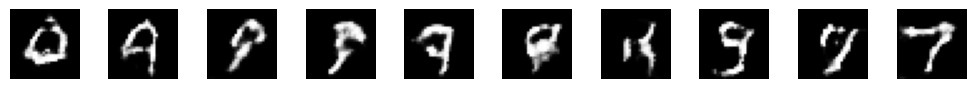

Epoch 2/5, Batch 85, Discriminator Loss: 0.9350748062133789, Generator Loss: 0.723397970199585
Epoch 2/5, Batch 86, Discriminator Loss: 0.7674890756607056, Generator Loss: 1.8176864385604858
Epoch 2/5, Batch 87, Discriminator Loss: 0.9151334762573242, Generator Loss: 0.8827065229415894
Epoch 2/5, Batch 88, Discriminator Loss: 1.0631179809570312, Generator Loss: 2.503760814666748
Epoch 2/5, Batch 89, Discriminator Loss: 0.7856242656707764, Generator Loss: 1.0753965377807617


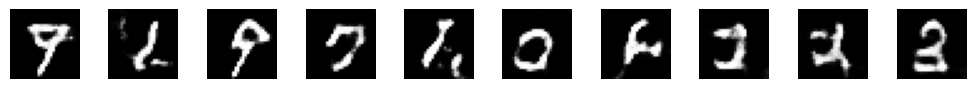

Epoch 2/5, Batch 90, Discriminator Loss: 0.8478855490684509, Generator Loss: 1.9903857707977295
Epoch 2/5, Batch 91, Discriminator Loss: 0.8833001255989075, Generator Loss: 0.8622339367866516
Epoch 2/5, Batch 92, Discriminator Loss: 0.8331599235534668, Generator Loss: 2.247087001800537
Epoch 2/5, Batch 93, Discriminator Loss: 0.7854434251785278, Generator Loss: 0.9698736071586609
Epoch 2/5, Batch 94, Discriminator Loss: 0.8512014150619507, Generator Loss: 2.1130504608154297


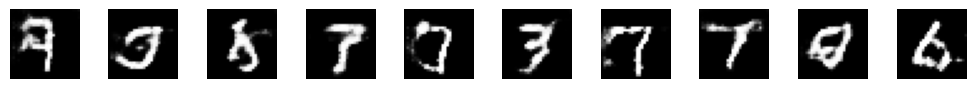

Epoch 2/5, Batch 95, Discriminator Loss: 0.9765192866325378, Generator Loss: 0.7816053032875061
Epoch 2/5, Batch 96, Discriminator Loss: 0.8715335130691528, Generator Loss: 2.3631227016448975
Epoch 2/5, Batch 97, Discriminator Loss: 0.7574271559715271, Generator Loss: 1.9858839511871338
Epoch 2/5, Batch 98, Discriminator Loss: 0.8310635685920715, Generator Loss: 0.9617413878440857
Epoch 2/5, Batch 99, Discriminator Loss: 0.990641713142395, Generator Loss: 2.230827569961548


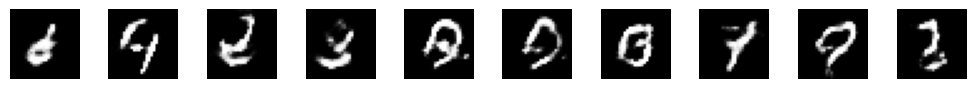

Epoch 2/5, Batch 100, Discriminator Loss: 0.7927526235580444, Generator Loss: 1.027043104171753
Epoch 2/5, Batch 101, Discriminator Loss: 0.9722695350646973, Generator Loss: 2.1369447708129883
Epoch 2/5, Batch 102, Discriminator Loss: 0.9993037581443787, Generator Loss: 0.7604544162750244
Epoch 2/5, Batch 103, Discriminator Loss: 0.9266873598098755, Generator Loss: 2.0071310997009277
Epoch 2/5, Batch 104, Discriminator Loss: 0.9200480580329895, Generator Loss: 0.8064752817153931


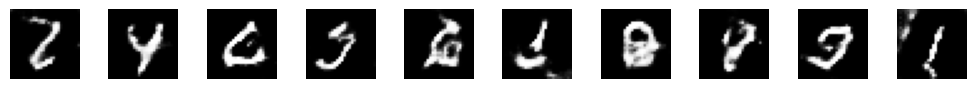

Epoch 2/5, Batch 105, Discriminator Loss: 0.8224930763244629, Generator Loss: 1.8762115240097046
Epoch 2/5, Batch 106, Discriminator Loss: 0.819850742816925, Generator Loss: 1.012399673461914
Epoch 2/5, Batch 107, Discriminator Loss: 1.0566061735153198, Generator Loss: 2.252469062805176
Epoch 2/5, Batch 108, Discriminator Loss: 0.6358199119567871, Generator Loss: 1.5139222145080566
Epoch 2/5, Batch 109, Discriminator Loss: 1.0189712047576904, Generator Loss: 2.281360149383545


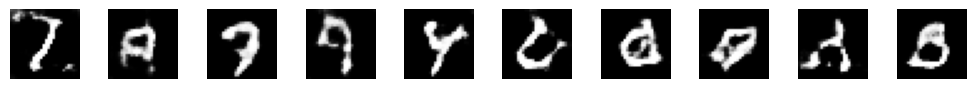

Epoch 2/5, Batch 110, Discriminator Loss: 0.9384337663650513, Generator Loss: 0.7988306879997253
Epoch 2/5, Batch 111, Discriminator Loss: 0.8888829946517944, Generator Loss: 1.9394347667694092
Epoch 2/5, Batch 112, Discriminator Loss: 0.850202739238739, Generator Loss: 1.049100637435913
Epoch 2/5, Batch 113, Discriminator Loss: 0.9314413070678711, Generator Loss: 2.2699310779571533
Epoch 2/5, Batch 114, Discriminator Loss: 1.0197728872299194, Generator Loss: 0.7962985038757324


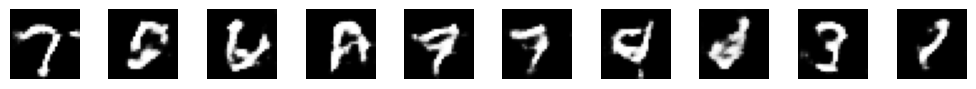

Epoch 2/5, Batch 115, Discriminator Loss: 0.8490993976593018, Generator Loss: 2.025084972381592
Epoch 2/5, Batch 116, Discriminator Loss: 0.9293391108512878, Generator Loss: 0.7836350202560425
Epoch 2/5, Batch 117, Discriminator Loss: 0.8446822166442871, Generator Loss: 1.885219931602478
Epoch 2/5, Batch 118, Discriminator Loss: 0.9770904779434204, Generator Loss: 0.8575333952903748
Epoch 2/5, Batch 119, Discriminator Loss: 1.0445032119750977, Generator Loss: 2.2837603092193604


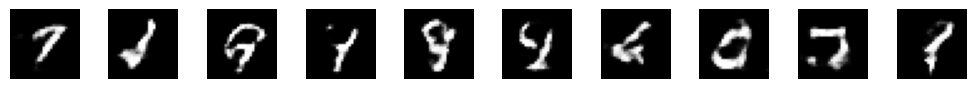

Epoch 2/5, Batch 120, Discriminator Loss: 0.8122608661651611, Generator Loss: 0.9462299346923828
Epoch 2/5, Batch 121, Discriminator Loss: 0.8533784747123718, Generator Loss: 1.9773293733596802
Epoch 2/5, Batch 122, Discriminator Loss: 0.9019761681556702, Generator Loss: 0.840308666229248
Epoch 2/5, Batch 123, Discriminator Loss: 0.9960528612136841, Generator Loss: 2.2028260231018066
Epoch 2/5, Batch 124, Discriminator Loss: 0.7466734647750854, Generator Loss: 1.1197168827056885


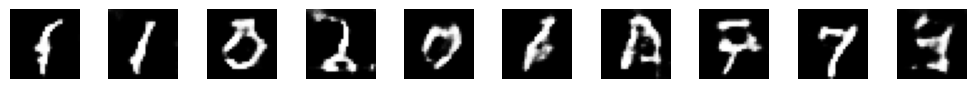

Epoch 2/5, Batch 125, Discriminator Loss: 0.9954395294189453, Generator Loss: 2.3935365676879883
Epoch 2/5, Batch 126, Discriminator Loss: 0.9356216192245483, Generator Loss: 0.8005763292312622
Epoch 2/5, Batch 127, Discriminator Loss: 0.839313805103302, Generator Loss: 1.9502071142196655
Epoch 2/5, Batch 128, Discriminator Loss: 0.8468649387359619, Generator Loss: 0.9807312488555908
Epoch 2/5, Batch 129, Discriminator Loss: 0.9744126796722412, Generator Loss: 2.1282401084899902


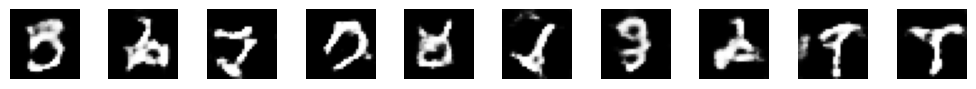

Epoch 2/5, Batch 130, Discriminator Loss: 0.7472500801086426, Generator Loss: 1.6048147678375244
Epoch 2/5, Batch 131, Discriminator Loss: 0.7753194570541382, Generator Loss: 1.6431933641433716
Epoch 2/5, Batch 132, Discriminator Loss: 0.8584167957305908, Generator Loss: 0.9603855013847351
Epoch 2/5, Batch 133, Discriminator Loss: 1.2269389629364014, Generator Loss: 2.423574447631836
Epoch 2/5, Batch 134, Discriminator Loss: 0.9371683597564697, Generator Loss: 0.8732154369354248


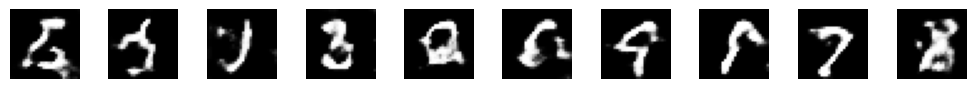

Epoch 2/5, Batch 135, Discriminator Loss: 0.8992552161216736, Generator Loss: 2.036851644515991
Epoch 2/5, Batch 136, Discriminator Loss: 0.7876543998718262, Generator Loss: 1.1169532537460327
Epoch 2/5, Batch 137, Discriminator Loss: 1.0265965461730957, Generator Loss: 2.175997018814087
Epoch 2/5, Batch 138, Discriminator Loss: 1.016404628753662, Generator Loss: 0.6849030256271362
Epoch 2/5, Batch 139, Discriminator Loss: 1.0394419431686401, Generator Loss: 1.9637187719345093


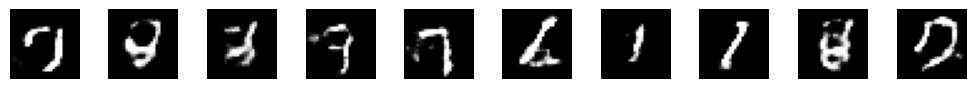

Epoch 2/5, Batch 140, Discriminator Loss: 0.7357668876647949, Generator Loss: 1.1925488710403442
Epoch 2/5, Batch 141, Discriminator Loss: 1.070759892463684, Generator Loss: 2.21797513961792
Epoch 2/5, Batch 142, Discriminator Loss: 1.0302895307540894, Generator Loss: 0.7136914730072021
Epoch 2/5, Batch 143, Discriminator Loss: 0.8639655709266663, Generator Loss: 1.6723742485046387
Epoch 2/5, Batch 144, Discriminator Loss: 0.9392976760864258, Generator Loss: 0.8093674778938293


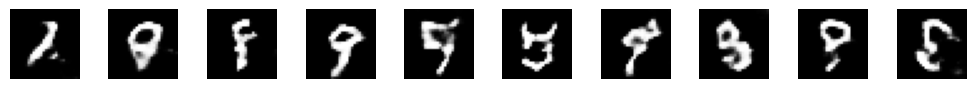

Epoch 2/5, Batch 145, Discriminator Loss: 0.9508415460586548, Generator Loss: 1.9558424949645996
Epoch 2/5, Batch 146, Discriminator Loss: 0.8862208724021912, Generator Loss: 0.9204363822937012
Epoch 2/5, Batch 147, Discriminator Loss: 1.0060677528381348, Generator Loss: 2.3454225063323975
Epoch 2/5, Batch 148, Discriminator Loss: 0.7455824613571167, Generator Loss: 1.0840420722961426
Epoch 2/5, Batch 149, Discriminator Loss: 0.9790481925010681, Generator Loss: 2.146385431289673


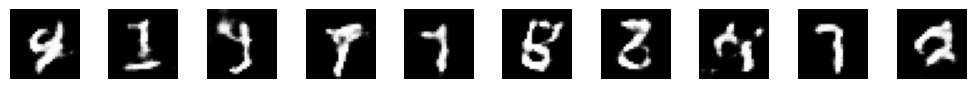

Epoch 2/5, Batch 150, Discriminator Loss: 0.9255257844924927, Generator Loss: 0.8342172503471375
Epoch 2/5, Batch 151, Discriminator Loss: 0.9924746751785278, Generator Loss: 1.9946473836898804
Epoch 2/5, Batch 152, Discriminator Loss: 0.9115259051322937, Generator Loss: 0.8400906920433044
Epoch 2/5, Batch 153, Discriminator Loss: 0.9096676111221313, Generator Loss: 1.7426809072494507
Epoch 2/5, Batch 154, Discriminator Loss: 0.8742979168891907, Generator Loss: 0.8345401883125305


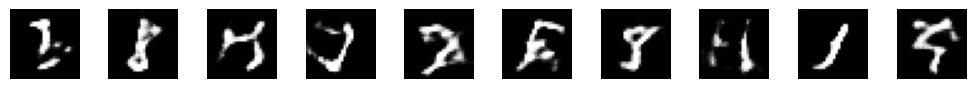

Epoch 2/5, Batch 155, Discriminator Loss: 0.9394849538803101, Generator Loss: 1.929107666015625
Epoch 2/5, Batch 156, Discriminator Loss: 0.7642701864242554, Generator Loss: 0.9823704361915588
Epoch 2/5, Batch 157, Discriminator Loss: 0.8838375806808472, Generator Loss: 1.9080263376235962
Epoch 2/5, Batch 158, Discriminator Loss: 0.9179292321205139, Generator Loss: 0.8475215435028076
Epoch 2/5, Batch 159, Discriminator Loss: 0.9278565645217896, Generator Loss: 1.9757115840911865


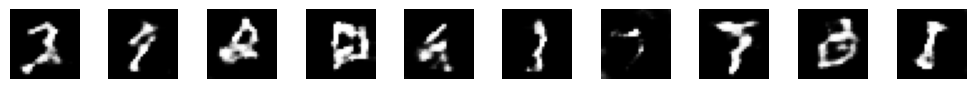

Epoch 2/5, Batch 160, Discriminator Loss: 1.0330443382263184, Generator Loss: 0.661170482635498
Epoch 2/5, Batch 161, Discriminator Loss: 0.9981731176376343, Generator Loss: 1.8803516626358032
Epoch 2/5, Batch 162, Discriminator Loss: 0.865052342414856, Generator Loss: 0.9001476168632507
Epoch 2/5, Batch 163, Discriminator Loss: 0.8946158289909363, Generator Loss: 1.9119082689285278
Epoch 2/5, Batch 164, Discriminator Loss: 0.9511733055114746, Generator Loss: 0.7869317531585693


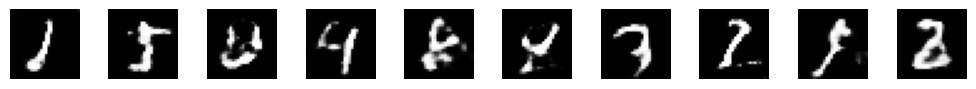

Epoch 2/5, Batch 165, Discriminator Loss: 0.9216471910476685, Generator Loss: 1.904005765914917
Epoch 2/5, Batch 166, Discriminator Loss: 0.8470251560211182, Generator Loss: 0.8602532148361206
Epoch 2/5, Batch 167, Discriminator Loss: 0.9681195020675659, Generator Loss: 2.1287341117858887
Epoch 2/5, Batch 168, Discriminator Loss: 0.6688705682754517, Generator Loss: 1.2621655464172363
Epoch 2/5, Batch 169, Discriminator Loss: 1.0490490198135376, Generator Loss: 2.4339237213134766


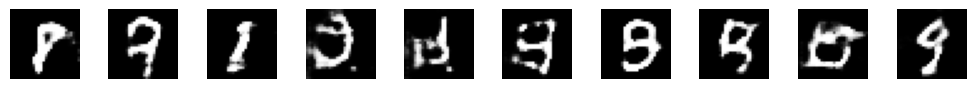

Epoch 2/5, Batch 170, Discriminator Loss: 0.9090383648872375, Generator Loss: 0.825224757194519
Epoch 2/5, Batch 171, Discriminator Loss: 0.8578603267669678, Generator Loss: 1.7593181133270264
Epoch 2/5, Batch 172, Discriminator Loss: 0.7915196418762207, Generator Loss: 1.3244192600250244
Epoch 2/5, Batch 173, Discriminator Loss: 0.9395490884780884, Generator Loss: 1.8830735683441162
Epoch 2/5, Batch 174, Discriminator Loss: 1.0867197513580322, Generator Loss: 0.5897105932235718


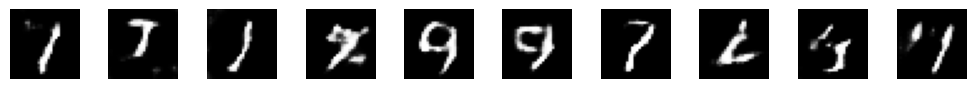

Epoch 2/5, Batch 175, Discriminator Loss: 0.9808652997016907, Generator Loss: 1.9030903577804565
Epoch 2/5, Batch 176, Discriminator Loss: 0.9006361365318298, Generator Loss: 0.891851007938385
Epoch 2/5, Batch 177, Discriminator Loss: 0.9836335778236389, Generator Loss: 1.91647469997406
Epoch 2/5, Batch 178, Discriminator Loss: 0.8891257643699646, Generator Loss: 0.9526388645172119
Epoch 2/5, Batch 179, Discriminator Loss: 0.8443811535835266, Generator Loss: 2.1686854362487793


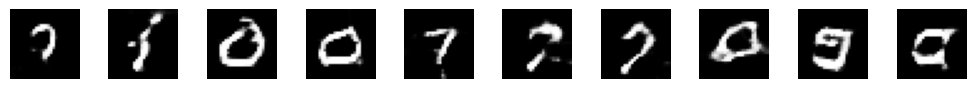

Epoch 2/5, Batch 180, Discriminator Loss: 0.9533562064170837, Generator Loss: 0.7900458574295044
Epoch 2/5, Batch 181, Discriminator Loss: 0.8601027727127075, Generator Loss: 1.681477665901184
Epoch 2/5, Batch 182, Discriminator Loss: 0.8333697319030762, Generator Loss: 1.0111286640167236
Epoch 2/5, Batch 183, Discriminator Loss: 1.0013704299926758, Generator Loss: 2.0275096893310547
Epoch 2/5, Batch 184, Discriminator Loss: 0.909541130065918, Generator Loss: 0.8458816409111023


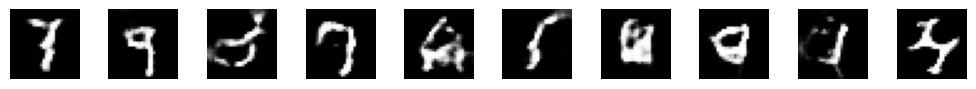

Epoch 2/5, Batch 185, Discriminator Loss: 0.9233340620994568, Generator Loss: 1.881829023361206
Epoch 2/5, Batch 186, Discriminator Loss: 0.7211692333221436, Generator Loss: 1.250551462173462
Epoch 2/5, Batch 187, Discriminator Loss: 1.0031424760818481, Generator Loss: 2.4118542671203613
Epoch 2/5, Batch 188, Discriminator Loss: 0.9815936088562012, Generator Loss: 0.7998722791671753
Epoch 2/5, Batch 189, Discriminator Loss: 0.7980268597602844, Generator Loss: 1.8651336431503296


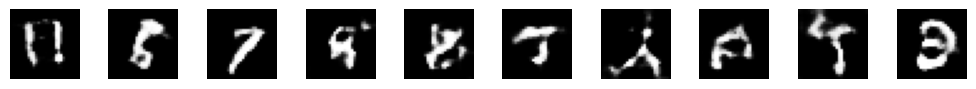

Epoch 2/5, Batch 190, Discriminator Loss: 0.7488203048706055, Generator Loss: 1.324706792831421
Epoch 2/5, Batch 191, Discriminator Loss: 0.9725812077522278, Generator Loss: 2.185833215713501
Epoch 2/5, Batch 192, Discriminator Loss: 0.9242581129074097, Generator Loss: 0.8056357502937317
Epoch 2/5, Batch 193, Discriminator Loss: 1.0295181274414062, Generator Loss: 1.8930186033248901
Epoch 2/5, Batch 194, Discriminator Loss: 0.7617238163948059, Generator Loss: 1.5450855493545532


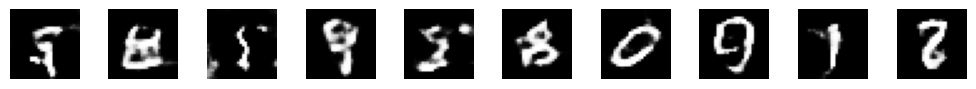

Epoch 2/5, Batch 195, Discriminator Loss: 0.9558675289154053, Generator Loss: 1.9295940399169922
Epoch 2/5, Batch 196, Discriminator Loss: 1.1193312406539917, Generator Loss: 0.6200392246246338
Epoch 2/5, Batch 197, Discriminator Loss: 1.0856444835662842, Generator Loss: 1.7952051162719727
Epoch 2/5, Batch 198, Discriminator Loss: 0.7798826694488525, Generator Loss: 1.1660101413726807
Epoch 2/5, Batch 199, Discriminator Loss: 0.9708418846130371, Generator Loss: 1.9183552265167236


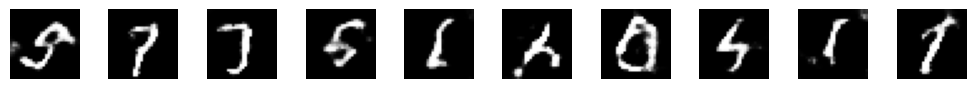

Epoch 2/5, Batch 200, Discriminator Loss: 0.9605537056922913, Generator Loss: 0.732789933681488
Epoch 2/5, Batch 201, Discriminator Loss: 0.902424693107605, Generator Loss: 1.7695435285568237
Epoch 2/5, Batch 202, Discriminator Loss: 0.8909080028533936, Generator Loss: 0.9416449069976807
Epoch 2/5, Batch 203, Discriminator Loss: 0.9973055124282837, Generator Loss: 1.9819198846817017
Epoch 2/5, Batch 204, Discriminator Loss: 0.9074251055717468, Generator Loss: 0.8016464710235596


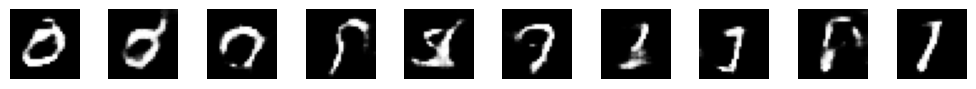

Epoch 2/5, Batch 205, Discriminator Loss: 0.845493495464325, Generator Loss: 1.756496548652649
Epoch 2/5, Batch 206, Discriminator Loss: 0.9989765882492065, Generator Loss: 0.8640528917312622
Epoch 2/5, Batch 207, Discriminator Loss: 0.888121485710144, Generator Loss: 1.901268720626831
Epoch 2/5, Batch 208, Discriminator Loss: 0.8981363773345947, Generator Loss: 0.8459693193435669
Epoch 2/5, Batch 209, Discriminator Loss: 0.926681637763977, Generator Loss: 1.8520114421844482


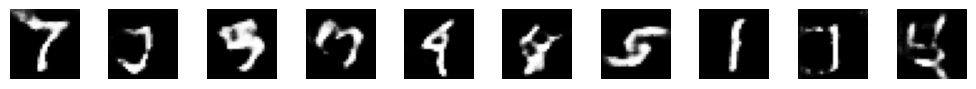

Epoch 2/5, Batch 210, Discriminator Loss: 0.9444732666015625, Generator Loss: 0.8217141628265381
Epoch 2/5, Batch 211, Discriminator Loss: 0.8414023518562317, Generator Loss: 1.9647796154022217
Epoch 2/5, Batch 212, Discriminator Loss: 0.9548723697662354, Generator Loss: 0.7681065797805786
Epoch 2/5, Batch 213, Discriminator Loss: 0.9152277708053589, Generator Loss: 1.9340969324111938
Epoch 2/5, Batch 214, Discriminator Loss: 1.0110636949539185, Generator Loss: 0.7836824655532837


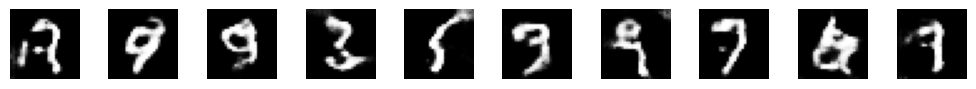

Epoch 2/5, Batch 215, Discriminator Loss: 0.8348391056060791, Generator Loss: 1.775181770324707
Epoch 2/5, Batch 216, Discriminator Loss: 0.9352232813835144, Generator Loss: 0.8624504804611206
Epoch 2/5, Batch 217, Discriminator Loss: 1.0331017971038818, Generator Loss: 2.110339879989624
Epoch 2/5, Batch 218, Discriminator Loss: 0.9188448190689087, Generator Loss: 0.8315574526786804
Epoch 2/5, Batch 219, Discriminator Loss: 0.9805412292480469, Generator Loss: 1.940019965171814


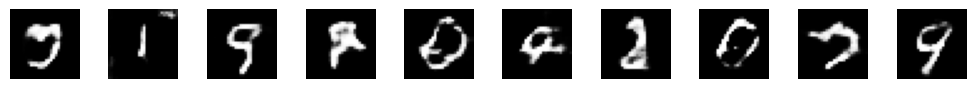

Epoch 2/5, Batch 220, Discriminator Loss: 1.0275170803070068, Generator Loss: 2.307894468307495
Epoch 2/5, Batch 221, Discriminator Loss: 0.8365552425384521, Generator Loss: 1.615175485610962
Epoch 2/5, Batch 222, Discriminator Loss: 0.8581002950668335, Generator Loss: 0.9464808702468872
Epoch 2/5, Batch 223, Discriminator Loss: 1.202363133430481, Generator Loss: 2.3604087829589844
Epoch 2/5, Batch 224, Discriminator Loss: 0.9550366401672363, Generator Loss: 0.7619262933731079


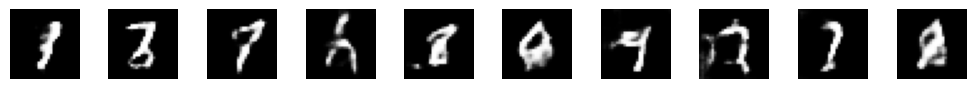

Epoch 2/5, Batch 225, Discriminator Loss: 0.8667818307876587, Generator Loss: 1.7080262899398804
Epoch 2/5, Batch 226, Discriminator Loss: 0.8505231142044067, Generator Loss: 0.9650012850761414
Epoch 2/5, Batch 227, Discriminator Loss: 1.0366573333740234, Generator Loss: 2.072885274887085
Epoch 2/5, Batch 228, Discriminator Loss: 0.7342860698699951, Generator Loss: 1.0559964179992676
Epoch 2/5, Batch 229, Discriminator Loss: 0.8397831320762634, Generator Loss: 1.9307949542999268


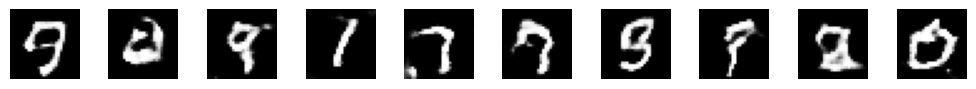

Epoch 2/5, Batch 230, Discriminator Loss: 0.9166464805603027, Generator Loss: 0.9090569615364075
Epoch 2/5, Batch 231, Discriminator Loss: 1.0651172399520874, Generator Loss: 2.10778546333313
Epoch 2/5, Batch 232, Discriminator Loss: 0.8588040471076965, Generator Loss: 0.9255912899971008
Epoch 2/5, Batch 233, Discriminator Loss: 1.029748558998108, Generator Loss: 1.952849268913269
Epoch 2/5, Batch 234, Discriminator Loss: 0.6482996940612793, Generator Loss: 1.3153666257858276


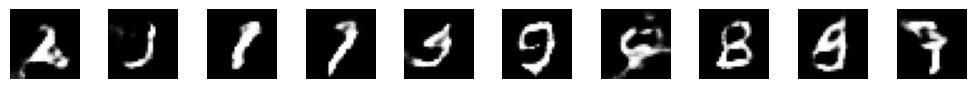

End of epoch 2, Discriminator Loss: 0.6482996940612793, Generator Loss: 1.3153666257858276
Epoch 3/5, Batch 0, Discriminator Loss: 0.9373860359191895, Generator Loss: 2.3005287647247314
Epoch 3/5, Batch 1, Discriminator Loss: 0.8204931020736694, Generator Loss: 0.9124482274055481
Epoch 3/5, Batch 2, Discriminator Loss: 1.0680326223373413, Generator Loss: 2.37874174118042
Epoch 3/5, Batch 3, Discriminator Loss: 0.880901575088501, Generator Loss: 0.843661367893219
Epoch 3/5, Batch 4, Discriminator Loss: 0.9112627506256104, Generator Loss: 1.859604001045227


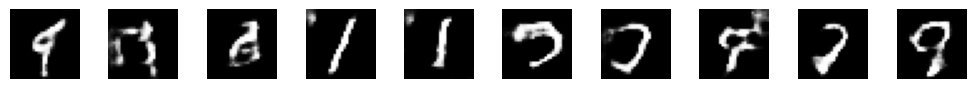

Epoch 3/5, Batch 5, Discriminator Loss: 0.9642287492752075, Generator Loss: 0.8220524191856384
Epoch 3/5, Batch 6, Discriminator Loss: 0.91657954454422, Generator Loss: 1.8020578622817993
Epoch 3/5, Batch 7, Discriminator Loss: 0.8841837048530579, Generator Loss: 0.8363797664642334
Epoch 3/5, Batch 8, Discriminator Loss: 0.9004925489425659, Generator Loss: 2.007631540298462
Epoch 3/5, Batch 9, Discriminator Loss: 0.8786927461624146, Generator Loss: 0.9317470192909241


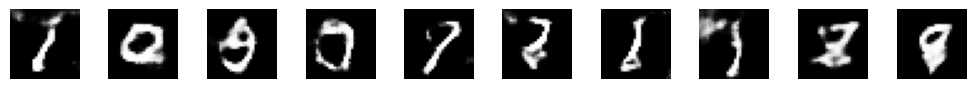

Epoch 3/5, Batch 10, Discriminator Loss: 0.9153071641921997, Generator Loss: 2.091017484664917
Epoch 3/5, Batch 11, Discriminator Loss: 0.8660682439804077, Generator Loss: 0.8131935596466064
Epoch 3/5, Batch 12, Discriminator Loss: 0.9338923096656799, Generator Loss: 1.809606909751892
Epoch 3/5, Batch 13, Discriminator Loss: 0.8351027965545654, Generator Loss: 0.9930066466331482
Epoch 3/5, Batch 14, Discriminator Loss: 0.9534860849380493, Generator Loss: 2.098503589630127


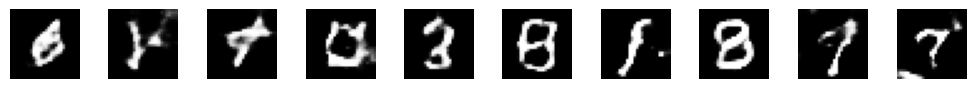

Epoch 3/5, Batch 15, Discriminator Loss: 0.8454313278198242, Generator Loss: 0.9191065430641174
Epoch 3/5, Batch 16, Discriminator Loss: 1.1856054067611694, Generator Loss: 2.1948041915893555
Epoch 3/5, Batch 17, Discriminator Loss: 0.7165452241897583, Generator Loss: 2.048426389694214
Epoch 3/5, Batch 18, Discriminator Loss: 0.7335803508758545, Generator Loss: 1.4711145162582397
Epoch 3/5, Batch 19, Discriminator Loss: 0.8047004342079163, Generator Loss: 1.348482370376587


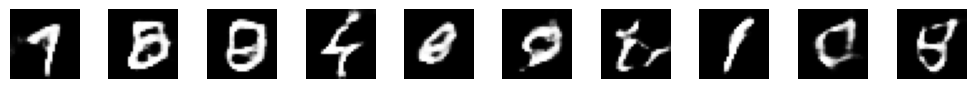

Epoch 3/5, Batch 20, Discriminator Loss: 0.8652663826942444, Generator Loss: 1.651028037071228
Epoch 3/5, Batch 21, Discriminator Loss: 1.5820915699005127, Generator Loss: 0.3150389790534973
Epoch 3/5, Batch 22, Discriminator Loss: 0.9093390107154846, Generator Loss: 1.9140570163726807
Epoch 3/5, Batch 23, Discriminator Loss: 0.902978777885437, Generator Loss: 0.8793573379516602
Epoch 3/5, Batch 24, Discriminator Loss: 0.8912506103515625, Generator Loss: 2.0615074634552


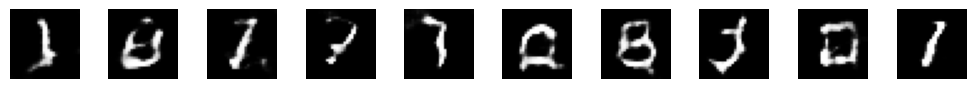

Epoch 3/5, Batch 25, Discriminator Loss: 0.7963420152664185, Generator Loss: 0.9910959601402283
Epoch 3/5, Batch 26, Discriminator Loss: 0.9324843287467957, Generator Loss: 2.1026387214660645
Epoch 3/5, Batch 27, Discriminator Loss: 0.9373594522476196, Generator Loss: 0.8363219499588013
Epoch 3/5, Batch 28, Discriminator Loss: 0.7903109788894653, Generator Loss: 1.5857408046722412
Epoch 3/5, Batch 29, Discriminator Loss: 0.7427608370780945, Generator Loss: 1.500238299369812


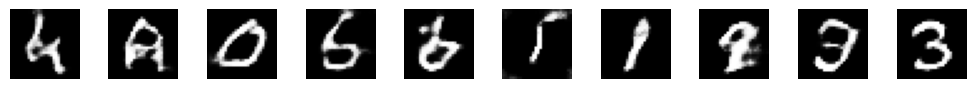

Epoch 3/5, Batch 30, Discriminator Loss: 0.7562218904495239, Generator Loss: 1.3103132247924805
Epoch 3/5, Batch 31, Discriminator Loss: 1.0570182800292969, Generator Loss: 2.444920063018799
Epoch 3/5, Batch 32, Discriminator Loss: 0.9687154293060303, Generator Loss: 0.7751284837722778
Epoch 3/5, Batch 33, Discriminator Loss: 0.9063839912414551, Generator Loss: 1.781319260597229
Epoch 3/5, Batch 34, Discriminator Loss: 0.9160096645355225, Generator Loss: 0.8209173083305359


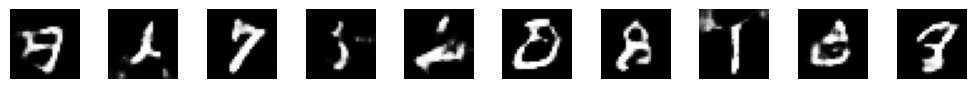

Epoch 3/5, Batch 35, Discriminator Loss: 0.9536214470863342, Generator Loss: 1.828531265258789
Epoch 3/5, Batch 36, Discriminator Loss: 0.8652430772781372, Generator Loss: 0.8267737030982971
Epoch 3/5, Batch 37, Discriminator Loss: 1.0075680017471313, Generator Loss: 1.9599387645721436
Epoch 3/5, Batch 38, Discriminator Loss: 0.7625396847724915, Generator Loss: 1.0276566743850708
Epoch 3/5, Batch 39, Discriminator Loss: 1.0080463886260986, Generator Loss: 2.013275623321533


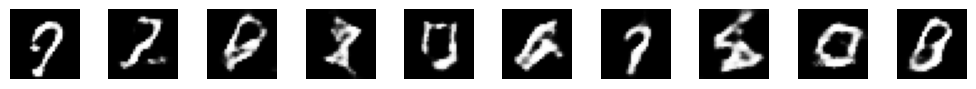

Epoch 3/5, Batch 40, Discriminator Loss: 0.8932322263717651, Generator Loss: 0.7935410141944885
Epoch 3/5, Batch 41, Discriminator Loss: 0.8660613298416138, Generator Loss: 1.8481848239898682
Epoch 3/5, Batch 42, Discriminator Loss: 0.8275177478790283, Generator Loss: 0.9286011457443237
Epoch 3/5, Batch 43, Discriminator Loss: 0.9599430561065674, Generator Loss: 2.083272695541382
Epoch 3/5, Batch 44, Discriminator Loss: 0.8876303434371948, Generator Loss: 0.8380900621414185


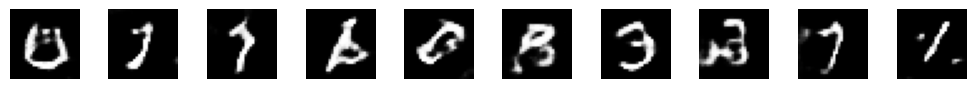

Epoch 3/5, Batch 45, Discriminator Loss: 0.9424446225166321, Generator Loss: 2.0420022010803223
Epoch 3/5, Batch 46, Discriminator Loss: 0.8653901815414429, Generator Loss: 0.8103410601615906
Epoch 3/5, Batch 47, Discriminator Loss: 0.7689106464385986, Generator Loss: 1.8371789455413818
Epoch 3/5, Batch 48, Discriminator Loss: 1.0438287258148193, Generator Loss: 0.788643479347229
Epoch 3/5, Batch 49, Discriminator Loss: 0.979733943939209, Generator Loss: 2.3515758514404297


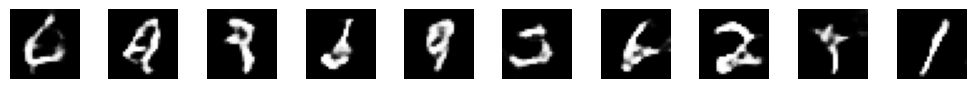

Epoch 3/5, Batch 50, Discriminator Loss: 0.8494018912315369, Generator Loss: 0.8858191967010498
Epoch 3/5, Batch 51, Discriminator Loss: 0.920733630657196, Generator Loss: 1.9027444124221802
Epoch 3/5, Batch 52, Discriminator Loss: 0.9891068935394287, Generator Loss: 0.6978528499603271
Epoch 3/5, Batch 53, Discriminator Loss: 0.8022434115409851, Generator Loss: 1.7696168422698975
Epoch 3/5, Batch 54, Discriminator Loss: 0.8505086302757263, Generator Loss: 0.9326494932174683


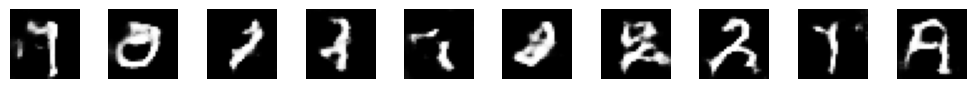

Epoch 3/5, Batch 55, Discriminator Loss: 0.9950330257415771, Generator Loss: 2.306358814239502
Epoch 3/5, Batch 56, Discriminator Loss: 0.833983302116394, Generator Loss: 0.9078879356384277
Epoch 3/5, Batch 57, Discriminator Loss: 0.8687549233436584, Generator Loss: 1.8468971252441406
Epoch 3/5, Batch 58, Discriminator Loss: 0.8277633786201477, Generator Loss: 0.8644027709960938
Epoch 3/5, Batch 59, Discriminator Loss: 0.7711409330368042, Generator Loss: 1.7747492790222168


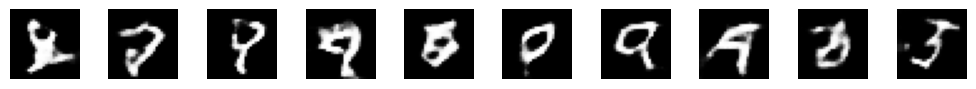

Epoch 3/5, Batch 60, Discriminator Loss: 1.0412518978118896, Generator Loss: 0.7002919912338257
Epoch 3/5, Batch 61, Discriminator Loss: 0.8730039000511169, Generator Loss: 1.9189906120300293
Epoch 3/5, Batch 62, Discriminator Loss: 0.9123960137367249, Generator Loss: 0.7954875826835632
Epoch 3/5, Batch 63, Discriminator Loss: 0.9522483348846436, Generator Loss: 1.9313840866088867
Epoch 3/5, Batch 64, Discriminator Loss: 0.7944067120552063, Generator Loss: 0.9841305613517761


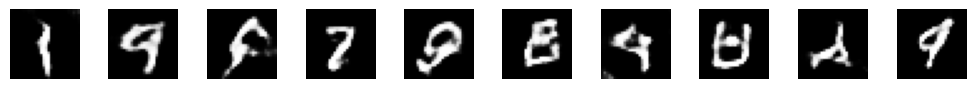

Epoch 3/5, Batch 65, Discriminator Loss: 0.9302793741226196, Generator Loss: 2.0482683181762695
Epoch 3/5, Batch 66, Discriminator Loss: 0.9154059290885925, Generator Loss: 0.8394952416419983
Epoch 3/5, Batch 67, Discriminator Loss: 1.033823847770691, Generator Loss: 2.0660438537597656
Epoch 3/5, Batch 68, Discriminator Loss: 0.6595280170440674, Generator Loss: 1.4523409605026245
Epoch 3/5, Batch 69, Discriminator Loss: 1.0071382522583008, Generator Loss: 2.4846296310424805


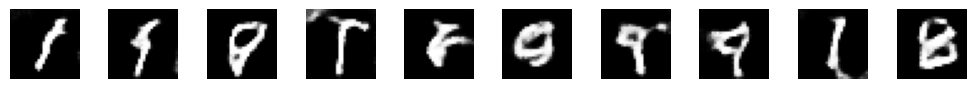

Epoch 3/5, Batch 70, Discriminator Loss: 0.8958085775375366, Generator Loss: 0.8605165481567383
Epoch 3/5, Batch 71, Discriminator Loss: 0.7994416952133179, Generator Loss: 1.9033559560775757
Epoch 3/5, Batch 72, Discriminator Loss: 0.8711123466491699, Generator Loss: 0.8931952714920044
Epoch 3/5, Batch 73, Discriminator Loss: 0.9830785989761353, Generator Loss: 2.142328977584839
Epoch 3/5, Batch 74, Discriminator Loss: 0.9495395421981812, Generator Loss: 0.8551427125930786


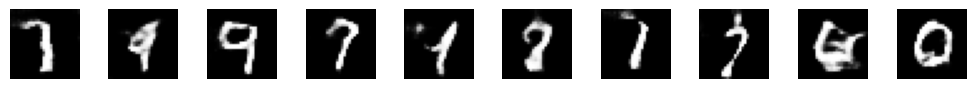

Epoch 3/5, Batch 75, Discriminator Loss: 0.8649702072143555, Generator Loss: 1.6642593145370483
Epoch 3/5, Batch 76, Discriminator Loss: 0.8046875596046448, Generator Loss: 2.078686475753784
Epoch 3/5, Batch 77, Discriminator Loss: 0.7644953727722168, Generator Loss: 1.7207841873168945
Epoch 3/5, Batch 78, Discriminator Loss: 0.7700528502464294, Generator Loss: 1.1447508335113525
Epoch 3/5, Batch 79, Discriminator Loss: 1.2830389738082886, Generator Loss: 2.5802226066589355


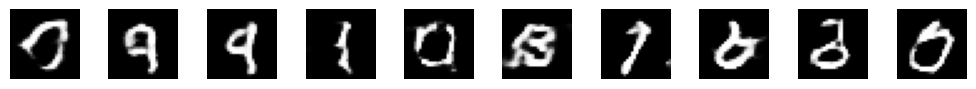

Epoch 3/5, Batch 80, Discriminator Loss: 0.7813725471496582, Generator Loss: 0.9713672399520874
Epoch 3/5, Batch 81, Discriminator Loss: 0.9699575901031494, Generator Loss: 2.015486717224121
Epoch 3/5, Batch 82, Discriminator Loss: 0.8881396055221558, Generator Loss: 0.810325562953949
Epoch 3/5, Batch 83, Discriminator Loss: 0.7974355220794678, Generator Loss: 1.9915311336517334
Epoch 3/5, Batch 84, Discriminator Loss: 0.8485550880432129, Generator Loss: 1.029122233390808


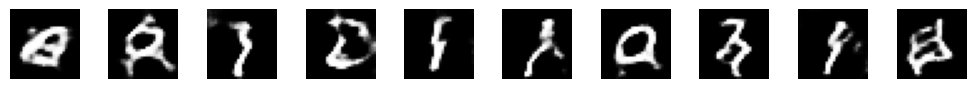

Epoch 3/5, Batch 85, Discriminator Loss: 0.9605178236961365, Generator Loss: 2.087671995162964
Epoch 3/5, Batch 86, Discriminator Loss: 0.849539041519165, Generator Loss: 0.8761883974075317
Epoch 3/5, Batch 87, Discriminator Loss: 0.9579544067382812, Generator Loss: 1.9666292667388916
Epoch 3/5, Batch 88, Discriminator Loss: 0.7941228747367859, Generator Loss: 0.9769802093505859
Epoch 3/5, Batch 89, Discriminator Loss: 0.9272273778915405, Generator Loss: 1.987276554107666


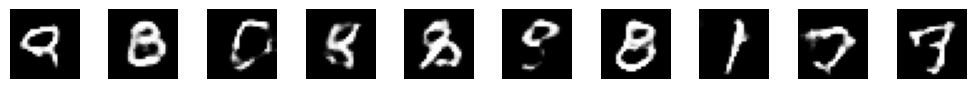

Epoch 3/5, Batch 90, Discriminator Loss: 0.7473028302192688, Generator Loss: 1.1142597198486328
Epoch 3/5, Batch 91, Discriminator Loss: 0.9916447997093201, Generator Loss: 2.1228413581848145
Epoch 3/5, Batch 92, Discriminator Loss: 0.8107855319976807, Generator Loss: 0.8876678943634033
Epoch 3/5, Batch 93, Discriminator Loss: 0.9557631611824036, Generator Loss: 2.169483184814453
Epoch 3/5, Batch 94, Discriminator Loss: 0.8420160412788391, Generator Loss: 1.0317013263702393


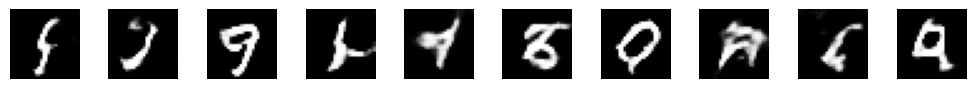

Epoch 3/5, Batch 95, Discriminator Loss: 1.03713059425354, Generator Loss: 2.264751434326172
Epoch 3/5, Batch 96, Discriminator Loss: 0.780078113079071, Generator Loss: 1.057939887046814
Epoch 3/5, Batch 97, Discriminator Loss: 1.0373022556304932, Generator Loss: 2.231646776199341
Epoch 3/5, Batch 98, Discriminator Loss: 0.7420957088470459, Generator Loss: 1.2336838245391846
Epoch 3/5, Batch 99, Discriminator Loss: 1.1314064264297485, Generator Loss: 2.491359233856201


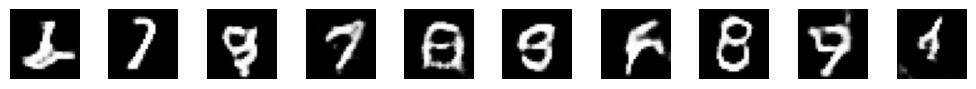

Epoch 3/5, Batch 100, Discriminator Loss: 0.9163322448730469, Generator Loss: 0.8740507364273071
Epoch 3/5, Batch 101, Discriminator Loss: 1.0493193864822388, Generator Loss: 2.035257339477539
Epoch 3/5, Batch 102, Discriminator Loss: 0.7728148698806763, Generator Loss: 2.142457962036133
Epoch 3/5, Batch 103, Discriminator Loss: 0.7293062210083008, Generator Loss: 1.464982271194458
Epoch 3/5, Batch 104, Discriminator Loss: 0.7698778510093689, Generator Loss: 1.1913660764694214


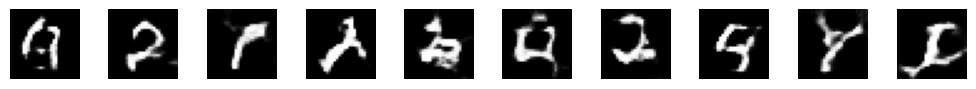

Epoch 3/5, Batch 105, Discriminator Loss: 1.0987188816070557, Generator Loss: 2.456376075744629
Epoch 3/5, Batch 106, Discriminator Loss: 0.8665543794631958, Generator Loss: 0.8963642120361328
Epoch 3/5, Batch 107, Discriminator Loss: 0.9953799247741699, Generator Loss: 1.873758316040039
Epoch 3/5, Batch 108, Discriminator Loss: 0.7848982214927673, Generator Loss: 1.052147626876831
Epoch 3/5, Batch 109, Discriminator Loss: 0.9069021940231323, Generator Loss: 1.9588351249694824


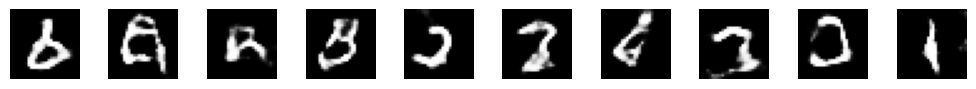

Epoch 3/5, Batch 110, Discriminator Loss: 0.8816407918930054, Generator Loss: 0.9105094075202942
Epoch 3/5, Batch 111, Discriminator Loss: 0.9010137319564819, Generator Loss: 1.898228645324707
Epoch 3/5, Batch 112, Discriminator Loss: 0.9820242524147034, Generator Loss: 0.7324309945106506
Epoch 3/5, Batch 113, Discriminator Loss: 0.9001234769821167, Generator Loss: 2.0476393699645996
Epoch 3/5, Batch 114, Discriminator Loss: 0.8204991817474365, Generator Loss: 0.932610273361206


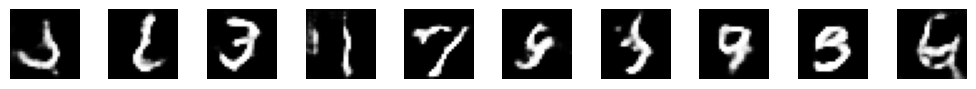

Epoch 3/5, Batch 115, Discriminator Loss: 1.0217384099960327, Generator Loss: 2.162015914916992
Epoch 3/5, Batch 116, Discriminator Loss: 0.7824864387512207, Generator Loss: 0.9643096923828125
Epoch 3/5, Batch 117, Discriminator Loss: 1.0132830142974854, Generator Loss: 1.8571586608886719
Epoch 3/5, Batch 118, Discriminator Loss: 0.7252880334854126, Generator Loss: 1.2310118675231934
Epoch 3/5, Batch 119, Discriminator Loss: 1.0720124244689941, Generator Loss: 2.3824405670166016


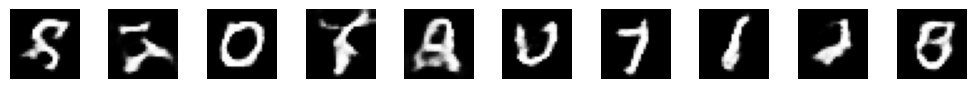

Epoch 3/5, Batch 120, Discriminator Loss: 0.9469797611236572, Generator Loss: 0.8130255341529846
Epoch 3/5, Batch 121, Discriminator Loss: 0.7869554758071899, Generator Loss: 1.9128402471542358
Epoch 3/5, Batch 122, Discriminator Loss: 0.8143419027328491, Generator Loss: 1.5149040222167969
Epoch 3/5, Batch 123, Discriminator Loss: 0.8703936338424683, Generator Loss: 1.2680890560150146
Epoch 3/5, Batch 124, Discriminator Loss: 1.0044535398483276, Generator Loss: 2.3415722846984863


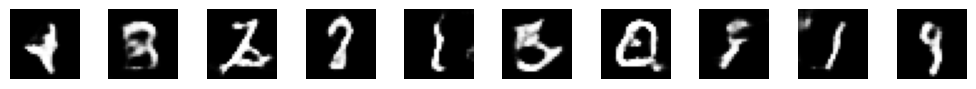

Epoch 3/5, Batch 125, Discriminator Loss: 0.977628767490387, Generator Loss: 0.7361000180244446
Epoch 3/5, Batch 126, Discriminator Loss: 0.8336909413337708, Generator Loss: 1.738365888595581
Epoch 3/5, Batch 127, Discriminator Loss: 0.8194863796234131, Generator Loss: 0.9564130306243896
Epoch 3/5, Batch 128, Discriminator Loss: 0.9415534734725952, Generator Loss: 2.109114170074463
Epoch 3/5, Batch 129, Discriminator Loss: 0.8144956231117249, Generator Loss: 0.9145771265029907


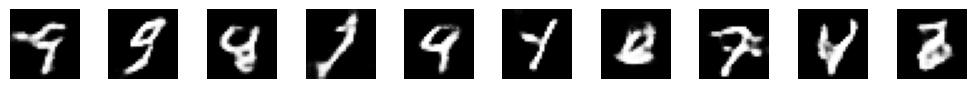

Epoch 3/5, Batch 130, Discriminator Loss: 0.8946530222892761, Generator Loss: 2.180359125137329
Epoch 3/5, Batch 131, Discriminator Loss: 0.830174446105957, Generator Loss: 0.9373100399971008
Epoch 3/5, Batch 132, Discriminator Loss: 0.8696965575218201, Generator Loss: 1.973152756690979
Epoch 3/5, Batch 133, Discriminator Loss: 0.7643194198608398, Generator Loss: 1.8369126319885254
Epoch 3/5, Batch 134, Discriminator Loss: 0.7942579388618469, Generator Loss: 1.9035238027572632


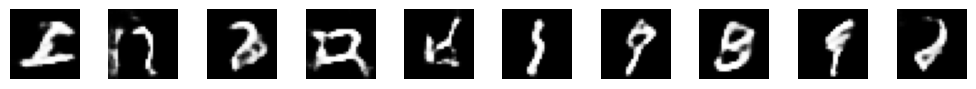

Epoch 3/5, Batch 135, Discriminator Loss: 1.0825567245483398, Generator Loss: 0.6081451177597046
Epoch 3/5, Batch 136, Discriminator Loss: 0.9947537779808044, Generator Loss: 2.110736608505249
Epoch 3/5, Batch 137, Discriminator Loss: 0.8043954372406006, Generator Loss: 1.0248697996139526
Epoch 3/5, Batch 138, Discriminator Loss: 0.9078980684280396, Generator Loss: 1.8508415222167969
Epoch 3/5, Batch 139, Discriminator Loss: 0.9561713933944702, Generator Loss: 0.7910930514335632


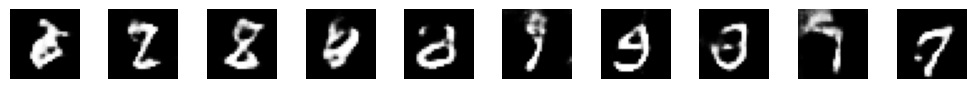

Epoch 3/5, Batch 140, Discriminator Loss: 0.8913140296936035, Generator Loss: 1.826741099357605
Epoch 3/5, Batch 141, Discriminator Loss: 0.9625571966171265, Generator Loss: 0.7955461740493774
Epoch 3/5, Batch 142, Discriminator Loss: 0.795599102973938, Generator Loss: 1.7285637855529785
Epoch 3/5, Batch 143, Discriminator Loss: 0.8511644601821899, Generator Loss: 0.9625368118286133
Epoch 3/5, Batch 144, Discriminator Loss: 0.8131389617919922, Generator Loss: 2.0661821365356445


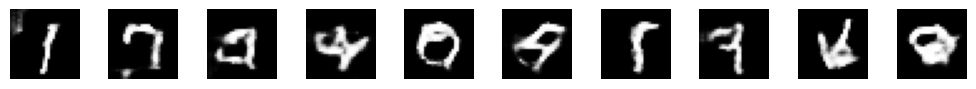

Epoch 3/5, Batch 145, Discriminator Loss: 0.8690564632415771, Generator Loss: 0.8820499181747437
Epoch 3/5, Batch 146, Discriminator Loss: 0.8599578142166138, Generator Loss: 1.78471839427948
Epoch 3/5, Batch 147, Discriminator Loss: 0.7728129625320435, Generator Loss: 1.0683807134628296
Epoch 3/5, Batch 148, Discriminator Loss: 0.9140218496322632, Generator Loss: 2.0317461490631104
Epoch 3/5, Batch 149, Discriminator Loss: 0.9866101145744324, Generator Loss: 0.7504363059997559


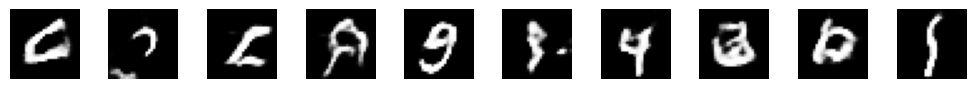

Epoch 3/5, Batch 150, Discriminator Loss: 0.9698840379714966, Generator Loss: 1.9037278890609741
Epoch 3/5, Batch 151, Discriminator Loss: 0.7862823009490967, Generator Loss: 1.125627875328064
Epoch 3/5, Batch 152, Discriminator Loss: 1.0896660089492798, Generator Loss: 2.2591867446899414
Epoch 3/5, Batch 153, Discriminator Loss: 0.7785279154777527, Generator Loss: 0.9738951325416565
Epoch 3/5, Batch 154, Discriminator Loss: 0.8054510354995728, Generator Loss: 2.0925405025482178


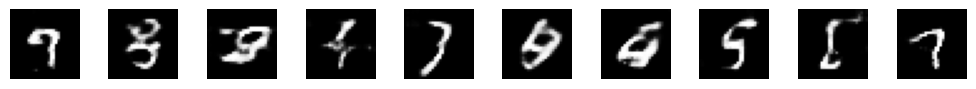

Epoch 3/5, Batch 155, Discriminator Loss: 0.7664896249771118, Generator Loss: 1.2000141143798828
Epoch 3/5, Batch 156, Discriminator Loss: 1.143904447555542, Generator Loss: 2.396061897277832
Epoch 3/5, Batch 157, Discriminator Loss: 0.7750512957572937, Generator Loss: 1.0052341222763062
Epoch 3/5, Batch 158, Discriminator Loss: 1.0630857944488525, Generator Loss: 2.2923245429992676
Epoch 3/5, Batch 159, Discriminator Loss: 0.7319642305374146, Generator Loss: 1.8623428344726562


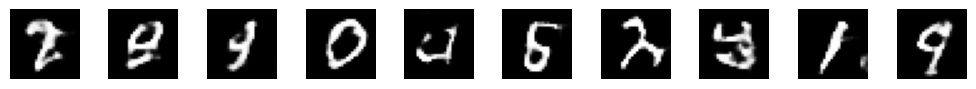

Epoch 3/5, Batch 160, Discriminator Loss: 0.7163352966308594, Generator Loss: 1.3957364559173584
Epoch 3/5, Batch 161, Discriminator Loss: 0.8896649479866028, Generator Loss: 2.2232213020324707
Epoch 3/5, Batch 162, Discriminator Loss: 1.0843390226364136, Generator Loss: 0.6504895091056824
Epoch 3/5, Batch 163, Discriminator Loss: 0.8794389963150024, Generator Loss: 1.8287632465362549
Epoch 3/5, Batch 164, Discriminator Loss: 0.8626906871795654, Generator Loss: 0.948307991027832


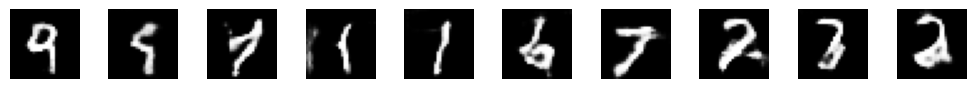

Epoch 3/5, Batch 165, Discriminator Loss: 0.840034008026123, Generator Loss: 1.9583991765975952
Epoch 3/5, Batch 166, Discriminator Loss: 0.9406682848930359, Generator Loss: 0.7997775077819824
Epoch 3/5, Batch 167, Discriminator Loss: 0.9485600590705872, Generator Loss: 1.979306697845459
Epoch 3/5, Batch 168, Discriminator Loss: 0.8571985363960266, Generator Loss: 0.940496027469635
Epoch 3/5, Batch 169, Discriminator Loss: 0.9106054902076721, Generator Loss: 2.0685787200927734


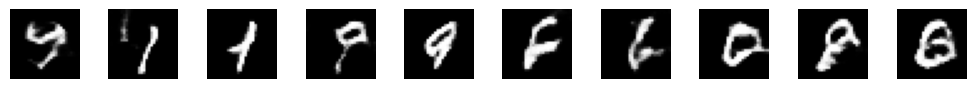

Epoch 3/5, Batch 170, Discriminator Loss: 0.906894862651825, Generator Loss: 0.8090840578079224
Epoch 3/5, Batch 171, Discriminator Loss: 0.9513598680496216, Generator Loss: 2.0832650661468506
Epoch 3/5, Batch 172, Discriminator Loss: 0.7189334630966187, Generator Loss: 1.1305493116378784
Epoch 3/5, Batch 173, Discriminator Loss: 0.9433868527412415, Generator Loss: 2.1976895332336426
Epoch 3/5, Batch 174, Discriminator Loss: 0.8287618160247803, Generator Loss: 0.8992868065834045


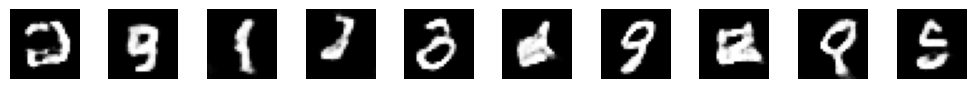

Epoch 3/5, Batch 175, Discriminator Loss: 0.8392533659934998, Generator Loss: 1.9001307487487793
Epoch 3/5, Batch 176, Discriminator Loss: 1.0511059761047363, Generator Loss: 0.6916946172714233
Epoch 3/5, Batch 177, Discriminator Loss: 0.9625402688980103, Generator Loss: 2.0038206577301025
Epoch 3/5, Batch 178, Discriminator Loss: 0.8592789173126221, Generator Loss: 0.9913879036903381
Epoch 3/5, Batch 179, Discriminator Loss: 0.9077467918395996, Generator Loss: 2.0411951541900635


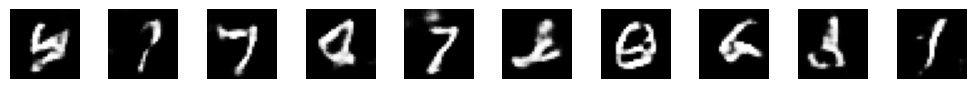

Epoch 3/5, Batch 180, Discriminator Loss: 0.7416954040527344, Generator Loss: 1.0900425910949707
Epoch 3/5, Batch 181, Discriminator Loss: 0.9835909008979797, Generator Loss: 2.0658655166625977
Epoch 3/5, Batch 182, Discriminator Loss: 0.7707628011703491, Generator Loss: 0.9767016768455505
Epoch 3/5, Batch 183, Discriminator Loss: 0.8892427086830139, Generator Loss: 1.9534835815429688
Epoch 3/5, Batch 184, Discriminator Loss: 0.8003430366516113, Generator Loss: 0.953728199005127


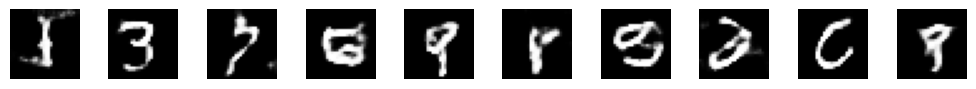

Epoch 3/5, Batch 185, Discriminator Loss: 0.9544526934623718, Generator Loss: 2.032606840133667
Epoch 3/5, Batch 186, Discriminator Loss: 0.821128785610199, Generator Loss: 0.9402039647102356
Epoch 3/5, Batch 187, Discriminator Loss: 0.8874707818031311, Generator Loss: 1.794070839881897
Epoch 3/5, Batch 188, Discriminator Loss: 0.6991701126098633, Generator Loss: 1.3279128074645996
Epoch 3/5, Batch 189, Discriminator Loss: 0.9299792051315308, Generator Loss: 2.1847763061523438


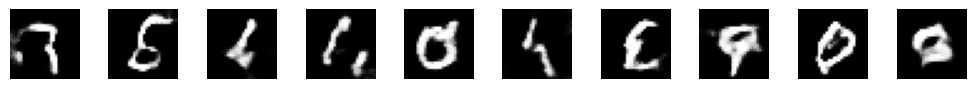

Epoch 3/5, Batch 190, Discriminator Loss: 1.188631296157837, Generator Loss: 0.6131675839424133
Epoch 3/5, Batch 191, Discriminator Loss: 0.8036491870880127, Generator Loss: 1.810501217842102
Epoch 3/5, Batch 192, Discriminator Loss: 0.9038161039352417, Generator Loss: 0.870009183883667
Epoch 3/5, Batch 193, Discriminator Loss: 0.825644850730896, Generator Loss: 1.575514316558838
Epoch 3/5, Batch 194, Discriminator Loss: 0.8796964287757874, Generator Loss: 0.9308648109436035


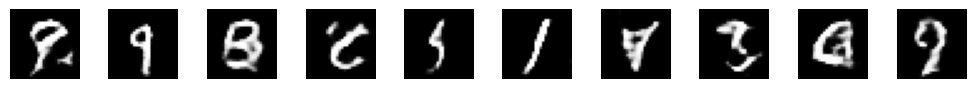

Epoch 3/5, Batch 195, Discriminator Loss: 1.09513521194458, Generator Loss: 2.142176866531372
Epoch 3/5, Batch 196, Discriminator Loss: 0.8221607208251953, Generator Loss: 0.9840284585952759
Epoch 3/5, Batch 197, Discriminator Loss: 0.8863459229469299, Generator Loss: 1.8560150861740112
Epoch 3/5, Batch 198, Discriminator Loss: 0.890188455581665, Generator Loss: 0.8182872533798218
Epoch 3/5, Batch 199, Discriminator Loss: 0.9142793416976929, Generator Loss: 1.9464397430419922


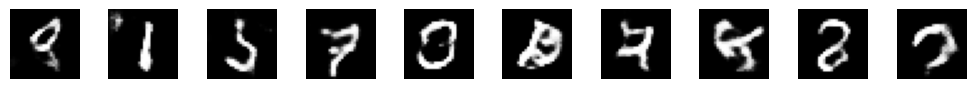

Epoch 3/5, Batch 200, Discriminator Loss: 0.8147196769714355, Generator Loss: 0.9973426461219788
Epoch 3/5, Batch 201, Discriminator Loss: 0.904529869556427, Generator Loss: 2.1660420894622803
Epoch 3/5, Batch 202, Discriminator Loss: 0.8187777400016785, Generator Loss: 1.0313680171966553
Epoch 3/5, Batch 203, Discriminator Loss: 0.8005166053771973, Generator Loss: 1.783896803855896
Epoch 3/5, Batch 204, Discriminator Loss: 1.0081093311309814, Generator Loss: 0.6751677989959717


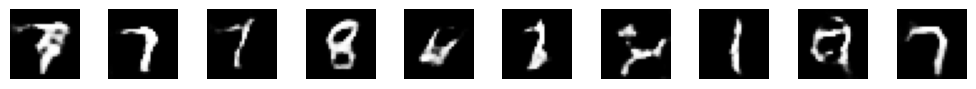

Epoch 3/5, Batch 205, Discriminator Loss: 0.9632761478424072, Generator Loss: 1.9600510597229004
Epoch 3/5, Batch 206, Discriminator Loss: 0.7544530034065247, Generator Loss: 1.093677282333374
Epoch 3/5, Batch 207, Discriminator Loss: 1.005291223526001, Generator Loss: 2.168030261993408
Epoch 3/5, Batch 208, Discriminator Loss: 0.8353601694107056, Generator Loss: 0.9245080947875977
Epoch 3/5, Batch 209, Discriminator Loss: 0.8295099139213562, Generator Loss: 1.8201864957809448


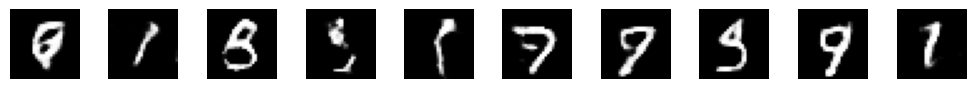

Epoch 3/5, Batch 210, Discriminator Loss: 0.7574406266212463, Generator Loss: 1.0469297170639038
Epoch 3/5, Batch 211, Discriminator Loss: 0.9798571467399597, Generator Loss: 2.197960376739502
Epoch 3/5, Batch 212, Discriminator Loss: 0.7958998680114746, Generator Loss: 1.0239217281341553
Epoch 3/5, Batch 213, Discriminator Loss: 0.8406558632850647, Generator Loss: 2.2360360622406006
Epoch 3/5, Batch 214, Discriminator Loss: 0.8074160814285278, Generator Loss: 1.0448429584503174


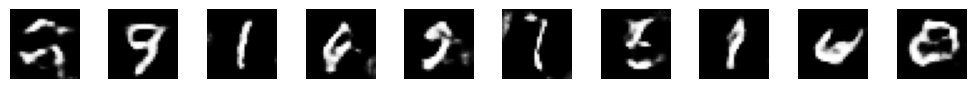

Epoch 3/5, Batch 215, Discriminator Loss: 1.0408309698104858, Generator Loss: 2.2953457832336426
Epoch 3/5, Batch 216, Discriminator Loss: 0.7494586110115051, Generator Loss: 1.9139606952667236
Epoch 3/5, Batch 217, Discriminator Loss: 0.8483214974403381, Generator Loss: 1.0539577007293701
Epoch 3/5, Batch 218, Discriminator Loss: 0.9697951078414917, Generator Loss: 2.2755255699157715
Epoch 3/5, Batch 219, Discriminator Loss: 0.7969215512275696, Generator Loss: 0.9922458529472351


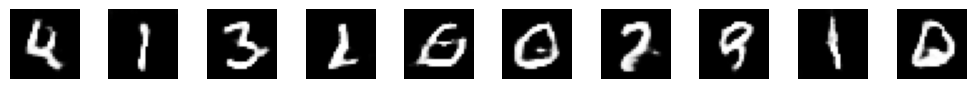

Epoch 3/5, Batch 220, Discriminator Loss: 0.935944676399231, Generator Loss: 2.064174175262451
Epoch 3/5, Batch 221, Discriminator Loss: 0.8074900507926941, Generator Loss: 0.9957480430603027
Epoch 3/5, Batch 222, Discriminator Loss: 0.9913383722305298, Generator Loss: 2.1859724521636963
Epoch 3/5, Batch 223, Discriminator Loss: 0.7018313407897949, Generator Loss: 1.1761164665222168
Epoch 3/5, Batch 224, Discriminator Loss: 0.8853607773780823, Generator Loss: 2.023914098739624


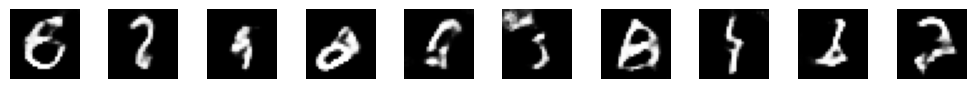

Epoch 3/5, Batch 225, Discriminator Loss: 1.049291968345642, Generator Loss: 0.6579079031944275
Epoch 3/5, Batch 226, Discriminator Loss: 0.8473510146141052, Generator Loss: 2.016698122024536
Epoch 3/5, Batch 227, Discriminator Loss: 0.9463179111480713, Generator Loss: 0.848176121711731
Epoch 3/5, Batch 228, Discriminator Loss: 0.9406235218048096, Generator Loss: 2.0402567386627197
Epoch 3/5, Batch 229, Discriminator Loss: 0.7629293203353882, Generator Loss: 1.0794533491134644


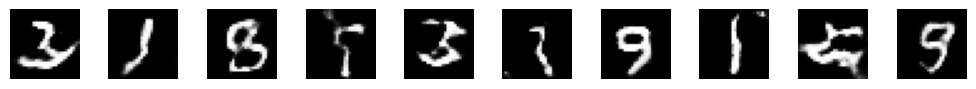

Epoch 3/5, Batch 230, Discriminator Loss: 0.8938372135162354, Generator Loss: 1.9895707368850708
Epoch 3/5, Batch 231, Discriminator Loss: 0.887426495552063, Generator Loss: 0.8638883829116821
Epoch 3/5, Batch 232, Discriminator Loss: 0.906399130821228, Generator Loss: 2.099341869354248
Epoch 3/5, Batch 233, Discriminator Loss: 0.8832017183303833, Generator Loss: 0.8573259711265564
Epoch 3/5, Batch 234, Discriminator Loss: 0.8433887362480164, Generator Loss: 2.132890224456787


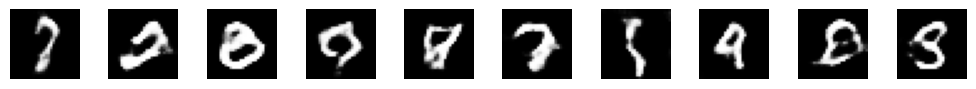

End of epoch 3, Discriminator Loss: 0.8433887362480164, Generator Loss: 2.132890224456787
Epoch 4/5, Batch 0, Discriminator Loss: 0.726007342338562, Generator Loss: 1.780095100402832
Epoch 4/5, Batch 1, Discriminator Loss: 0.910774290561676, Generator Loss: 0.8978577852249146
Epoch 4/5, Batch 2, Discriminator Loss: 0.9843992590904236, Generator Loss: 2.369689464569092
Epoch 4/5, Batch 3, Discriminator Loss: 0.7644453048706055, Generator Loss: 1.0966386795043945
Epoch 4/5, Batch 4, Discriminator Loss: 0.9254127740859985, Generator Loss: 1.9598802328109741


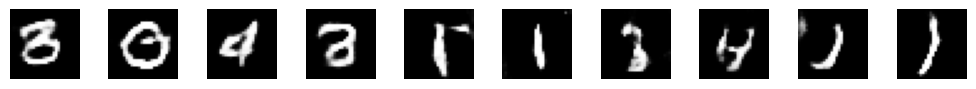

Epoch 4/5, Batch 5, Discriminator Loss: 0.9348723888397217, Generator Loss: 0.8891146779060364
Epoch 4/5, Batch 6, Discriminator Loss: 1.0046014785766602, Generator Loss: 2.0586624145507812
Epoch 4/5, Batch 7, Discriminator Loss: 0.7458682060241699, Generator Loss: 2.064948081970215
Epoch 4/5, Batch 8, Discriminator Loss: 0.7188768982887268, Generator Loss: 1.107090950012207
Epoch 4/5, Batch 9, Discriminator Loss: 1.0785596370697021, Generator Loss: 2.5627760887145996


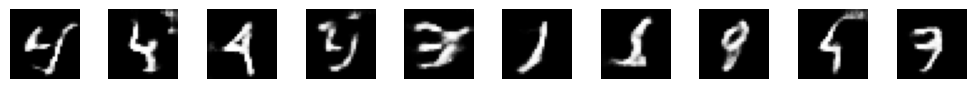

Epoch 4/5, Batch 10, Discriminator Loss: 0.9641548991203308, Generator Loss: 0.7168853282928467
Epoch 4/5, Batch 11, Discriminator Loss: 0.880962610244751, Generator Loss: 1.9020326137542725
Epoch 4/5, Batch 12, Discriminator Loss: 0.8274572491645813, Generator Loss: 0.9594940543174744
Epoch 4/5, Batch 13, Discriminator Loss: 0.9251620769500732, Generator Loss: 2.004634141921997
Epoch 4/5, Batch 14, Discriminator Loss: 0.7038192749023438, Generator Loss: 1.1798840761184692


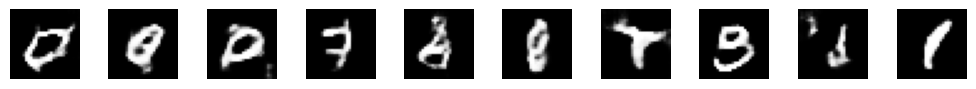

Epoch 4/5, Batch 15, Discriminator Loss: 0.8932929039001465, Generator Loss: 2.254699468612671
Epoch 4/5, Batch 16, Discriminator Loss: 0.6348597407341003, Generator Loss: 1.9807887077331543
Epoch 4/5, Batch 17, Discriminator Loss: 0.7732335329055786, Generator Loss: 2.1164820194244385
Epoch 4/5, Batch 18, Discriminator Loss: 1.0642966032028198, Generator Loss: 0.6509931683540344
Epoch 4/5, Batch 19, Discriminator Loss: 0.9325969815254211, Generator Loss: 2.1216225624084473


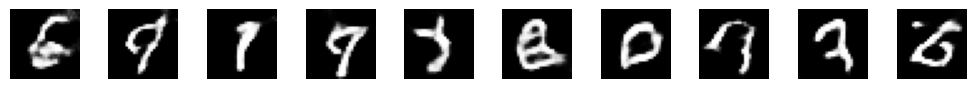

Epoch 4/5, Batch 20, Discriminator Loss: 0.8686412572860718, Generator Loss: 0.9168122410774231
Epoch 4/5, Batch 21, Discriminator Loss: 0.8778011798858643, Generator Loss: 2.017681360244751
Epoch 4/5, Batch 22, Discriminator Loss: 0.7661107778549194, Generator Loss: 1.3151087760925293
Epoch 4/5, Batch 23, Discriminator Loss: 0.7908176183700562, Generator Loss: 1.493139624595642
Epoch 4/5, Batch 24, Discriminator Loss: 1.2063608169555664, Generator Loss: 2.96054744720459


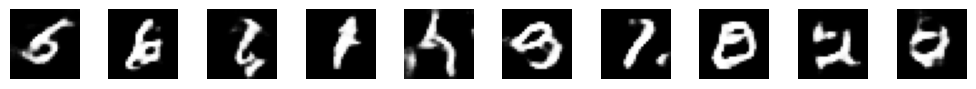

Epoch 4/5, Batch 25, Discriminator Loss: 0.7273926734924316, Generator Loss: 1.0886640548706055
Epoch 4/5, Batch 26, Discriminator Loss: 1.2723572254180908, Generator Loss: 2.7295398712158203
Epoch 4/5, Batch 27, Discriminator Loss: 0.7548815608024597, Generator Loss: 1.0823580026626587
Epoch 4/5, Batch 28, Discriminator Loss: 0.9107134342193604, Generator Loss: 2.314915895462036
Epoch 4/5, Batch 29, Discriminator Loss: 0.8505746722221375, Generator Loss: 0.9162275791168213


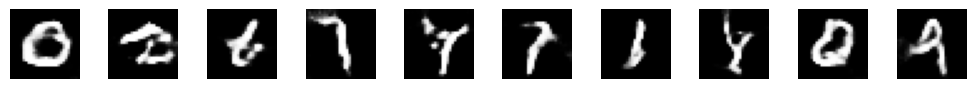

Epoch 4/5, Batch 30, Discriminator Loss: 0.9599605202674866, Generator Loss: 2.1123406887054443
Epoch 4/5, Batch 31, Discriminator Loss: 0.8560463190078735, Generator Loss: 0.9178931713104248
Epoch 4/5, Batch 32, Discriminator Loss: 0.8853812217712402, Generator Loss: 2.0117878913879395
Epoch 4/5, Batch 33, Discriminator Loss: 0.7340190410614014, Generator Loss: 1.0554360151290894
Epoch 4/5, Batch 34, Discriminator Loss: 0.9000247120857239, Generator Loss: 2.0080337524414062


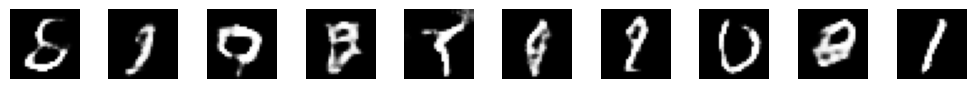

Epoch 4/5, Batch 35, Discriminator Loss: 0.8313323259353638, Generator Loss: 0.9285297989845276
Epoch 4/5, Batch 36, Discriminator Loss: 0.9759069085121155, Generator Loss: 2.1291725635528564
Epoch 4/5, Batch 37, Discriminator Loss: 0.7618926763534546, Generator Loss: 1.151626467704773
Epoch 4/5, Batch 38, Discriminator Loss: 0.773029088973999, Generator Loss: 1.9874529838562012
Epoch 4/5, Batch 39, Discriminator Loss: 0.8057727813720703, Generator Loss: 0.9252966046333313


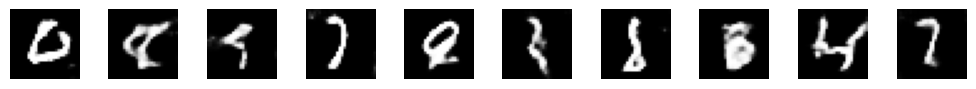

Epoch 4/5, Batch 40, Discriminator Loss: 0.8452559113502502, Generator Loss: 1.9790879487991333
Epoch 4/5, Batch 41, Discriminator Loss: 0.7970463633537292, Generator Loss: 0.9811309576034546
Epoch 4/5, Batch 42, Discriminator Loss: 1.1172642707824707, Generator Loss: 2.0370755195617676
Epoch 4/5, Batch 43, Discriminator Loss: 0.8754604458808899, Generator Loss: 2.629301071166992
Epoch 4/5, Batch 44, Discriminator Loss: 0.7431374192237854, Generator Loss: 1.3450160026550293


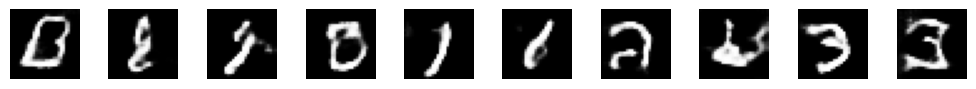

Epoch 4/5, Batch 45, Discriminator Loss: 1.0300134420394897, Generator Loss: 2.433553457260132
Epoch 4/5, Batch 46, Discriminator Loss: 0.8339534997940063, Generator Loss: 0.9253498911857605
Epoch 4/5, Batch 47, Discriminator Loss: 0.9769958257675171, Generator Loss: 2.0755252838134766
Epoch 4/5, Batch 48, Discriminator Loss: 1.0278911590576172, Generator Loss: 0.7853662967681885
Epoch 4/5, Batch 49, Discriminator Loss: 0.854891300201416, Generator Loss: 1.8358391523361206


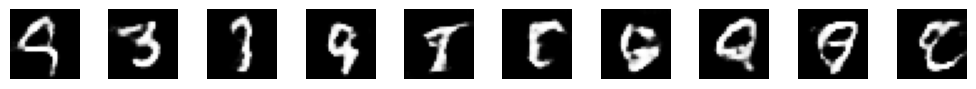

Epoch 4/5, Batch 50, Discriminator Loss: 0.8401157259941101, Generator Loss: 0.9507913589477539
Epoch 4/5, Batch 51, Discriminator Loss: 0.7826833724975586, Generator Loss: 1.964562177658081
Epoch 4/5, Batch 52, Discriminator Loss: 0.755562961101532, Generator Loss: 1.0254473686218262
Epoch 4/5, Batch 53, Discriminator Loss: 0.8889961242675781, Generator Loss: 2.1572678089141846
Epoch 4/5, Batch 54, Discriminator Loss: 0.7631212472915649, Generator Loss: 1.0927313566207886


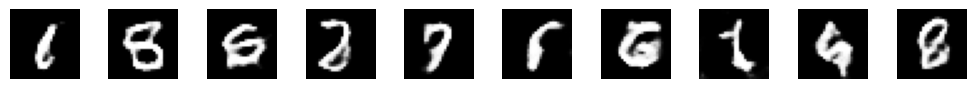

Epoch 4/5, Batch 55, Discriminator Loss: 0.8118590712547302, Generator Loss: 1.9512646198272705
Epoch 4/5, Batch 56, Discriminator Loss: 0.8586804270744324, Generator Loss: 0.8818291425704956
Epoch 4/5, Batch 57, Discriminator Loss: 0.8758847117424011, Generator Loss: 1.903470516204834
Epoch 4/5, Batch 58, Discriminator Loss: 0.702410101890564, Generator Loss: 1.312298059463501
Epoch 4/5, Batch 59, Discriminator Loss: 1.0093886852264404, Generator Loss: 2.348921775817871


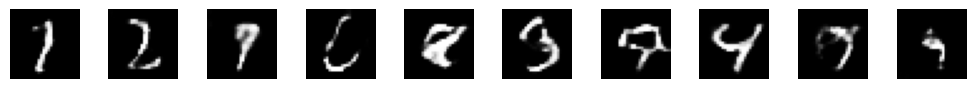

Epoch 4/5, Batch 60, Discriminator Loss: 0.6353136301040649, Generator Loss: 2.383314609527588
Epoch 4/5, Batch 61, Discriminator Loss: 0.8386813402175903, Generator Loss: 0.9880362153053284
Epoch 4/5, Batch 62, Discriminator Loss: 1.0293315649032593, Generator Loss: 2.2642407417297363
Epoch 4/5, Batch 63, Discriminator Loss: 0.8529991507530212, Generator Loss: 0.9965553283691406
Epoch 4/5, Batch 64, Discriminator Loss: 0.9469524621963501, Generator Loss: 1.951184630393982


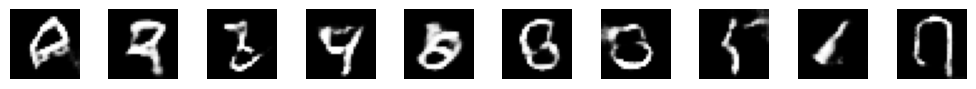

Epoch 4/5, Batch 65, Discriminator Loss: 0.7672184109687805, Generator Loss: 1.1091961860656738
Epoch 4/5, Batch 66, Discriminator Loss: 0.895817756652832, Generator Loss: 1.9320340156555176
Epoch 4/5, Batch 67, Discriminator Loss: 0.8003722429275513, Generator Loss: 1.0392231941223145
Epoch 4/5, Batch 68, Discriminator Loss: 0.9440798759460449, Generator Loss: 2.196901321411133
Epoch 4/5, Batch 69, Discriminator Loss: 0.872282862663269, Generator Loss: 0.8711589574813843


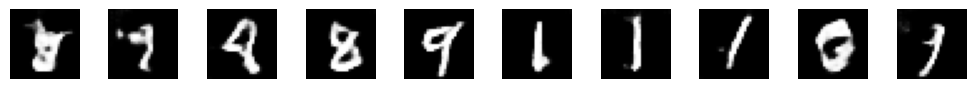

Epoch 4/5, Batch 70, Discriminator Loss: 0.8203370571136475, Generator Loss: 2.016653060913086
Epoch 4/5, Batch 71, Discriminator Loss: 0.7769856452941895, Generator Loss: 1.0090627670288086
Epoch 4/5, Batch 72, Discriminator Loss: 0.9266427159309387, Generator Loss: 1.9824903011322021
Epoch 4/5, Batch 73, Discriminator Loss: 1.011162281036377, Generator Loss: 0.8307916522026062
Epoch 4/5, Batch 74, Discriminator Loss: 0.7773387432098389, Generator Loss: 1.9962931871414185


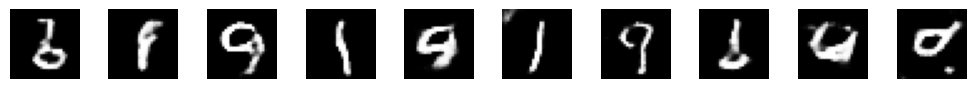

Epoch 4/5, Batch 75, Discriminator Loss: 0.8436086177825928, Generator Loss: 0.8659971952438354
Epoch 4/5, Batch 76, Discriminator Loss: 0.8941670656204224, Generator Loss: 1.9628658294677734
Epoch 4/5, Batch 77, Discriminator Loss: 0.8138864040374756, Generator Loss: 1.1303062438964844
Epoch 4/5, Batch 78, Discriminator Loss: 0.9045242071151733, Generator Loss: 1.9122494459152222
Epoch 4/5, Batch 79, Discriminator Loss: 1.0053012371063232, Generator Loss: 0.7651621699333191


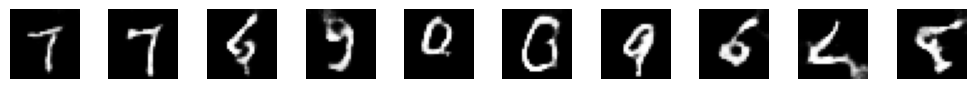

Epoch 4/5, Batch 80, Discriminator Loss: 0.7318940758705139, Generator Loss: 1.7417924404144287
Epoch 4/5, Batch 81, Discriminator Loss: 0.9423805475234985, Generator Loss: 0.9042838215827942
Epoch 4/5, Batch 82, Discriminator Loss: 0.9013822078704834, Generator Loss: 2.304384469985962
Epoch 4/5, Batch 83, Discriminator Loss: 0.904969334602356, Generator Loss: 0.965981662273407
Epoch 4/5, Batch 84, Discriminator Loss: 0.7724116444587708, Generator Loss: 1.7764116525650024


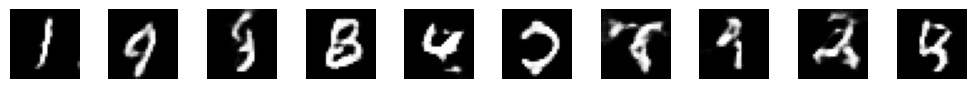

Epoch 4/5, Batch 85, Discriminator Loss: 0.712390661239624, Generator Loss: 1.3108481168746948
Epoch 4/5, Batch 86, Discriminator Loss: 0.9688245058059692, Generator Loss: 2.4445302486419678
Epoch 4/5, Batch 87, Discriminator Loss: 0.7529114484786987, Generator Loss: 0.9742517471313477
Epoch 4/5, Batch 88, Discriminator Loss: 0.9500070810317993, Generator Loss: 2.3451623916625977
Epoch 4/5, Batch 89, Discriminator Loss: 0.5987802147865295, Generator Loss: 1.599001407623291


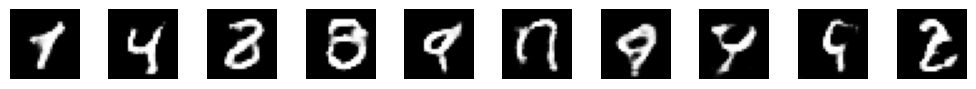

Epoch 4/5, Batch 90, Discriminator Loss: 0.933966338634491, Generator Loss: 2.5116403102874756
Epoch 4/5, Batch 91, Discriminator Loss: 0.8829705715179443, Generator Loss: 0.8927181363105774
Epoch 4/5, Batch 92, Discriminator Loss: 0.8337795734405518, Generator Loss: 1.866508960723877
Epoch 4/5, Batch 93, Discriminator Loss: 0.8291538953781128, Generator Loss: 1.0031144618988037
Epoch 4/5, Batch 94, Discriminator Loss: 0.867743968963623, Generator Loss: 2.0723319053649902


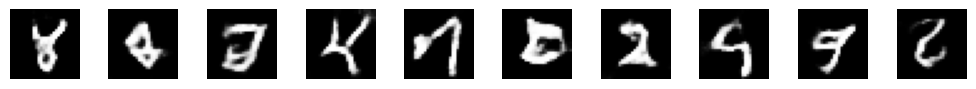

Epoch 4/5, Batch 95, Discriminator Loss: 0.9315067529678345, Generator Loss: 0.8024405837059021
Epoch 4/5, Batch 96, Discriminator Loss: 0.9229234457015991, Generator Loss: 1.9367824792861938
Epoch 4/5, Batch 97, Discriminator Loss: 0.7286714911460876, Generator Loss: 2.183337926864624
Epoch 4/5, Batch 98, Discriminator Loss: 0.8603808879852295, Generator Loss: 0.9323946237564087
Epoch 4/5, Batch 99, Discriminator Loss: 0.9117737412452698, Generator Loss: 2.146094799041748


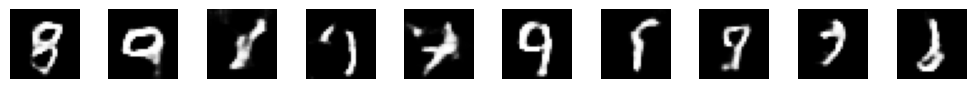

Epoch 4/5, Batch 100, Discriminator Loss: 0.9200954437255859, Generator Loss: 0.814063310623169
Epoch 4/5, Batch 101, Discriminator Loss: 0.9268446564674377, Generator Loss: 2.0054993629455566
Epoch 4/5, Batch 102, Discriminator Loss: 0.7878444194793701, Generator Loss: 0.9682632088661194
Epoch 4/5, Batch 103, Discriminator Loss: 0.7921817302703857, Generator Loss: 1.9517743587493896
Epoch 4/5, Batch 104, Discriminator Loss: 0.6733046174049377, Generator Loss: 1.4388508796691895


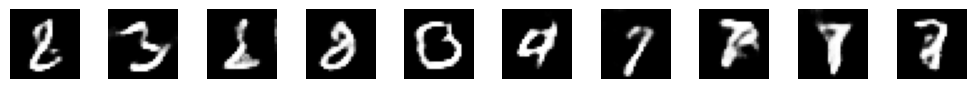

Epoch 4/5, Batch 105, Discriminator Loss: 0.9980693459510803, Generator Loss: 2.440706729888916
Epoch 4/5, Batch 106, Discriminator Loss: 0.7088949680328369, Generator Loss: 2.570112705230713
Epoch 4/5, Batch 107, Discriminator Loss: 1.1785950660705566, Generator Loss: 2.7799179553985596
Epoch 4/5, Batch 108, Discriminator Loss: 0.8209867477416992, Generator Loss: 0.9687315821647644
Epoch 4/5, Batch 109, Discriminator Loss: 0.8797451853752136, Generator Loss: 2.055278778076172


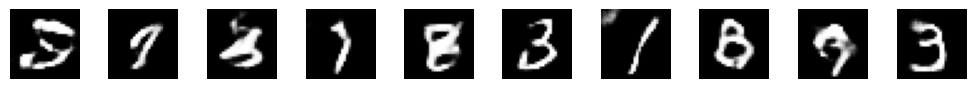

Epoch 4/5, Batch 110, Discriminator Loss: 0.8723502159118652, Generator Loss: 0.9531675577163696
Epoch 4/5, Batch 111, Discriminator Loss: 0.8785915374755859, Generator Loss: 1.8242346048355103
Epoch 4/5, Batch 112, Discriminator Loss: 0.8397418260574341, Generator Loss: 0.9280624389648438
Epoch 4/5, Batch 113, Discriminator Loss: 0.8468749523162842, Generator Loss: 1.9251010417938232
Epoch 4/5, Batch 114, Discriminator Loss: 0.843501091003418, Generator Loss: 0.9549708962440491


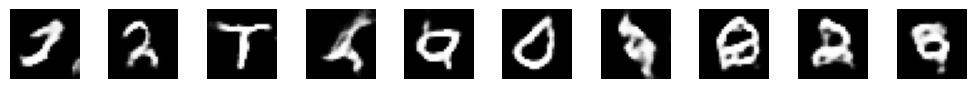

Epoch 4/5, Batch 115, Discriminator Loss: 0.8984081745147705, Generator Loss: 2.156917095184326
Epoch 4/5, Batch 116, Discriminator Loss: 0.7952930927276611, Generator Loss: 0.9847280979156494
Epoch 4/5, Batch 117, Discriminator Loss: 0.8825821876525879, Generator Loss: 2.2619268894195557
Epoch 4/5, Batch 118, Discriminator Loss: 0.749925434589386, Generator Loss: 1.0152263641357422
Epoch 4/5, Batch 119, Discriminator Loss: 0.7432886362075806, Generator Loss: 2.0824363231658936


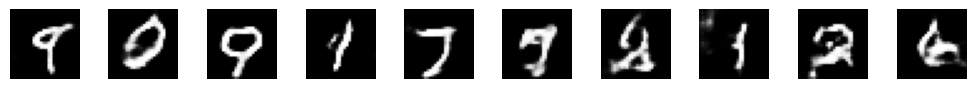

Epoch 4/5, Batch 120, Discriminator Loss: 0.7768591046333313, Generator Loss: 1.0529069900512695
Epoch 4/5, Batch 121, Discriminator Loss: 0.9501494765281677, Generator Loss: 2.2712466716766357
Epoch 4/5, Batch 122, Discriminator Loss: 0.8813591599464417, Generator Loss: 0.9020812511444092
Epoch 4/5, Batch 123, Discriminator Loss: 0.9875998497009277, Generator Loss: 2.1717395782470703
Epoch 4/5, Batch 124, Discriminator Loss: 0.8498407602310181, Generator Loss: 0.9201775789260864


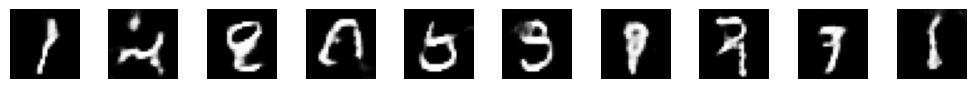

Epoch 4/5, Batch 125, Discriminator Loss: 0.8450942039489746, Generator Loss: 2.078138589859009
Epoch 4/5, Batch 126, Discriminator Loss: 0.8278669714927673, Generator Loss: 1.0191130638122559
Epoch 4/5, Batch 127, Discriminator Loss: 0.9017560482025146, Generator Loss: 2.016052722930908
Epoch 4/5, Batch 128, Discriminator Loss: 0.8491215705871582, Generator Loss: 0.9795024991035461
Epoch 4/5, Batch 129, Discriminator Loss: 1.0162920951843262, Generator Loss: 2.1594128608703613


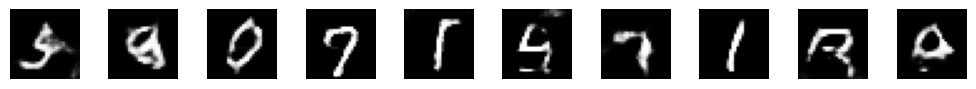

Epoch 4/5, Batch 130, Discriminator Loss: 0.8460971117019653, Generator Loss: 0.8799097537994385
Epoch 4/5, Batch 131, Discriminator Loss: 0.7821817398071289, Generator Loss: 1.8216924667358398
Epoch 4/5, Batch 132, Discriminator Loss: 0.8252506852149963, Generator Loss: 0.9797753095626831
Epoch 4/5, Batch 133, Discriminator Loss: 1.0371887683868408, Generator Loss: 2.3596386909484863
Epoch 4/5, Batch 134, Discriminator Loss: 0.8163338899612427, Generator Loss: 0.9372162818908691


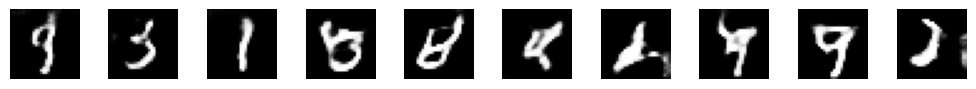

Epoch 4/5, Batch 135, Discriminator Loss: 0.8180598616600037, Generator Loss: 2.2266969680786133
Epoch 4/5, Batch 136, Discriminator Loss: 0.9065925478935242, Generator Loss: 0.8135035634040833
Epoch 4/5, Batch 137, Discriminator Loss: 0.8595966100692749, Generator Loss: 2.020183563232422
Epoch 4/5, Batch 138, Discriminator Loss: 0.813176691532135, Generator Loss: 1.2063255310058594
Epoch 4/5, Batch 139, Discriminator Loss: 0.7599908113479614, Generator Loss: 1.8092408180236816


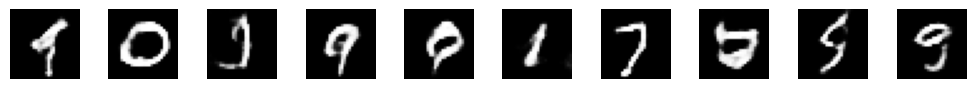

Epoch 4/5, Batch 140, Discriminator Loss: 0.8836697936058044, Generator Loss: 2.1525049209594727
Epoch 4/5, Batch 141, Discriminator Loss: 0.8350880742073059, Generator Loss: 0.9962562322616577
Epoch 4/5, Batch 142, Discriminator Loss: 0.9997133016586304, Generator Loss: 2.3694541454315186
Epoch 4/5, Batch 143, Discriminator Loss: 0.6809169054031372, Generator Loss: 1.4010871648788452
Epoch 4/5, Batch 144, Discriminator Loss: 0.8830785155296326, Generator Loss: 2.4403090476989746


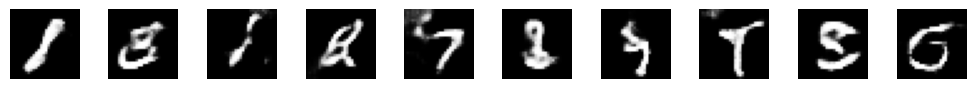

Epoch 4/5, Batch 145, Discriminator Loss: 0.8805025815963745, Generator Loss: 0.8395591378211975
Epoch 4/5, Batch 146, Discriminator Loss: 0.843640923500061, Generator Loss: 2.030820608139038
Epoch 4/5, Batch 147, Discriminator Loss: 0.8633409142494202, Generator Loss: 0.9521165490150452
Epoch 4/5, Batch 148, Discriminator Loss: 0.8073275089263916, Generator Loss: 1.9614877700805664
Epoch 4/5, Batch 149, Discriminator Loss: 0.8446258306503296, Generator Loss: 0.899191677570343


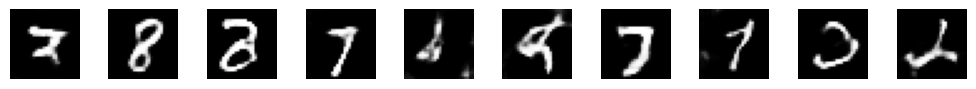

Epoch 4/5, Batch 150, Discriminator Loss: 0.8711409568786621, Generator Loss: 2.0555379390716553
Epoch 4/5, Batch 151, Discriminator Loss: 0.6805675029754639, Generator Loss: 2.6055333614349365
Epoch 4/5, Batch 152, Discriminator Loss: 0.9583781957626343, Generator Loss: 0.8002253770828247
Epoch 4/5, Batch 153, Discriminator Loss: 1.0522723197937012, Generator Loss: 2.039875030517578
Epoch 4/5, Batch 154, Discriminator Loss: 0.7444941997528076, Generator Loss: 1.046094298362732


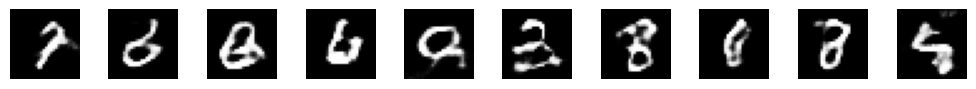

Epoch 4/5, Batch 155, Discriminator Loss: 0.7955083250999451, Generator Loss: 2.15885853767395
Epoch 4/5, Batch 156, Discriminator Loss: 0.6993982791900635, Generator Loss: 1.257804036140442
Epoch 4/5, Batch 157, Discriminator Loss: 1.0530191659927368, Generator Loss: 2.5621464252471924
Epoch 4/5, Batch 158, Discriminator Loss: 0.737676739692688, Generator Loss: 1.1868735551834106
Epoch 4/5, Batch 159, Discriminator Loss: 0.8715781569480896, Generator Loss: 1.8187944889068604


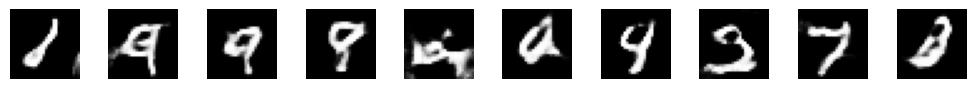

Epoch 4/5, Batch 160, Discriminator Loss: 0.7176134586334229, Generator Loss: 1.290647268295288
Epoch 4/5, Batch 161, Discriminator Loss: 1.0614532232284546, Generator Loss: 2.579092264175415
Epoch 4/5, Batch 162, Discriminator Loss: 0.5929179191589355, Generator Loss: 2.373613119125366
Epoch 4/5, Batch 163, Discriminator Loss: 0.8128358125686646, Generator Loss: 1.9950273036956787
Epoch 4/5, Batch 164, Discriminator Loss: 0.9800049066543579, Generator Loss: 0.7000425457954407


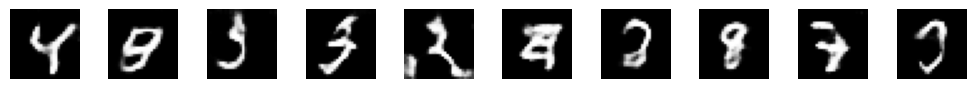

Epoch 4/5, Batch 165, Discriminator Loss: 0.8889554142951965, Generator Loss: 2.095731735229492
Epoch 4/5, Batch 166, Discriminator Loss: 0.8239105939865112, Generator Loss: 1.018823266029358
Epoch 4/5, Batch 167, Discriminator Loss: 0.8130849003791809, Generator Loss: 2.106731414794922
Epoch 4/5, Batch 168, Discriminator Loss: 0.8221180438995361, Generator Loss: 1.0688625574111938
Epoch 4/5, Batch 169, Discriminator Loss: 0.9677804708480835, Generator Loss: 2.045020580291748


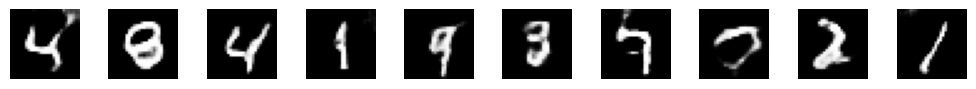

Epoch 4/5, Batch 170, Discriminator Loss: 0.7221186757087708, Generator Loss: 1.9947483539581299
Epoch 4/5, Batch 171, Discriminator Loss: 0.7881524562835693, Generator Loss: 1.0660232305526733
Epoch 4/5, Batch 172, Discriminator Loss: 1.0302245616912842, Generator Loss: 2.1775593757629395
Epoch 4/5, Batch 173, Discriminator Loss: 0.7216432094573975, Generator Loss: 1.1718168258666992
Epoch 4/5, Batch 174, Discriminator Loss: 1.002913475036621, Generator Loss: 2.6929967403411865


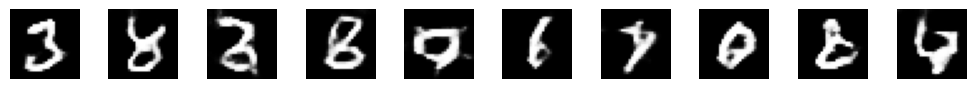

Epoch 4/5, Batch 175, Discriminator Loss: 0.7031832933425903, Generator Loss: 1.3146175146102905
Epoch 4/5, Batch 176, Discriminator Loss: 0.9597570896148682, Generator Loss: 2.4056296348571777
Epoch 4/5, Batch 177, Discriminator Loss: 0.8366250991821289, Generator Loss: 0.903434693813324
Epoch 4/5, Batch 178, Discriminator Loss: 0.9683108329772949, Generator Loss: 2.1721644401550293
Epoch 4/5, Batch 179, Discriminator Loss: 0.8269702196121216, Generator Loss: 0.9679145216941833


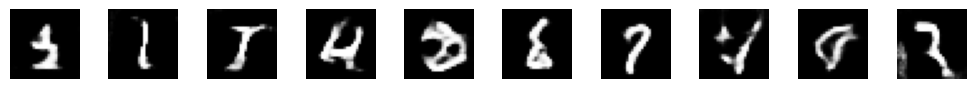

Epoch 4/5, Batch 180, Discriminator Loss: 0.8264183402061462, Generator Loss: 2.0128374099731445
Epoch 4/5, Batch 181, Discriminator Loss: 0.7991921901702881, Generator Loss: 0.9505689144134521
Epoch 4/5, Batch 182, Discriminator Loss: 0.8481405377388, Generator Loss: 1.9973253011703491
Epoch 4/5, Batch 183, Discriminator Loss: 0.8256278038024902, Generator Loss: 1.031585931777954
Epoch 4/5, Batch 184, Discriminator Loss: 0.8645060658454895, Generator Loss: 1.9343583583831787


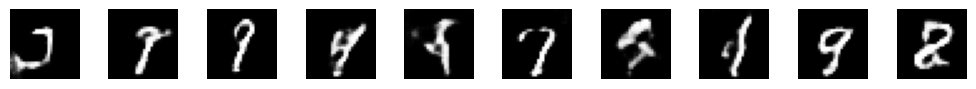

Epoch 4/5, Batch 185, Discriminator Loss: 0.9376868009567261, Generator Loss: 0.7470645904541016
Epoch 4/5, Batch 186, Discriminator Loss: 0.8137321472167969, Generator Loss: 1.8918678760528564
Epoch 4/5, Batch 187, Discriminator Loss: 0.8336563110351562, Generator Loss: 0.9931947588920593
Epoch 4/5, Batch 188, Discriminator Loss: 0.8205239176750183, Generator Loss: 2.051222562789917
Epoch 4/5, Batch 189, Discriminator Loss: 1.0110535621643066, Generator Loss: 0.8412315249443054


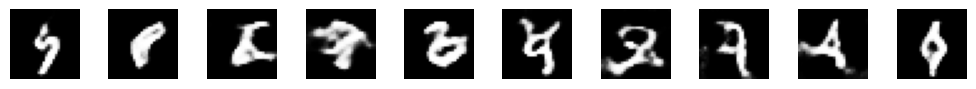

Epoch 4/5, Batch 190, Discriminator Loss: 0.7184877991676331, Generator Loss: 2.0129892826080322
Epoch 4/5, Batch 191, Discriminator Loss: 0.9018601179122925, Generator Loss: 0.8140920400619507
Epoch 4/5, Batch 192, Discriminator Loss: 0.9451354742050171, Generator Loss: 2.119330406188965
Epoch 4/5, Batch 193, Discriminator Loss: 0.8469456434249878, Generator Loss: 0.9730298519134521
Epoch 4/5, Batch 194, Discriminator Loss: 0.8795414566993713, Generator Loss: 2.1509408950805664


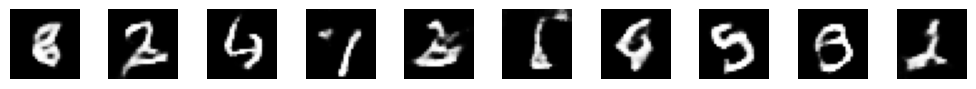

Epoch 4/5, Batch 195, Discriminator Loss: 0.7880800366401672, Generator Loss: 1.0271003246307373
Epoch 4/5, Batch 196, Discriminator Loss: 0.8827661275863647, Generator Loss: 2.119943141937256
Epoch 4/5, Batch 197, Discriminator Loss: 0.6542179584503174, Generator Loss: 1.7796915769577026
Epoch 4/5, Batch 198, Discriminator Loss: 0.7060733437538147, Generator Loss: 1.3302265405654907
Epoch 4/5, Batch 199, Discriminator Loss: 0.7486826181411743, Generator Loss: 1.961702823638916


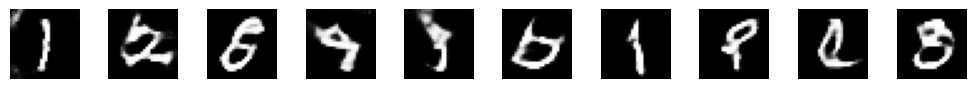

Epoch 4/5, Batch 200, Discriminator Loss: 1.0028953552246094, Generator Loss: 0.7293462753295898
Epoch 4/5, Batch 201, Discriminator Loss: 0.9840530753135681, Generator Loss: 2.2657358646392822
Epoch 4/5, Batch 202, Discriminator Loss: 0.7079570293426514, Generator Loss: 1.3145878314971924
Epoch 4/5, Batch 203, Discriminator Loss: 0.8457151651382446, Generator Loss: 2.2918567657470703
Epoch 4/5, Batch 204, Discriminator Loss: 1.0371809005737305, Generator Loss: 0.721685528755188


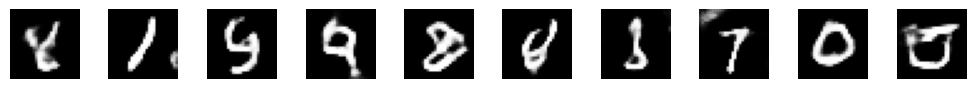

Epoch 4/5, Batch 205, Discriminator Loss: 0.8420879244804382, Generator Loss: 1.9156445264816284
Epoch 4/5, Batch 206, Discriminator Loss: 0.8640924096107483, Generator Loss: 0.8932932019233704
Epoch 4/5, Batch 207, Discriminator Loss: 0.8788465261459351, Generator Loss: 2.1315207481384277
Epoch 4/5, Batch 208, Discriminator Loss: 0.7698427438735962, Generator Loss: 1.0413463115692139
Epoch 4/5, Batch 209, Discriminator Loss: 0.9394367933273315, Generator Loss: 2.202272891998291


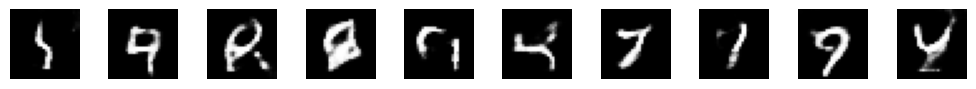

Epoch 4/5, Batch 210, Discriminator Loss: 0.7867915034294128, Generator Loss: 0.9554767608642578
Epoch 4/5, Batch 211, Discriminator Loss: 0.8758174180984497, Generator Loss: 2.1336302757263184
Epoch 4/5, Batch 212, Discriminator Loss: 0.8104817867279053, Generator Loss: 1.0117096900939941
Epoch 4/5, Batch 213, Discriminator Loss: 0.894793689250946, Generator Loss: 2.1393625736236572
Epoch 4/5, Batch 214, Discriminator Loss: 0.7758275866508484, Generator Loss: 1.1353894472122192


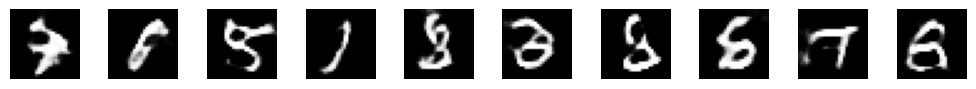

Epoch 4/5, Batch 215, Discriminator Loss: 0.8451484441757202, Generator Loss: 1.721573829650879
Epoch 4/5, Batch 216, Discriminator Loss: 0.7493575215339661, Generator Loss: 2.0323469638824463
Epoch 4/5, Batch 217, Discriminator Loss: 0.6706461906433105, Generator Loss: 1.3880739212036133
Epoch 4/5, Batch 218, Discriminator Loss: 1.061254858970642, Generator Loss: 2.7320289611816406
Epoch 4/5, Batch 219, Discriminator Loss: 0.8033732175827026, Generator Loss: 0.952892541885376


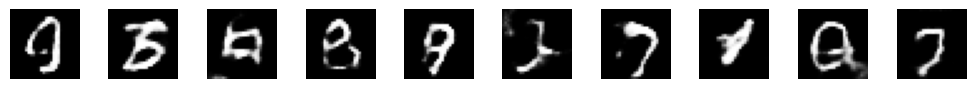

Epoch 4/5, Batch 220, Discriminator Loss: 0.9173611402511597, Generator Loss: 2.0254507064819336
Epoch 4/5, Batch 221, Discriminator Loss: 0.8366470336914062, Generator Loss: 0.9748433828353882
Epoch 4/5, Batch 222, Discriminator Loss: 0.8755810260772705, Generator Loss: 1.9627091884613037
Epoch 4/5, Batch 223, Discriminator Loss: 0.8758952617645264, Generator Loss: 0.8556566834449768
Epoch 4/5, Batch 224, Discriminator Loss: 0.8046285510063171, Generator Loss: 2.0080394744873047


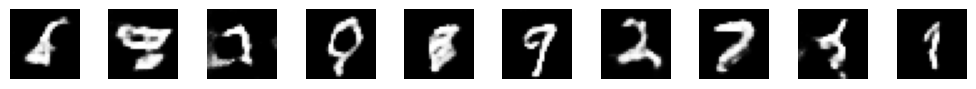

Epoch 4/5, Batch 225, Discriminator Loss: 0.8634185791015625, Generator Loss: 1.0975487232208252
Epoch 4/5, Batch 226, Discriminator Loss: 0.8339008092880249, Generator Loss: 2.037821054458618
Epoch 4/5, Batch 227, Discriminator Loss: 0.8950252532958984, Generator Loss: 0.8835052847862244
Epoch 4/5, Batch 228, Discriminator Loss: 1.0044811964035034, Generator Loss: 2.2123770713806152
Epoch 4/5, Batch 229, Discriminator Loss: 0.6475496888160706, Generator Loss: 1.4250710010528564


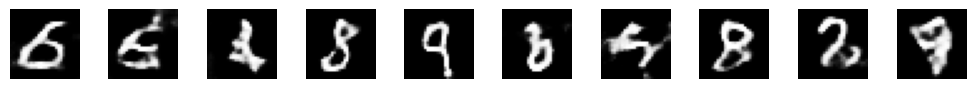

Epoch 4/5, Batch 230, Discriminator Loss: 1.095112919807434, Generator Loss: 2.6712992191314697
Epoch 4/5, Batch 231, Discriminator Loss: 0.8392122983932495, Generator Loss: 0.9314245581626892
Epoch 4/5, Batch 232, Discriminator Loss: 0.789099931716919, Generator Loss: 2.0614254474639893
Epoch 4/5, Batch 233, Discriminator Loss: 0.8231471180915833, Generator Loss: 0.9280387759208679
Epoch 4/5, Batch 234, Discriminator Loss: 0.7275528907775879, Generator Loss: 2.3118066787719727


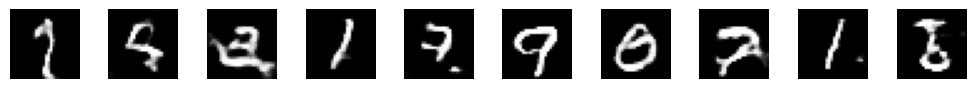

End of epoch 4, Discriminator Loss: 0.7275528907775879, Generator Loss: 2.3118066787719727
Epoch 5/5, Batch 0, Discriminator Loss: 0.813156247138977, Generator Loss: 1.1649284362792969
Epoch 5/5, Batch 1, Discriminator Loss: 0.8294537663459778, Generator Loss: 2.104323148727417
Epoch 5/5, Batch 2, Discriminator Loss: 0.9360007643699646, Generator Loss: 0.7786226272583008
Epoch 5/5, Batch 3, Discriminator Loss: 0.9058316946029663, Generator Loss: 2.3912525177001953
Epoch 5/5, Batch 4, Discriminator Loss: 0.7203172445297241, Generator Loss: 1.272189974784851


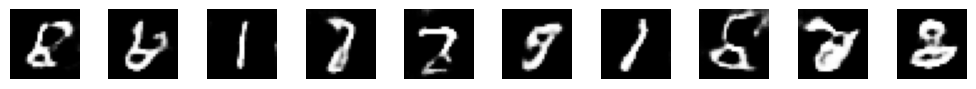

Epoch 5/5, Batch 5, Discriminator Loss: 0.7082391977310181, Generator Loss: 1.7577682733535767
Epoch 5/5, Batch 6, Discriminator Loss: 0.8800041675567627, Generator Loss: 0.9838612079620361
Epoch 5/5, Batch 7, Discriminator Loss: 1.0594933032989502, Generator Loss: 2.4513449668884277
Epoch 5/5, Batch 8, Discriminator Loss: 0.6985926032066345, Generator Loss: 1.156132459640503
Epoch 5/5, Batch 9, Discriminator Loss: 0.7946158647537231, Generator Loss: 2.2033164501190186


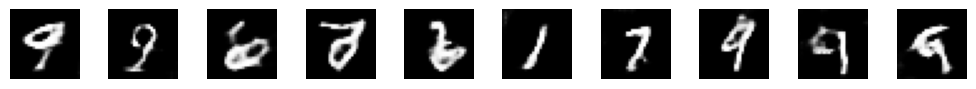

Epoch 5/5, Batch 10, Discriminator Loss: 0.7370348572731018, Generator Loss: 1.1777361631393433
Epoch 5/5, Batch 11, Discriminator Loss: 0.9751372337341309, Generator Loss: 2.526874542236328
Epoch 5/5, Batch 12, Discriminator Loss: 0.5971014499664307, Generator Loss: 1.564455509185791
Epoch 5/5, Batch 13, Discriminator Loss: 0.7050181031227112, Generator Loss: 1.9127709865570068
Epoch 5/5, Batch 14, Discriminator Loss: 0.9753251671791077, Generator Loss: 0.836311936378479


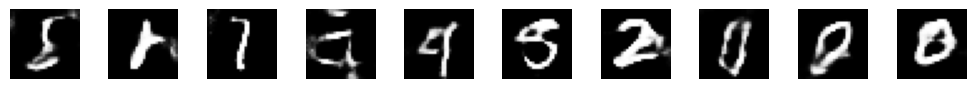

Epoch 5/5, Batch 15, Discriminator Loss: 0.8756674528121948, Generator Loss: 2.139650821685791
Epoch 5/5, Batch 16, Discriminator Loss: 0.7440133690834045, Generator Loss: 1.2352890968322754
Epoch 5/5, Batch 17, Discriminator Loss: 0.9890249371528625, Generator Loss: 2.5553855895996094
Epoch 5/5, Batch 18, Discriminator Loss: 0.8109627366065979, Generator Loss: 0.9467899799346924
Epoch 5/5, Batch 19, Discriminator Loss: 0.8267683386802673, Generator Loss: 2.0926575660705566


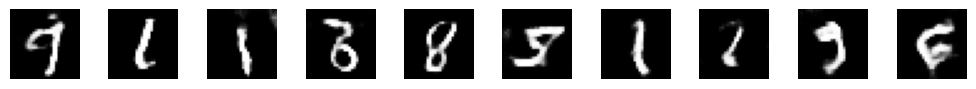

Epoch 5/5, Batch 20, Discriminator Loss: 0.8399840593338013, Generator Loss: 1.0250271558761597
Epoch 5/5, Batch 21, Discriminator Loss: 0.7457208633422852, Generator Loss: 2.1652939319610596
Epoch 5/5, Batch 22, Discriminator Loss: 0.8161910176277161, Generator Loss: 1.0127350091934204
Epoch 5/5, Batch 23, Discriminator Loss: 0.9832161664962769, Generator Loss: 2.196049213409424
Epoch 5/5, Batch 24, Discriminator Loss: 0.6723317503929138, Generator Loss: 1.3636317253112793


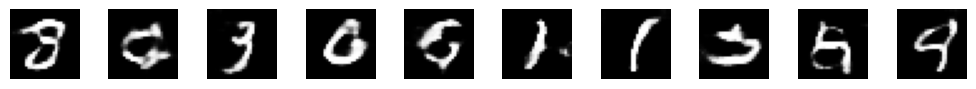

Epoch 5/5, Batch 25, Discriminator Loss: 0.9676358699798584, Generator Loss: 2.502488374710083
Epoch 5/5, Batch 26, Discriminator Loss: 0.7922340631484985, Generator Loss: 0.9487276077270508
Epoch 5/5, Batch 27, Discriminator Loss: 0.7624069452285767, Generator Loss: 1.8646522760391235
Epoch 5/5, Batch 28, Discriminator Loss: 0.8868477940559387, Generator Loss: 0.9180328845977783
Epoch 5/5, Batch 29, Discriminator Loss: 0.9787843227386475, Generator Loss: 2.3207690715789795


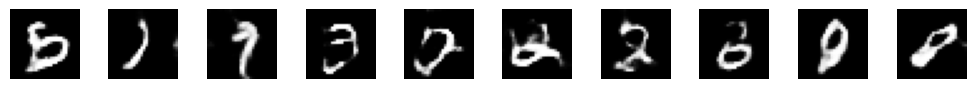

Epoch 5/5, Batch 30, Discriminator Loss: 0.818523108959198, Generator Loss: 1.056557059288025
Epoch 5/5, Batch 31, Discriminator Loss: 0.7455486059188843, Generator Loss: 1.8010741472244263
Epoch 5/5, Batch 32, Discriminator Loss: 1.047458291053772, Generator Loss: 0.8228543400764465
Epoch 5/5, Batch 33, Discriminator Loss: 0.8595234751701355, Generator Loss: 2.1570627689361572
Epoch 5/5, Batch 34, Discriminator Loss: 0.8350857496261597, Generator Loss: 0.9320954084396362


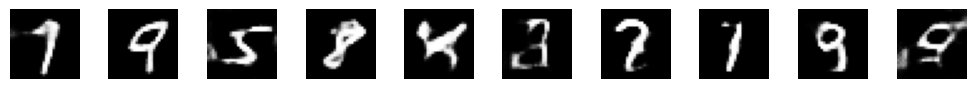

Epoch 5/5, Batch 35, Discriminator Loss: 0.9008790850639343, Generator Loss: 2.2817108631134033
Epoch 5/5, Batch 36, Discriminator Loss: 0.7796834707260132, Generator Loss: 0.9658953547477722
Epoch 5/5, Batch 37, Discriminator Loss: 0.7416282892227173, Generator Loss: 1.997159481048584
Epoch 5/5, Batch 38, Discriminator Loss: 0.917653501033783, Generator Loss: 2.429588556289673
Epoch 5/5, Batch 39, Discriminator Loss: 0.6797806024551392, Generator Loss: 2.4292984008789062


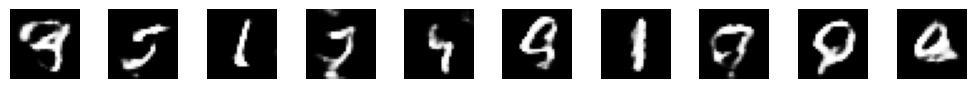

Epoch 5/5, Batch 40, Discriminator Loss: 0.9652360081672668, Generator Loss: 0.8009955883026123
Epoch 5/5, Batch 41, Discriminator Loss: 0.9895411729812622, Generator Loss: 2.3869712352752686
Epoch 5/5, Batch 42, Discriminator Loss: 0.8304513096809387, Generator Loss: 0.9825980067253113
Epoch 5/5, Batch 43, Discriminator Loss: 0.9366058111190796, Generator Loss: 2.04179048538208
Epoch 5/5, Batch 44, Discriminator Loss: 0.9288334846496582, Generator Loss: 0.8358675837516785


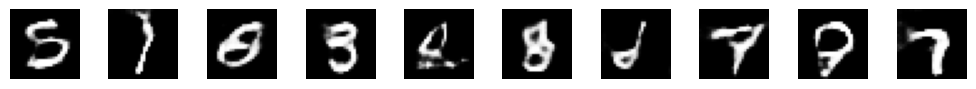

Epoch 5/5, Batch 45, Discriminator Loss: 0.8799723386764526, Generator Loss: 2.012709140777588
Epoch 5/5, Batch 46, Discriminator Loss: 0.7948667407035828, Generator Loss: 1.0329468250274658
Epoch 5/5, Batch 47, Discriminator Loss: 0.8239731192588806, Generator Loss: 2.0517117977142334
Epoch 5/5, Batch 48, Discriminator Loss: 0.7956953048706055, Generator Loss: 1.0039806365966797
Epoch 5/5, Batch 49, Discriminator Loss: 0.9201767444610596, Generator Loss: 2.375767230987549


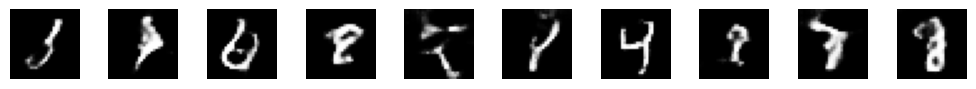

Epoch 5/5, Batch 50, Discriminator Loss: 0.8129597306251526, Generator Loss: 2.5352718830108643
Epoch 5/5, Batch 51, Discriminator Loss: 0.6865977048873901, Generator Loss: 1.6783385276794434
Epoch 5/5, Batch 52, Discriminator Loss: 0.6558581590652466, Generator Loss: 1.427950143814087
Epoch 5/5, Batch 53, Discriminator Loss: 1.1700118780136108, Generator Loss: 2.8268702030181885
Epoch 5/5, Batch 54, Discriminator Loss: 0.8444446921348572, Generator Loss: 0.9492180943489075


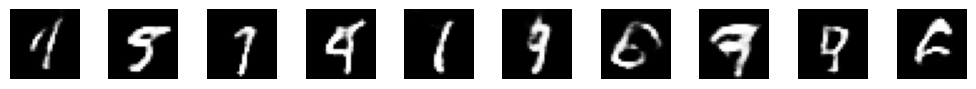

Epoch 5/5, Batch 55, Discriminator Loss: 0.7679803371429443, Generator Loss: 1.766527771949768
Epoch 5/5, Batch 56, Discriminator Loss: 0.7365823984146118, Generator Loss: 1.656099557876587
Epoch 5/5, Batch 57, Discriminator Loss: 0.9001215696334839, Generator Loss: 0.8395501375198364
Epoch 5/5, Batch 58, Discriminator Loss: 0.9178341627120972, Generator Loss: 2.161308765411377
Epoch 5/5, Batch 59, Discriminator Loss: 0.8813390731811523, Generator Loss: 0.8882456421852112


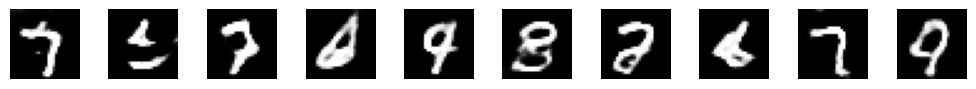

Epoch 5/5, Batch 60, Discriminator Loss: 0.949638843536377, Generator Loss: 2.344313859939575
Epoch 5/5, Batch 61, Discriminator Loss: 0.7041953206062317, Generator Loss: 1.2295290231704712
Epoch 5/5, Batch 62, Discriminator Loss: 1.0096129179000854, Generator Loss: 2.5439586639404297
Epoch 5/5, Batch 63, Discriminator Loss: 0.738075852394104, Generator Loss: 2.4668681621551514
Epoch 5/5, Batch 64, Discriminator Loss: 0.8444909453392029, Generator Loss: 0.897546648979187


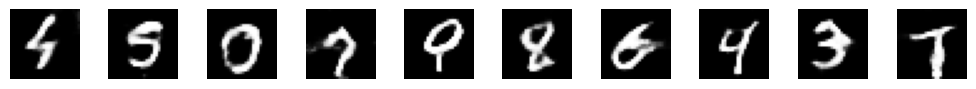

Epoch 5/5, Batch 65, Discriminator Loss: 1.006897211074829, Generator Loss: 2.5884010791778564
Epoch 5/5, Batch 66, Discriminator Loss: 0.8201726675033569, Generator Loss: 0.9885228872299194
Epoch 5/5, Batch 67, Discriminator Loss: 0.8176121711730957, Generator Loss: 2.1461451053619385
Epoch 5/5, Batch 68, Discriminator Loss: 0.8195949196815491, Generator Loss: 1.0108373165130615
Epoch 5/5, Batch 69, Discriminator Loss: 0.7912333011627197, Generator Loss: 2.1230061054229736


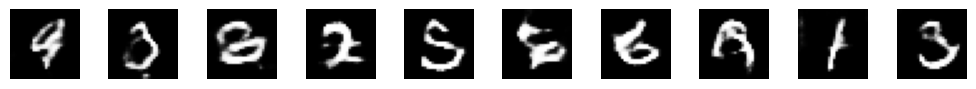

Epoch 5/5, Batch 70, Discriminator Loss: 0.7861194014549255, Generator Loss: 1.0021841526031494
Epoch 5/5, Batch 71, Discriminator Loss: 0.8958954215049744, Generator Loss: 2.2991678714752197
Epoch 5/5, Batch 72, Discriminator Loss: 0.7921580076217651, Generator Loss: 1.018338918685913
Epoch 5/5, Batch 73, Discriminator Loss: 0.8613892793655396, Generator Loss: 2.181889772415161
Epoch 5/5, Batch 74, Discriminator Loss: 0.9129530191421509, Generator Loss: 0.8264482617378235


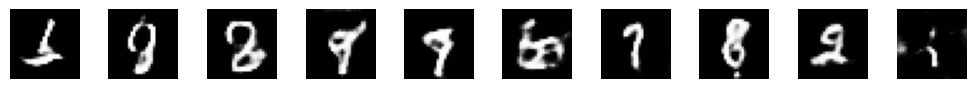

Epoch 5/5, Batch 75, Discriminator Loss: 0.8595031499862671, Generator Loss: 1.8078875541687012
Epoch 5/5, Batch 76, Discriminator Loss: 1.0120465755462646, Generator Loss: 2.511009693145752
Epoch 5/5, Batch 77, Discriminator Loss: 0.6994592547416687, Generator Loss: 1.6361833810806274
Epoch 5/5, Batch 78, Discriminator Loss: 0.78196120262146, Generator Loss: 1.0856143236160278
Epoch 5/5, Batch 79, Discriminator Loss: 0.9155105948448181, Generator Loss: 2.5417487621307373


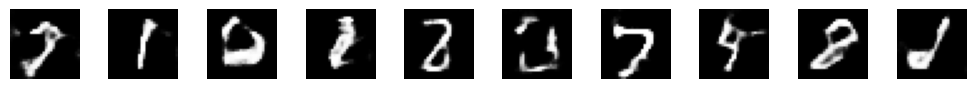

Epoch 5/5, Batch 80, Discriminator Loss: 0.8606923818588257, Generator Loss: 0.9998177886009216
Epoch 5/5, Batch 81, Discriminator Loss: 0.8150078058242798, Generator Loss: 2.1714301109313965
Epoch 5/5, Batch 82, Discriminator Loss: 0.7044017314910889, Generator Loss: 1.2621723413467407
Epoch 5/5, Batch 83, Discriminator Loss: 0.9565524458885193, Generator Loss: 2.4576737880706787
Epoch 5/5, Batch 84, Discriminator Loss: 0.9396169185638428, Generator Loss: 0.8077050447463989


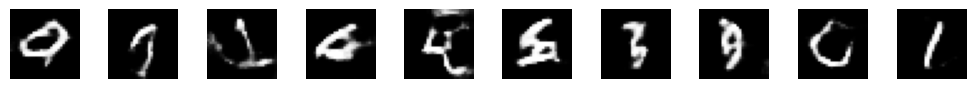

Epoch 5/5, Batch 85, Discriminator Loss: 0.716668963432312, Generator Loss: 2.1402833461761475
Epoch 5/5, Batch 86, Discriminator Loss: 0.8031043410301208, Generator Loss: 1.1675642728805542
Epoch 5/5, Batch 87, Discriminator Loss: 0.8720648288726807, Generator Loss: 2.40869402885437
Epoch 5/5, Batch 88, Discriminator Loss: 0.7732611298561096, Generator Loss: 1.0177903175354004
Epoch 5/5, Batch 89, Discriminator Loss: 0.9422657489776611, Generator Loss: 2.1616270542144775


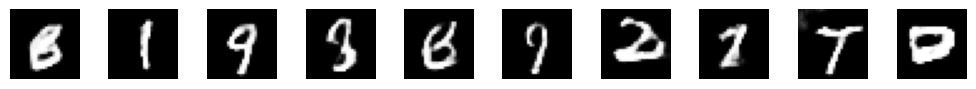

Epoch 5/5, Batch 90, Discriminator Loss: 0.739745557308197, Generator Loss: 1.1012221574783325
Epoch 5/5, Batch 91, Discriminator Loss: 1.018368124961853, Generator Loss: 2.593958854675293
Epoch 5/5, Batch 92, Discriminator Loss: 0.6598811149597168, Generator Loss: 2.57869553565979
Epoch 5/5, Batch 93, Discriminator Loss: 0.7303869128227234, Generator Loss: 1.5572600364685059
Epoch 5/5, Batch 94, Discriminator Loss: 0.8532043099403381, Generator Loss: 0.9180251359939575


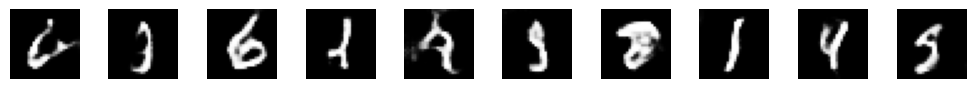

Epoch 5/5, Batch 95, Discriminator Loss: 1.1963071823120117, Generator Loss: 2.477637529373169
Epoch 5/5, Batch 96, Discriminator Loss: 0.7569867372512817, Generator Loss: 2.6529572010040283
Epoch 5/5, Batch 97, Discriminator Loss: 0.8122975826263428, Generator Loss: 0.9355059862136841
Epoch 5/5, Batch 98, Discriminator Loss: 0.9758011698722839, Generator Loss: 2.4395105838775635
Epoch 5/5, Batch 99, Discriminator Loss: 0.764614462852478, Generator Loss: 1.0194954872131348


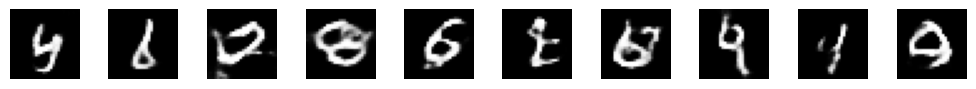

Epoch 5/5, Batch 100, Discriminator Loss: 0.7990862131118774, Generator Loss: 1.9346979856491089
Epoch 5/5, Batch 101, Discriminator Loss: 0.9953853487968445, Generator Loss: 0.7436429858207703
Epoch 5/5, Batch 102, Discriminator Loss: 0.7958976626396179, Generator Loss: 2.019669771194458
Epoch 5/5, Batch 103, Discriminator Loss: 0.8265560865402222, Generator Loss: 1.0128999948501587
Epoch 5/5, Batch 104, Discriminator Loss: 0.9578185677528381, Generator Loss: 2.2188687324523926


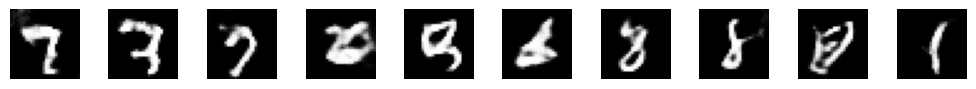

Epoch 5/5, Batch 105, Discriminator Loss: 0.7414342761039734, Generator Loss: 1.1300427913665771
Epoch 5/5, Batch 106, Discriminator Loss: 0.8503547310829163, Generator Loss: 2.1937100887298584
Epoch 5/5, Batch 107, Discriminator Loss: 0.6865368485450745, Generator Loss: 1.2950406074523926
Epoch 5/5, Batch 108, Discriminator Loss: 0.7396763563156128, Generator Loss: 1.7717660665512085
Epoch 5/5, Batch 109, Discriminator Loss: 0.8861602544784546, Generator Loss: 0.8768580555915833


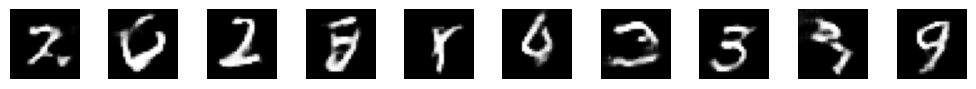

Epoch 5/5, Batch 110, Discriminator Loss: 0.7580184936523438, Generator Loss: 2.1945908069610596
Epoch 5/5, Batch 111, Discriminator Loss: 0.8229696750640869, Generator Loss: 0.9624946117401123
Epoch 5/5, Batch 112, Discriminator Loss: 0.7950742244720459, Generator Loss: 2.2142703533172607
Epoch 5/5, Batch 113, Discriminator Loss: 0.7645533084869385, Generator Loss: 1.1110703945159912
Epoch 5/5, Batch 114, Discriminator Loss: 0.8148342370986938, Generator Loss: 2.1165452003479004


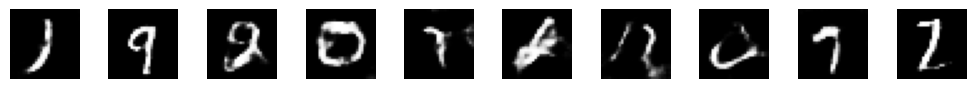

Epoch 5/5, Batch 115, Discriminator Loss: 0.8314093947410583, Generator Loss: 0.9081053733825684
Epoch 5/5, Batch 116, Discriminator Loss: 1.02341628074646, Generator Loss: 2.2266764640808105
Epoch 5/5, Batch 117, Discriminator Loss: 0.8299845457077026, Generator Loss: 0.8994748592376709
Epoch 5/5, Batch 118, Discriminator Loss: 0.7324565649032593, Generator Loss: 2.169886589050293
Epoch 5/5, Batch 119, Discriminator Loss: 0.771189272403717, Generator Loss: 1.0336244106292725


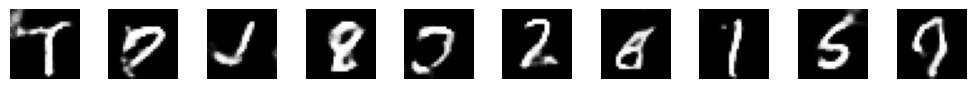

Epoch 5/5, Batch 120, Discriminator Loss: 0.8690921068191528, Generator Loss: 2.104288339614868
Epoch 5/5, Batch 121, Discriminator Loss: 0.826586902141571, Generator Loss: 0.9670500159263611
Epoch 5/5, Batch 122, Discriminator Loss: 0.8553369045257568, Generator Loss: 2.199336290359497
Epoch 5/5, Batch 123, Discriminator Loss: 0.7406008243560791, Generator Loss: 1.1162593364715576
Epoch 5/5, Batch 124, Discriminator Loss: 0.8936338424682617, Generator Loss: 2.468942642211914


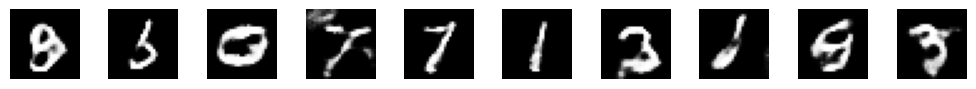

Epoch 5/5, Batch 125, Discriminator Loss: 0.7658694982528687, Generator Loss: 1.0441327095031738
Epoch 5/5, Batch 126, Discriminator Loss: 0.8217970728874207, Generator Loss: 2.3015363216400146
Epoch 5/5, Batch 127, Discriminator Loss: 0.6673169732093811, Generator Loss: 1.287912368774414
Epoch 5/5, Batch 128, Discriminator Loss: 0.9234985709190369, Generator Loss: 2.252692461013794
Epoch 5/5, Batch 129, Discriminator Loss: 0.7692161798477173, Generator Loss: 1.0657432079315186


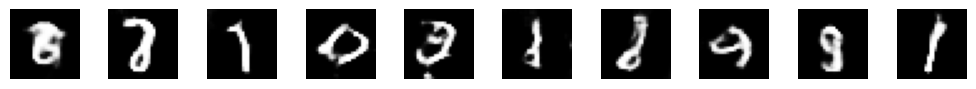

Epoch 5/5, Batch 130, Discriminator Loss: 1.199031114578247, Generator Loss: 2.831366539001465
Epoch 5/5, Batch 131, Discriminator Loss: 0.6335536241531372, Generator Loss: 2.488887310028076
Epoch 5/5, Batch 132, Discriminator Loss: 0.67779541015625, Generator Loss: 1.6404310464859009
Epoch 5/5, Batch 133, Discriminator Loss: 0.6683378219604492, Generator Loss: 1.4837274551391602
Epoch 5/5, Batch 134, Discriminator Loss: 0.796326756477356, Generator Loss: 2.0111284255981445


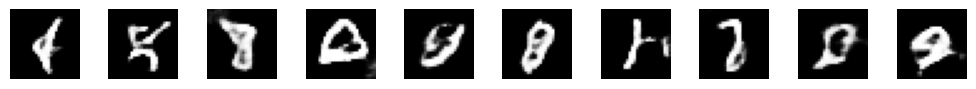

Epoch 5/5, Batch 135, Discriminator Loss: 0.8390204906463623, Generator Loss: 0.96380615234375
Epoch 5/5, Batch 136, Discriminator Loss: 0.852832555770874, Generator Loss: 2.1837196350097656
Epoch 5/5, Batch 137, Discriminator Loss: 0.7914866209030151, Generator Loss: 1.0542957782745361
Epoch 5/5, Batch 138, Discriminator Loss: 0.8844197392463684, Generator Loss: 2.0727405548095703
Epoch 5/5, Batch 139, Discriminator Loss: 0.7955268621444702, Generator Loss: 1.0110530853271484


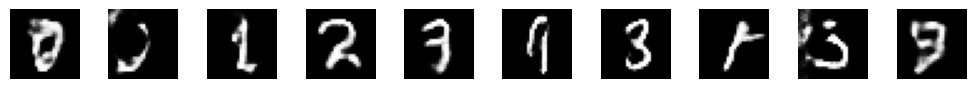

Epoch 5/5, Batch 140, Discriminator Loss: 0.7597383260726929, Generator Loss: 2.1943249702453613
Epoch 5/5, Batch 141, Discriminator Loss: 0.8242075443267822, Generator Loss: 1.0061017274856567
Epoch 5/5, Batch 142, Discriminator Loss: 0.8358587622642517, Generator Loss: 2.2549588680267334
Epoch 5/5, Batch 143, Discriminator Loss: 0.7826205492019653, Generator Loss: 1.060075044631958
Epoch 5/5, Batch 144, Discriminator Loss: 0.8400591015815735, Generator Loss: 1.9525096416473389


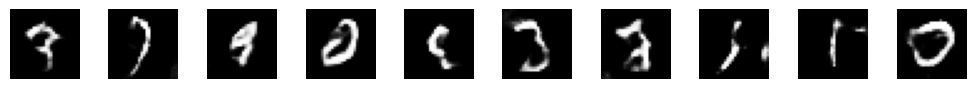

Epoch 5/5, Batch 145, Discriminator Loss: 0.7328112721443176, Generator Loss: 2.0619077682495117
Epoch 5/5, Batch 146, Discriminator Loss: 0.7375326156616211, Generator Loss: 1.1817443370819092
Epoch 5/5, Batch 147, Discriminator Loss: 0.8821208477020264, Generator Loss: 2.349501848220825
Epoch 5/5, Batch 148, Discriminator Loss: 0.8434876203536987, Generator Loss: 0.9250074625015259
Epoch 5/5, Batch 149, Discriminator Loss: 0.9324334859848022, Generator Loss: 2.554781913757324


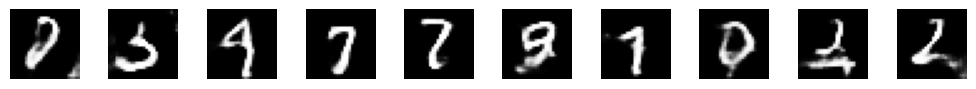

Epoch 5/5, Batch 150, Discriminator Loss: 0.6946805715560913, Generator Loss: 1.3231487274169922
Epoch 5/5, Batch 151, Discriminator Loss: 0.8948092460632324, Generator Loss: 2.5460238456726074
Epoch 5/5, Batch 152, Discriminator Loss: 0.7421456575393677, Generator Loss: 1.1585676670074463
Epoch 5/5, Batch 153, Discriminator Loss: 1.1378824710845947, Generator Loss: 2.6915364265441895
Epoch 5/5, Batch 154, Discriminator Loss: 0.825753927230835, Generator Loss: 0.9365586638450623


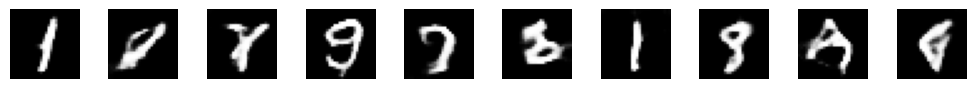

Epoch 5/5, Batch 155, Discriminator Loss: 0.8412469625473022, Generator Loss: 2.032463550567627
Epoch 5/5, Batch 156, Discriminator Loss: 0.6860641837120056, Generator Loss: 1.548464059829712
Epoch 5/5, Batch 157, Discriminator Loss: 0.6120797395706177, Generator Loss: 1.794007658958435
Epoch 5/5, Batch 158, Discriminator Loss: 0.8368164300918579, Generator Loss: 1.1400742530822754
Epoch 5/5, Batch 159, Discriminator Loss: 1.130966067314148, Generator Loss: 2.625133514404297


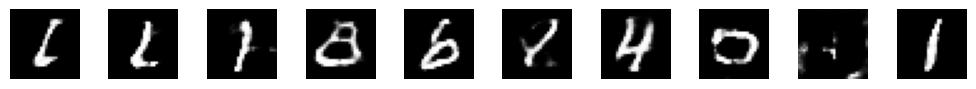

Epoch 5/5, Batch 160, Discriminator Loss: 0.6455551385879517, Generator Loss: 1.334872841835022
Epoch 5/5, Batch 161, Discriminator Loss: 0.8037091493606567, Generator Loss: 2.321428060531616
Epoch 5/5, Batch 162, Discriminator Loss: 0.9316900372505188, Generator Loss: 0.8503797650337219
Epoch 5/5, Batch 163, Discriminator Loss: 0.758246123790741, Generator Loss: 1.9597378969192505
Epoch 5/5, Batch 164, Discriminator Loss: 0.8715652227401733, Generator Loss: 0.8732682466506958


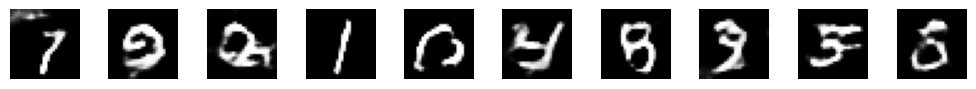

Epoch 5/5, Batch 165, Discriminator Loss: 0.8131062388420105, Generator Loss: 2.160078525543213
Epoch 5/5, Batch 166, Discriminator Loss: 0.8884145021438599, Generator Loss: 0.920573353767395
Epoch 5/5, Batch 167, Discriminator Loss: 0.7745423913002014, Generator Loss: 2.1108155250549316
Epoch 5/5, Batch 168, Discriminator Loss: 0.8680654764175415, Generator Loss: 0.928941011428833
Epoch 5/5, Batch 169, Discriminator Loss: 0.7927522659301758, Generator Loss: 2.2863972187042236


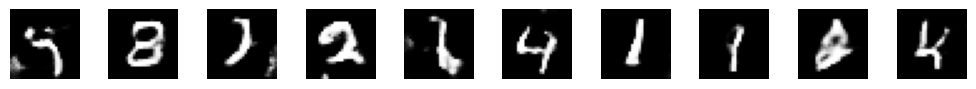

Epoch 5/5, Batch 170, Discriminator Loss: 0.6355358362197876, Generator Loss: 1.3423104286193848
Epoch 5/5, Batch 171, Discriminator Loss: 0.9992019534111023, Generator Loss: 2.435227870941162
Epoch 5/5, Batch 172, Discriminator Loss: 0.6164756417274475, Generator Loss: 1.5547821521759033
Epoch 5/5, Batch 173, Discriminator Loss: 0.806611955165863, Generator Loss: 1.1087002754211426
Epoch 5/5, Batch 174, Discriminator Loss: 0.875796914100647, Generator Loss: 2.563276767730713


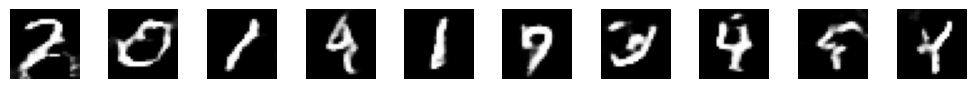

Epoch 5/5, Batch 175, Discriminator Loss: 0.8184814453125, Generator Loss: 0.9529934525489807
Epoch 5/5, Batch 176, Discriminator Loss: 0.8159451484680176, Generator Loss: 2.2004642486572266
Epoch 5/5, Batch 177, Discriminator Loss: 0.6904624700546265, Generator Loss: 1.3345510959625244
Epoch 5/5, Batch 178, Discriminator Loss: 0.8439204692840576, Generator Loss: 2.1612303256988525
Epoch 5/5, Batch 179, Discriminator Loss: 0.6856228709220886, Generator Loss: 1.6187448501586914


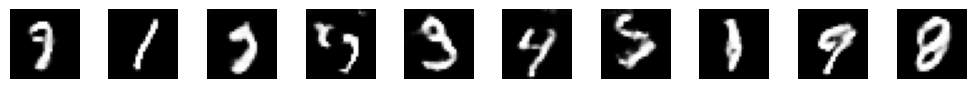

Epoch 5/5, Batch 180, Discriminator Loss: 0.8784329891204834, Generator Loss: 1.0220839977264404
Epoch 5/5, Batch 181, Discriminator Loss: 1.0511020421981812, Generator Loss: 2.9304490089416504
Epoch 5/5, Batch 182, Discriminator Loss: 0.7100192308425903, Generator Loss: 1.128121018409729
Epoch 5/5, Batch 183, Discriminator Loss: 0.8365800976753235, Generator Loss: 2.3712737560272217
Epoch 5/5, Batch 184, Discriminator Loss: 0.6597821712493896, Generator Loss: 1.308708667755127


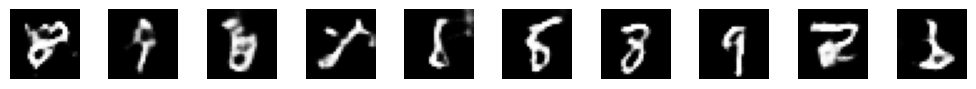

Epoch 5/5, Batch 185, Discriminator Loss: 0.8147969245910645, Generator Loss: 2.4712295532226562
Epoch 5/5, Batch 186, Discriminator Loss: 0.7844406962394714, Generator Loss: 1.0310730934143066
Epoch 5/5, Batch 187, Discriminator Loss: 0.7664097547531128, Generator Loss: 2.1783761978149414
Epoch 5/5, Batch 188, Discriminator Loss: 0.9840538501739502, Generator Loss: 0.7671828269958496
Epoch 5/5, Batch 189, Discriminator Loss: 0.8268259167671204, Generator Loss: 2.4328525066375732


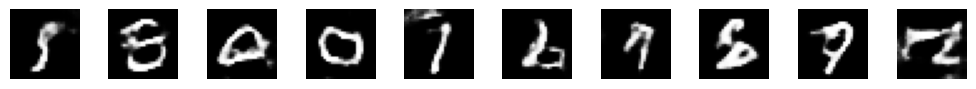

Epoch 5/5, Batch 190, Discriminator Loss: 0.8406689167022705, Generator Loss: 1.0234928131103516
Epoch 5/5, Batch 191, Discriminator Loss: 0.6941651701927185, Generator Loss: 1.9393428564071655
Epoch 5/5, Batch 192, Discriminator Loss: 0.8731797933578491, Generator Loss: 0.9407666921615601
Epoch 5/5, Batch 193, Discriminator Loss: 0.7920929789543152, Generator Loss: 1.9793963432312012
Epoch 5/5, Batch 194, Discriminator Loss: 0.8512558937072754, Generator Loss: 1.038356065750122


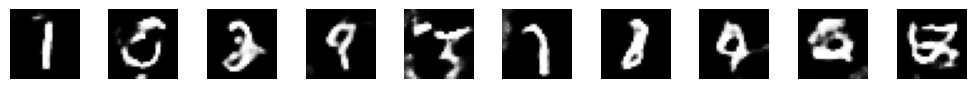

Epoch 5/5, Batch 195, Discriminator Loss: 0.7729122638702393, Generator Loss: 2.1847500801086426
Epoch 5/5, Batch 196, Discriminator Loss: 1.0030499696731567, Generator Loss: 0.7917582988739014
Epoch 5/5, Batch 197, Discriminator Loss: 0.8494921922683716, Generator Loss: 2.36149001121521
Epoch 5/5, Batch 198, Discriminator Loss: 0.7191935777664185, Generator Loss: 1.174086093902588
Epoch 5/5, Batch 199, Discriminator Loss: 0.8655850887298584, Generator Loss: 2.407362699508667


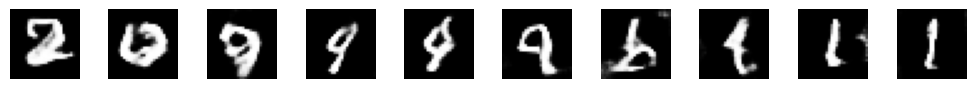

Epoch 5/5, Batch 200, Discriminator Loss: 0.6390211582183838, Generator Loss: 1.2734378576278687
Epoch 5/5, Batch 201, Discriminator Loss: 0.9231944680213928, Generator Loss: 2.552386522293091
Epoch 5/5, Batch 202, Discriminator Loss: 0.6983939409255981, Generator Loss: 1.2533679008483887
Epoch 5/5, Batch 203, Discriminator Loss: 0.92540442943573, Generator Loss: 2.688946008682251
Epoch 5/5, Batch 204, Discriminator Loss: 0.7579027414321899, Generator Loss: 2.4525465965270996


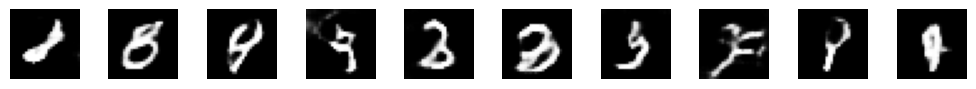

Epoch 5/5, Batch 205, Discriminator Loss: 0.950194239616394, Generator Loss: 0.7470411658287048
Epoch 5/5, Batch 206, Discriminator Loss: 0.9013278484344482, Generator Loss: 2.614922285079956
Epoch 5/5, Batch 207, Discriminator Loss: 0.8019766807556152, Generator Loss: 1.0308022499084473
Epoch 5/5, Batch 208, Discriminator Loss: 0.7652878165245056, Generator Loss: 2.246825933456421
Epoch 5/5, Batch 209, Discriminator Loss: 0.805878221988678, Generator Loss: 1.0102055072784424


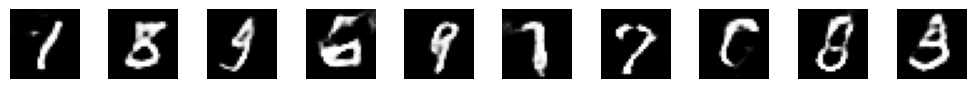

Epoch 5/5, Batch 210, Discriminator Loss: 0.8636893033981323, Generator Loss: 2.257829427719116
Epoch 5/5, Batch 211, Discriminator Loss: 0.776317834854126, Generator Loss: 1.068831205368042
Epoch 5/5, Batch 212, Discriminator Loss: 0.761724591255188, Generator Loss: 2.0159096717834473
Epoch 5/5, Batch 213, Discriminator Loss: 0.7038247585296631, Generator Loss: 1.1700477600097656
Epoch 5/5, Batch 214, Discriminator Loss: 0.9456676840782166, Generator Loss: 2.412397623062134


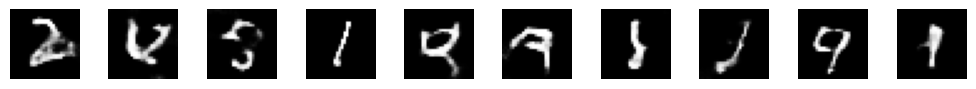

Epoch 5/5, Batch 215, Discriminator Loss: 0.6606290936470032, Generator Loss: 2.2479088306427
Epoch 5/5, Batch 216, Discriminator Loss: 0.6676987409591675, Generator Loss: 1.6731261014938354
Epoch 5/5, Batch 217, Discriminator Loss: 1.1103256940841675, Generator Loss: 0.673180103302002
Epoch 5/5, Batch 218, Discriminator Loss: 1.1169205904006958, Generator Loss: 2.515096426010132
Epoch 5/5, Batch 219, Discriminator Loss: 0.5298483371734619, Generator Loss: 2.4561476707458496


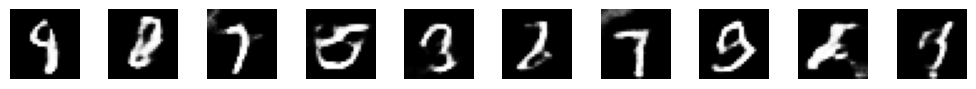

Epoch 5/5, Batch 220, Discriminator Loss: 0.6605756878852844, Generator Loss: 1.9180045127868652
Epoch 5/5, Batch 221, Discriminator Loss: 0.9991897344589233, Generator Loss: 0.7854103446006775
Epoch 5/5, Batch 222, Discriminator Loss: 1.0337028503417969, Generator Loss: 2.342853546142578
Epoch 5/5, Batch 223, Discriminator Loss: 0.7035034894943237, Generator Loss: 1.2431553602218628
Epoch 5/5, Batch 224, Discriminator Loss: 0.9823257327079773, Generator Loss: 2.3729257583618164


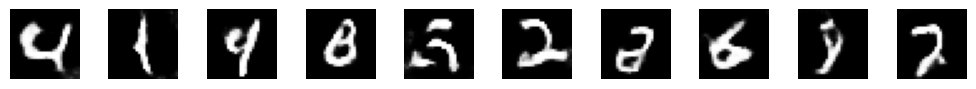

Epoch 5/5, Batch 225, Discriminator Loss: 0.7821957468986511, Generator Loss: 1.0797914266586304
Epoch 5/5, Batch 226, Discriminator Loss: 0.9117872714996338, Generator Loss: 2.3302011489868164
Epoch 5/5, Batch 227, Discriminator Loss: 0.7347716093063354, Generator Loss: 1.9014124870300293
Epoch 5/5, Batch 228, Discriminator Loss: 0.8780418634414673, Generator Loss: 0.9117639064788818
Epoch 5/5, Batch 229, Discriminator Loss: 0.972504198551178, Generator Loss: 2.6467278003692627


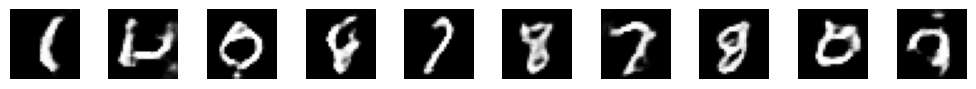

Epoch 5/5, Batch 230, Discriminator Loss: 0.7981094717979431, Generator Loss: 1.0459327697753906
Epoch 5/5, Batch 231, Discriminator Loss: 0.8454214334487915, Generator Loss: 1.9940624237060547
Epoch 5/5, Batch 232, Discriminator Loss: 0.8343535661697388, Generator Loss: 0.9615886211395264
Epoch 5/5, Batch 233, Discriminator Loss: 0.8760630488395691, Generator Loss: 2.2646713256835938
Epoch 5/5, Batch 234, Discriminator Loss: 0.7367667555809021, Generator Loss: 1.1198779344558716


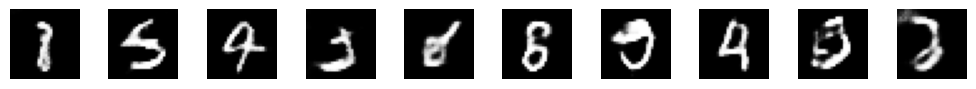

End of epoch 5, Discriminator Loss: 0.7367667555809021, Generator Loss: 1.1198779344558716


In [29]:
n_epochs = 5
coding_size = 100
d_iterations = 3

history = {'d_loss': [], 'g_loss': []}

def plot_generated_images(generator, epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = tf.random.normal([examples, coding_size])
    generated_images = generator(noise, training=False)
    generated_images = 0.5 * generated_images + 0.5  
    
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


for epoch in range(n_epochs):
    n_batches = 0
    for xbatch in dataset:
        for _ in range(d_iterations):
            with tf.GradientTape() as d_tape:
                noise = tf.random.normal([batch_size, coding_size])
                generated_images = generator(noise)
                real_predictions = discriminator(xbatch)
                generated_predictions = discriminator(generated_images)
                d_loss = discriminator_loss(real_predictions, generated_predictions)
            discriminator_gradients = d_tape.gradient(d_loss, discriminator.trainable_variables)
            d_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))


        with tf.GradientTape() as g_tape:
            noise = tf.random.normal([batch_size, coding_size])
            generated_images = generator(noise)
            real_predictions = discriminator(xbatch)
            generated_predictions = discriminator(generated_images)
            d_loss = discriminator_loss(real_predictions, generated_predictions)
            g_loss = generator_loss(generated_predictions)
        generator_gradients = g_tape.gradient(g_loss, generator.trainable_variables)
        g_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
           
      
        # Convert the losses to numpy for better readability
        d_loss_np = tf.reduce_mean(d_loss).numpy()
        g_loss_np = tf.reduce_mean(g_loss).numpy()
            
        print(f'Epoch {epoch + 1}/{n_epochs}, Batch {n_batches}, Discriminator Loss: {d_loss_np}, Generator Loss: {g_loss_np}')
        
        n_batches += 1

        if n_batches % 5 == 0:
            plot_generated_images(generator, epoch)
        
    print(f'End of epoch {epoch + 1}, Discriminator Loss: {d_loss_np}, Generator Loss: {g_loss_np}')



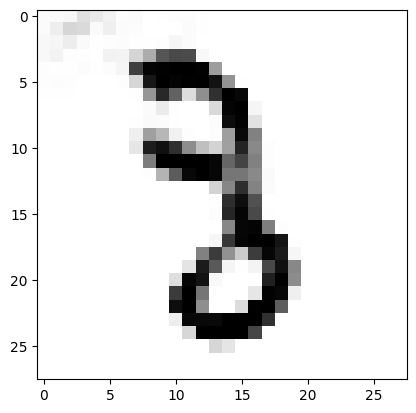

In [33]:
teste = generator(tf.random.normal([1, 100]))
teste = teste.numpy().reshape(28, 28)
plt.imshow(teste, cmap = 'binary')